# **Importing Libraries**

In [ ]:
!pip install scispacy

In [ ]:
pip install scikeras

In [ ]:
pip install quite shap

  Using cached quite-0.4.8.tar.gz (20 kB)
  Preparing metadata (setup.py) ... done
  Using cached st-0.0.8.zip (7.3 kB)
  Preparing metadata (setup.py) ... done
  Using cached prett-0.1.1.tar.gz (5.5 kB)
  Preparing metadata (setup.py) ... done
  Using cached PySide-1.2.4.tar.gz (9.3 MB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
pip install wordcloud

In [ ]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from sklearn.preprocessing import LabelEncoder
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import wordnet
from nltk import pos_tag, word_tokenize
from nltk.stem import WordNetLemmatizer
import string
from nltk.corpus import stopwords
from collections import Counter
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from scipy.sparse import hstack
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import tensorflow as tf
from sklearn.utils import class_weight
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from tensorflow.keras.optimizers import Adam
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.exceptions import NotFittedError
from itertools import cycle
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
import shap
import joblib
import cloudpickle as cp
from wordcloud import WordCloud
from sklearn.decomposition import NMF
import random
from sklearn.metrics import (precision_recall_fscore_support)
from scipy.sparse import issparse
from imblearn.over_sampling import SMOTE
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


# **Loading Data**

In [ ]:
#Load the data
data = pd.read_csv('drugs_side_effects_drugs_com.csv')
data.head()

drug_name medical_condition  \
0     doxycycline              Acne   
1  spironolactone              Acne   
2     minocycline              Acne   
3        Accutane              Acne   
4     clindamycin              Acne   

                                        side_effects         generic_name  \
0  (hives, difficult breathing, swelling in your ...          doxycycline   
1  hives ; difficulty breathing; swelling of your...       spironolactone   
2  skin rash, fever, swollen glands, flu-like sym...          minocycline   
3  problems with your vision or hearing; muscle o...  isotretinoin (oral)   
4  hives ; difficult breathing; swelling of your ...  clindamycin topical   

                                        drug_classes  \
0         Miscellaneous antimalarials, Tetracyclines   
1  Aldosterone receptor antagonists, Potassium-sp...   
2                                      Tetracyclines   
3  Miscellaneous antineoplastics, Miscellaneous u...   
4       Topical acne agents, Vaginal anti-infectives   

                                         brand_names activity rx_otc  \
0  Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...      87%     Rx   
1                                Aldactone, CaroSpir      82%     Rx   
2  Dynacin, Minocin, Minolira, Solodyn, Ximino, V...      48%     Rx   
3                                                NaN      41%     Rx   
4  Cleocin T, Clindacin ETZ, Clindacin P, Clindag...      39%     Rx   

  pregnancy_category csa alcohol  \
0                  D   N       X   
1                  C   N       X   
2                  D   N     NaN   
3                  X   N       X   
4                  B   N     NaN   

                                       related_drugs  \
0  amoxicillin: https://www.drugs.com/amoxicillin...   
1  amlodipine: https://www.drugs.com/amlodipine.h...   
2  amoxicillin: https://www.drugs.com/amoxicillin...   
3  doxycycline: https://www.drugs.com/doxycycline...   
4  doxycycline: https://www.drugs.com/doxycycline...   

                       medical_condition_description  rating  no_of_reviews  \
0  Acne Other names: Acne Vulgaris; Blackheads; B...     6.8          760.0   
1  Acne Other names: Acne Vulgaris; Blackheads; B...     7.2          449.0   
2  Acne Other names: Acne Vulgaris; Blackheads; B...     5.7          482.0   
3  Acne Other names: Acne Vulgaris; Blackheads; B...     7.9          623.0   
4  Acne Other names: Acne Vulgaris; Blackheads; B...     7.4          146.0   

                                           drug_link  \
0             https://www.drugs.com/doxycycline.html   
1          https://www.drugs.com/spironolactone.html   
2             https://www.drugs.com/minocycline.html   
3                https://www.drugs.com/accutane.html   
4  https://www.drugs.com/mtm/clindamycin-topical....   

                       medical_condition_url  
0  https://www.drugs.com/condition/acne.html  
1  https://www.drugs.com/condition/acne.html  
2  https://www.drugs.com/condition/acne.html  
3  https://www.drugs.com/condition/acne.html  
4  https://www.drugs.com/condition/acne.html

# **Data Cleaning**

In [ ]:
#Check the dimensions of the data
data.shape

(2931, 17)

In [ ]:
#Identify the null values
data.isna().sum()

drug_name                           0
medical_condition                   0
side_effects                      124
generic_name                       43
drug_classes                       82
brand_names                      1213
activity                            0
rx_otc                              1
pregnancy_category                229
csa                                 0
alcohol                          1554
related_drugs                    1469
medical_condition_description       0
rating                           1345
no_of_reviews                    1345
drug_link                           0
medical_condition_url               0
dtype: int64

In [ ]:
#Column names before cleaning
data.columns

Index(['drug_name', 'medical_condition', 'side_effects', 'generic_name',
       'drug_classes', 'brand_names', 'activity', 'rx_otc',
       'pregnancy_category', 'csa', 'alcohol', 'related_drugs',
       'medical_condition_description', 'rating', 'no_of_reviews', 'drug_link',
       'medical_condition_url'],
      dtype='object')

In [ ]:
#Summary of the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   drug_name                      2931 non-null   object 
 1   medical_condition              2931 non-null   object 
 2   side_effects                   2807 non-null   object 
 3   generic_name                   2888 non-null   object 
 4   drug_classes                   2849 non-null   object 
 5   brand_names                    1718 non-null   object 
 6   activity                       2931 non-null   object 
 7   rx_otc                         2930 non-null   object 
 8   pregnancy_category             2702 non-null   object 
 9   csa                            2931 non-null   object 
 10  alcohol                        1377 non-null   object 
 11  related_drugs                  1462 non-null   object 
 12  medical_condition_description  2931 non-null   o

In [ ]:
#descriptive statistics
data.describe(include = "all")

drug_name medical_condition  \
count            2931              2931   
unique           2912                47   
top     triamcinolone              Pain   
freq                3               264   
mean              NaN               NaN   
std               NaN               NaN   
min               NaN               NaN   
25%               NaN               NaN   
50%               NaN               NaN   
75%               NaN               NaN   
max               NaN               NaN   

                                             side_effects     generic_name  \
count                                                2807             2888   
unique                                               2759             1392   
top     hives ; difficult breathing; swelling of your ...  diphenhydramine   
freq                                                   10               17   
mean                                                  NaN              NaN   
std                                                   NaN              NaN   
min                                                   NaN              NaN   
25%                                                   NaN              NaN   
50%                                                   NaN              NaN   
75%                                                   NaN              NaN   
max                                                   NaN              NaN   

                          drug_classes  \
count                             2849   
unique                             274   
top     Upper respiratory combinations   
freq                               245   
mean                               NaN   
std                                NaN   
min                                NaN   
25%                                NaN   
50%                                NaN   
75%                                NaN   
max                                NaN   

                                              brand_names activity rx_otc  \
count                                                1718     2931   2930   
unique                                               1552       93      3   
top     Acne-Clear, Benzac AC, BenzePrO, Benziq, Brevo...       0%     Rx   
freq                                                   10      895   1998   
mean                                                  NaN      NaN    NaN   
std                                                   NaN      NaN    NaN   
min                                                   NaN      NaN    NaN   
25%                                                   NaN      NaN    NaN   
50%                                                   NaN      NaN    NaN   
75%                                                   NaN      NaN    NaN   
max                                                   NaN      NaN    NaN   

       pregnancy_category   csa alcohol  \
count                2702  2931    1377   
unique                  6     7       1   
top                     C     N       X   
freq                 1382  2688    1377   
mean                  NaN   NaN     NaN   
std                   NaN   NaN     NaN   
min                   NaN   NaN     NaN   
25%                   NaN   NaN     NaN   
50%                   NaN   NaN     NaN   
75%                   NaN   NaN     NaN   
max                   NaN   NaN     NaN   

                                            related_drugs  \
count                                                1462   
unique                                                535   
top     doxycycline: https://www.drugs.com/doxycycline...   
freq                                                   41   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
7

In [ ]:
#Fill NaN with 'No' and convert 'X' to 'Yes'
data['alcohol_interaction'] = data['alcohol'].fillna('No')
data['alcohol_interaction'] = data['alcohol_interaction'].apply(lambda x: 'Yes' if x == 'X' else 'No')

In [ ]:
data = data.dropna(subset=['pregnancy_category'])#Dropping the rows with missing target value
data = data.dropna(subset=['side_effects'])#Dropping the missing values of side effects

In [ ]:
#removing the '%' symbol,then convert the resulting values to integers
data['activity'] = data['activity'].str.replace('%', '').astype(int)

In [ ]:
#Function to fill missing values
def fill_missing_values(df, columns, fill_value="Unknown"):
    for col in columns:
        df[col] = df[col].fillna(fill_value)
    return df

In [ ]:
#Filling the missing values with 'unknown'
columns_to_fill = ['brand_names', 'generic_name', 'drug_classes']
data = fill_missing_values(data, columns_to_fill, fill_value="Unknown")

In [ ]:
data['rating'] = data['rating'].fillna(-1) #Fill missing values in rating with -1 to indicate missing value
data['no_of_reviews'] = data['no_of_reviews'].fillna(0) #Fill missing values in no_of_reviews with 0 assuming no reviews were given

In [ ]:
#Changing the datatype
data['no_of_reviews'] = data['no_of_reviews'].astype(int)

In [ ]:
#Convert the words to title format
title_columns = ['generic_name', 'medical_condition']
# Apply title case to each of the specified columns
for col in title_columns:
    data[col] = data[col].str.title()

In [ ]:
#Capitalize the first letter of drug_name only if it starts with a lowercase letter
def capitalize_first_letter(name):
    if isinstance(name, str) and name and name[0].islower():
        return name[0].upper() + name[1:]
    return name

In [ ]:
data['drug_name'] = data['drug_name'].apply(capitalize_first_letter)

In [ ]:
#Droppig the unnecessary columns
data = data.drop(columns=['medical_condition_description', 'drug_link', 'medical_condition_url', 'alcohol', 'related_drugs'])

In [ ]:
#Correct inconsistent capitalization and formatting in the medical_condition column
corrections = {"Copd": "COPD", "Ibd (Bowel)": "IBD (Bowel)", "Covid 19": "COVID 19", "Adhd": "ADHD", "Aids/Hiv": "AIDS/HIV",
               "Gerd (Heartburn)": "GERD (Heartburn)", "Uti": "UTI", "Alzheimer'S": "Alzheimer's"}
data['medical_condition'] = data['medical_condition'].replace(corrections)

In [ ]:
#Standardizing Column names
data.columns = [col.replace('_', ' ').title().replace(' ', '_') for col in data.columns]

In [ ]:
data.describe(include = "all")

Drug_Name Medical_Condition  \
count            2591              2591   
unique           2572                47   
top     Triamcinolone       Colds & Flu   
freq                3               233   
mean              NaN               NaN   
std               NaN               NaN   
min               NaN               NaN   
25%               NaN               NaN   
50%               NaN               NaN   
75%               NaN               NaN   
max               NaN               NaN   

                                             Side_Effects Generic_Name  \
count                                                2591         2591   
unique                                               2543         1190   
top     hives ; difficult breathing; swelling of your ...      Unknown   
freq                                                   10           22   
mean                                                  NaN          NaN   
std                                                   NaN          NaN   
min                                                   NaN          NaN   
25%                                                   NaN          NaN   
50%                                                   NaN          NaN   
75%                                                   NaN          NaN   
max                                                   NaN          NaN   

                          Drug_Classes Brand_Names     Activity Rx_Otc  \
count                             2591        2591  2591.000000   2591   
unique                             264        1457          NaN      3   
top     Upper respiratory combinations     Unknown          NaN     Rx   
freq                               235         969          NaN   1720   
mean                               NaN         NaN     8.624469    NaN   
std                                NaN         NaN    17.380298    NaN   
min                                NaN         NaN     0.000000    NaN   
25%                                NaN         NaN     0.000000    NaN   
50%                                NaN         NaN     2.000000    NaN   
75%                                NaN         NaN     7.000000    NaN   
max                                NaN         NaN   100.000000    NaN   

       Pregnancy_Category   Csa       Rating  No_Of_Reviews  \
count                2591  2591  2591.000000    2591.000000   
unique                  6     6          NaN            NaN   
top                     C     N          NaN            NaN   
freq                 1318  2384          NaN            NaN   
mean                  NaN   NaN     3.352258      43.026631   
std                   NaN   NaN     4.260288     147.485916   
min                   NaN   NaN    -1.000000       0.000000   
25%                   NaN   NaN    -1.000000       0.000000   
50%                   NaN   NaN     4.000000       1.000000   
75%                   NaN   NaN     7.400000      17.000000   
max                   NaN   NaN    10.000000    2934.000000   

       Alcohol_Interaction  
count                 2591  
unique                   2  
top                     No  
freq                  1325  
mean                   NaN  
std                    NaN  
min                    NaN  
25%                    NaN  
50%                    NaN  
75%                    NaN  
max                    NaN

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2591 entries, 0 to 2927
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Drug_Name            2591 non-null   object 
 1   Medical_Condition    2591 non-null   object 
 2   Side_Effects         2591 non-null   object 
 3   Generic_Name         2591 non-null   object 
 4   Drug_Classes         2591 non-null   object 
 5   Brand_Names          2591 non-null   object 
 6   Activity             2591 non-null   int64  
 7   Rx_Otc               2591 non-null   object 
 8   Pregnancy_Category   2591 non-null   object 
 9   Csa                  2591 non-null   object 
 10  Rating               2591 non-null   float64
 11  No_Of_Reviews        2591 non-null   int64  
 12  Alcohol_Interaction  2591 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 283.4+ KB


In [ ]:
#Confirming there are no missing/na values
data.isna().sum()

Drug_Name              0
Medical_Condition      0
Side_Effects           0
Generic_Name           0
Drug_Classes           0
Brand_Names            0
Activity               0
Rx_Otc                 0
Pregnancy_Category     0
Csa                    0
Rating                 0
No_Of_Reviews          0
Alcohol_Interaction    0
dtype: int64

# **Exploratory Data Analysis**

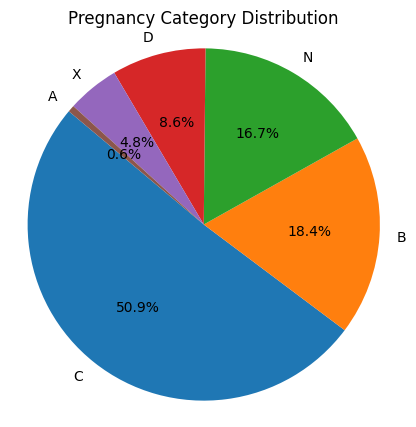

In [ ]:
#Count the values in the pregnancy_category column
category_counts = data['Pregnancy_Category'].value_counts()
#Plot pie chart
plt.figure(figsize=(5, 5))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pregnancy Category Distribution')
plt.axis('equal')
plt.show()

**Interpretation:** From the Pie chart, it is clear that the majority of drugs in the data fall under Category C (approximately 51%), which means animal studies have shown adverse effects on the fetus, but there are no adequate human studies. This suggests a significant portion of medications present potential risks during pregnancy but may still be prescribed when the benefits outweigh the risks.

Categories B and N follow next with around 18% and 17% respectively. Category B indicates no evidence of risk in humans, while Category N typically refers to drugs not yet classified by the FDA. Categories D and X (about 9% and 5%) indicate increasing levels of risk, with Category X drugs being contraindicated in pregnancy. Category A, the safest category, is underrepresented (less than 1%), which is expected as very few drugs are deemed completely risk-free in pregnancy.

/tmp/ipython-input-49492998.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=csa_counts.index, y=csa_counts.values, palette='viridis')


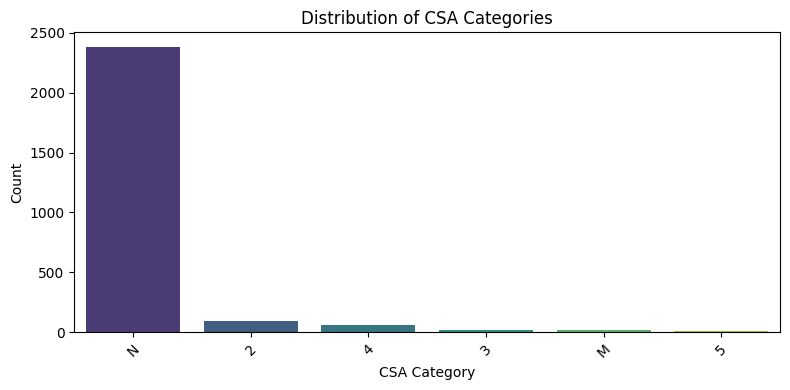

In [ ]:
#Distribution of csa categories column
csa_counts = data['Csa'].value_counts()
plt.figure(figsize=(8, 4))
sns.barplot(x=csa_counts.index, y=csa_counts.values, palette='viridis')
plt.title('Distribution of CSA Categories')
plt.xlabel('CSA Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Interpretation:** This barplot highlights a strong dominance of drugs classified under CSA Category ‘N’, which means they are not controlled substances under the Controlled Substances Act. Over 90% of the drugs in the data fall into this category. This is expected, as most medications are not considered to have abuse potential. The remaining categories (2, 3, 4, 5, and M) represent controlled substances with varying levels of restriction, where:

*  Category 2 includes drugs with a high potential for abuse (e.g: opioids),
*  Category 3-5 represent decreasing abuse potential,
*  Category M likely denotes medically prescribed marijuana or similar agents.

These controlled categories are significantly underrepresented, with each comprising only a small fraction of the data.

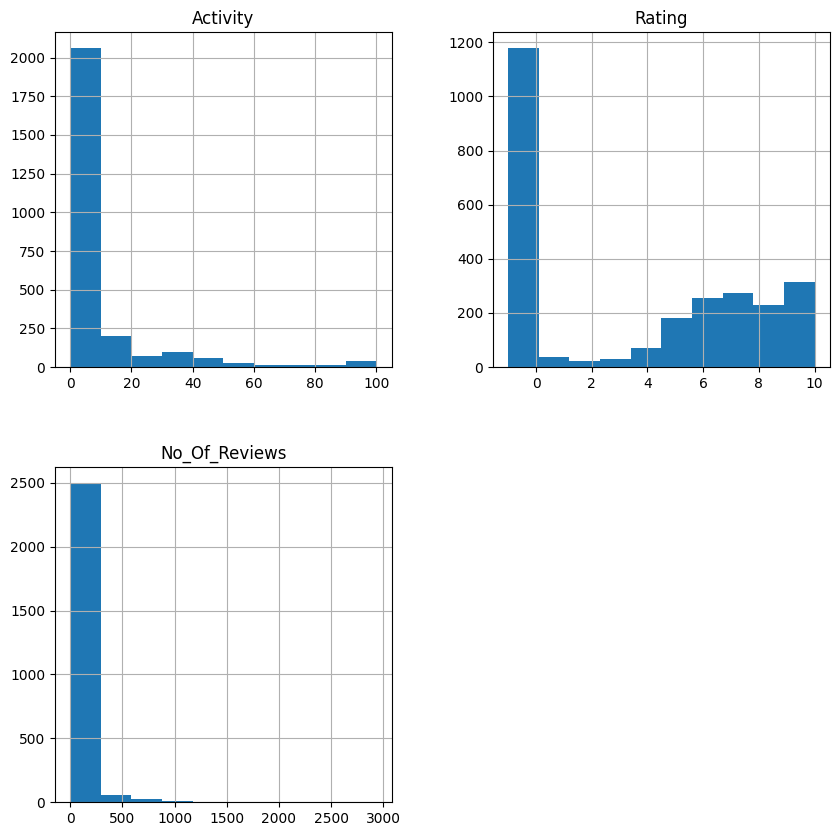

In [ ]:
#Histogram plots of numeric columns
data.hist(figsize=(10, 10))
plt.show()

**Interpretation:** The histograms illustrate the distributions of three key continuous variables in the data: drug activity, user rating, and number of reviews.
* The Activity histogram is heavily right-skewed, showing that the majority of drugs have very low activity levels, with only a small number reaching high usage rates.
* Similarly, the No_Of_Reviews histogram reveals a sharp skew toward fewer reviews, with most drugs having under 200 reviews and only a handful exceeding 1,000. This indicates that drug visibility and user engagement are concentrated in a small subset of the dataset.
* In contrast, the Rating histogram follows a bimodal pattern: a large spike at zero likely reflects missing or placeholder values, while the remaining data shows a gradual increase toward the higher end of the scale, peaking near 10.

These distributions highlight the need for data transformation or normalization before feeding into machine learning models and also suggest that review-based or activity-based metrics may introduce bias if not properly accounted for. Understanding these imbalances is crucial for developing a fair and accurate pregnancy drug safety classifier.

/tmp/ipython-input-3270746012.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=medical_counts.index, y=medical_counts.values, palette='viridis')


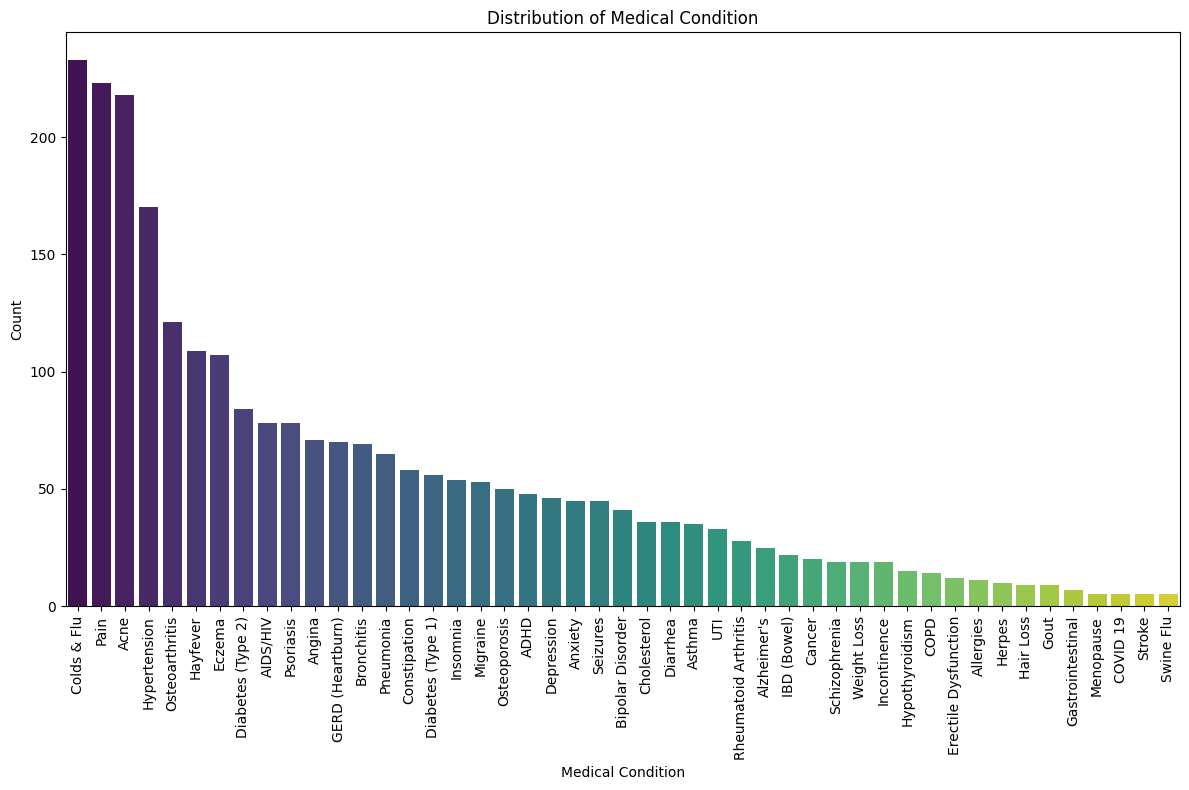

In [ ]:
#Distribution of medical condition column through a barplot
medical_counts = data['Medical_Condition'].value_counts()
plt.figure(figsize=(12, 8))
sns.barplot(x=medical_counts.index, y=medical_counts.values, palette='viridis')
plt.title('Distribution of Medical Condition')
plt.xlabel('Medical Condition')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Interpretation:** The bar chart illustrates the frequency of different medical conditions associated with the drugs in the data. The top three conditions Colds & Flu, Pain, and Acne are the most common, followed by chronic conditions like Hypertension, Osteoarthritis, and Diabetes (Type 2). These account for a large portion of the medications and reflect a typical pattern in community prescribing.

On the other end of the plot, rare or specific conditions like Stroke, Swine Flu, and Menopause appear much less frequently. This suggests that while the data is broad in scope, it’s heavily skewed toward commonly occurring conditions, which could affect how well the model generalizes to less common cases.

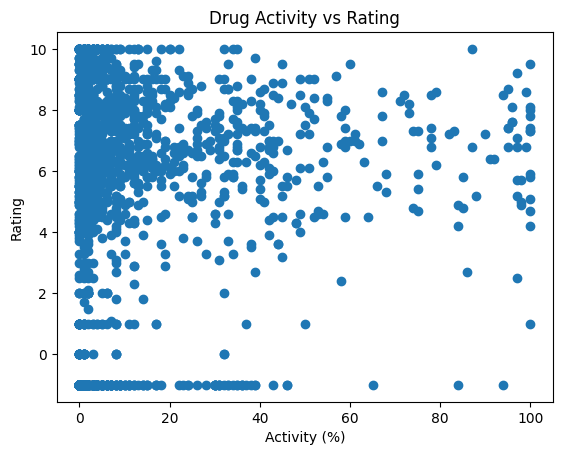

In [ ]:
#Scatterplot between Drug activity vs Rating
plt.scatter(data['Activity'], data['Rating'])
plt.title('Drug Activity vs Rating')
plt.xlabel('Activity (%)')
plt.ylabel('Rating')
plt.show()

**Interpretation:** The scatter plot of Drug Activity versus Rating reveals key insights into prescribing trends and user-perceived effectiveness across various drugs. A significant concentration of drugs lies within the low activity range (0-20%), yet many of these receive high user ratings (above 7), suggesting that several less frequently prescribed drugs may still be considered effective by patients. Conversely, drugs with high activity percentages (above 50%) exhibit a broad range of ratings, indicating that frequent use does not necessarily imply higher patient satisfaction. Moreover, low-rated drugs (rating < 3) are dispersed across all levels of activity, highlighting that usage frequency is not a reliable indicator of perceived safety or efficacy.

These findings reinforce the need for a machine learning approach that classifies pregnancy risk using a broader set of structured features, including pregnancy category, side effects, and drug class, rather than relying solely on conventional indicators like drug popularity or user ratings. This supports the study’s objective of developing a robust predictive model to improve medication safety during pregnancy.

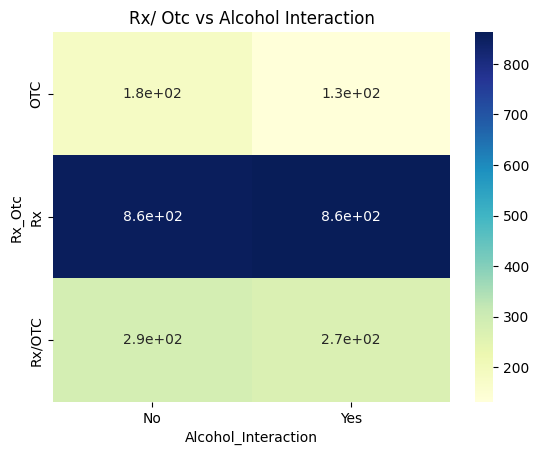

In [ ]:
#Heatmap of counts between Rx/OTC vs Alcohol interaction
contingency = pd.crosstab(data['Rx_Otc'], data['Alcohol_Interaction'])
sns.heatmap(contingency, annot=True, cmap='YlGnBu')
plt.title('Rx/ Otc vs Alcohol Interaction')
plt.show()

**Interpretation:**
The heatmap visualizes the interaction between a drug’s prescription type (Rx, OTC, or both) and its known interaction with alcohol. Prescription-only (Rx) drugs dominate the dataset, with nearly equal counts for both alcohol-interacting and non-interacting drugs, indicating that alcohol interaction is a common consideration across prescription medications. OTC drugs, by contrast, are fewer in number, and show a slightly higher proportion of non-alcohol-interacting entries. Drugs that are classified as both Rx and OTC fall in between but lean slightly toward having no alcohol interaction.

This pattern suggests that alcohol warnings are more prevalent in prescription medications, likely due to the higher risk or potency of these drugs. For pregnancy safety modeling, this feature may help flag medications with potential contraindications or interaction risks, especially when alcohol is a known behavioral factor during pregnancy. It also highlights the potential clinical value of including alcohol interaction data as a feature in supervised classification models.

/tmp/ipython-input-1818370040.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Medical_Condition', y='Activity', palette='Set1')


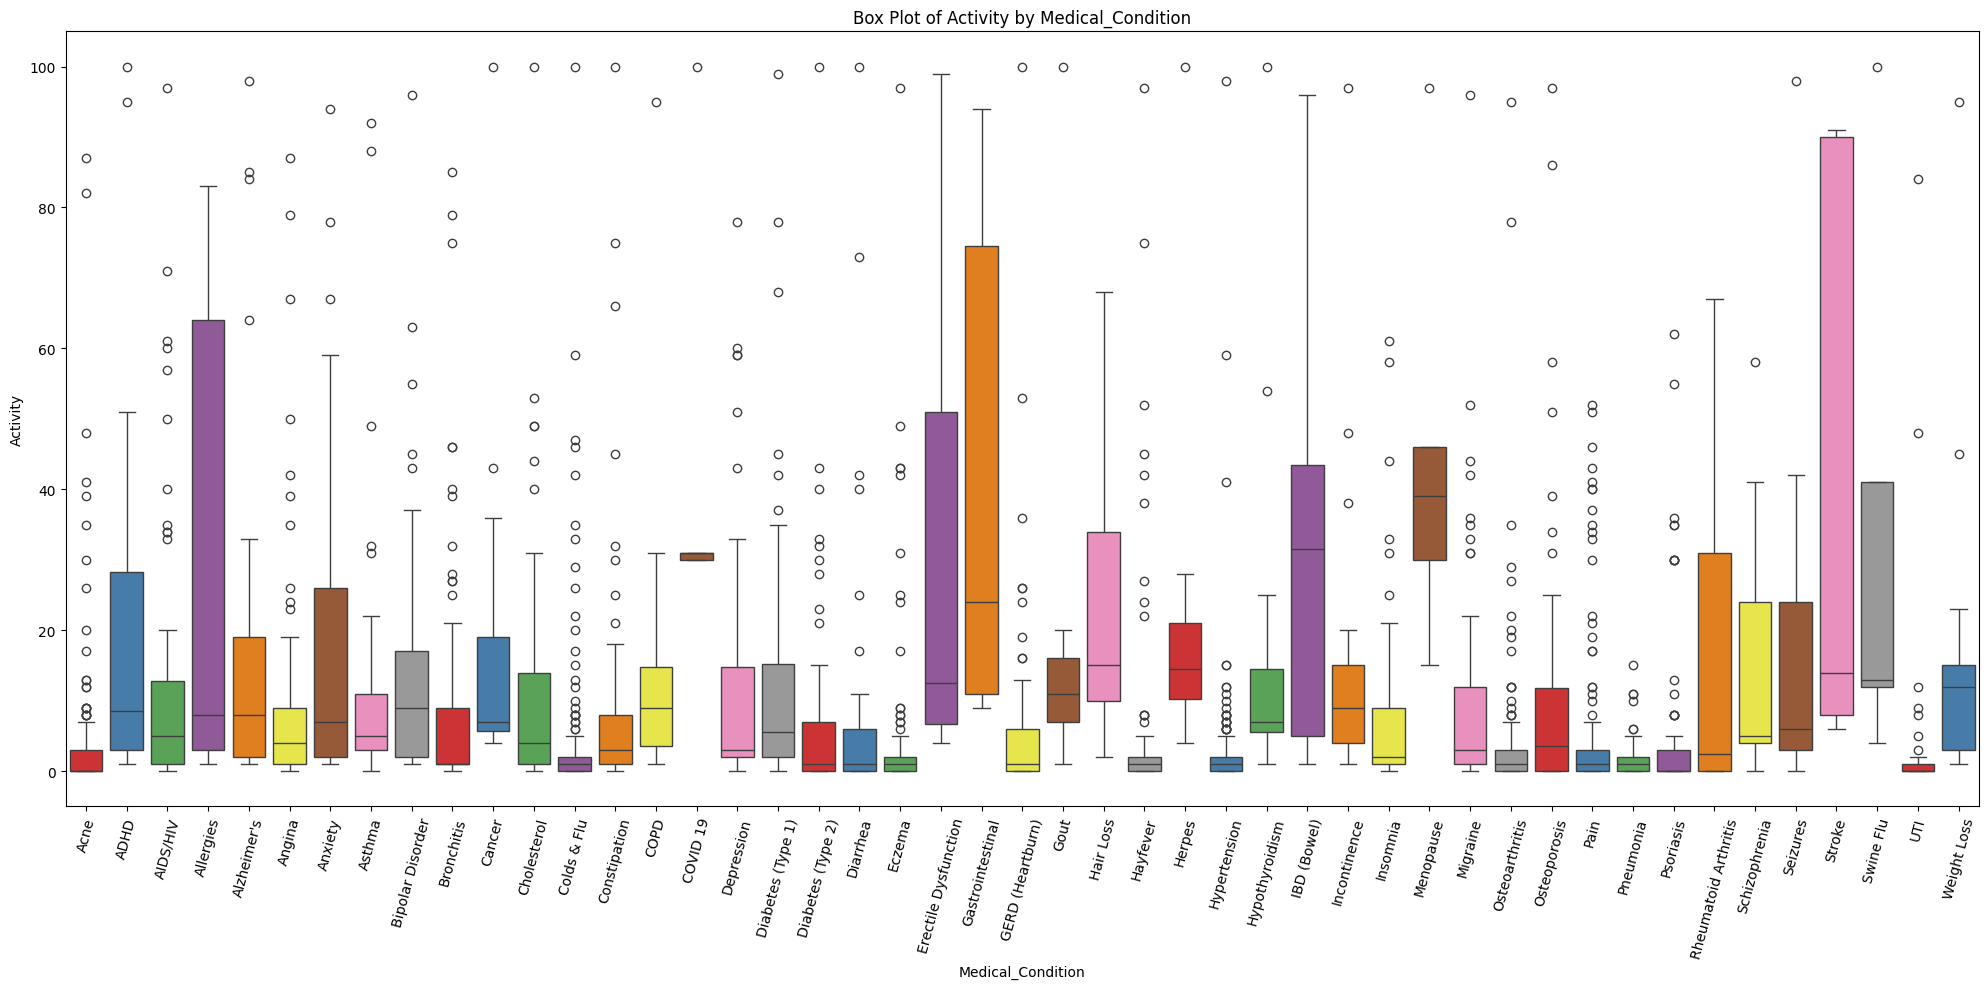

In [ ]:
#Box plot of drug activity by medical condition
plt.figure(figsize=(20, 10))
sns.boxplot(data=data, x='Medical_Condition', y='Activity', palette='Set1')
plt.title('Box Plot of Activity by Medical_Condition')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

**Interpretation:**
The box plot displays the distribution of drug activity levels across a wide range of medical conditions. Certain conditions such as IBD(bowel), Gastrointestinal issues, and Stroke exhibit higher median activity levels and wider variability, indicating that the drugs used for these conditions are both frequently prescribed and have diverse usage rates. Conversely, conditions like Osteoporosis, Bronchitis, and GERD (Heartburn) show low median activity and relatively tight distributions, suggesting more limited or consistent prescribing patterns. A few conditions such as Acne, Menopause, and Insomnia also demonstrate notable activity spread, indicating variability in how often related drugs are used.

This variation in activity by condition is important context for pregnancy safety modeling, as drugs used for high-activity conditions may carry greater risk due to widespread exposure. Incorporating condition-specific activity into the ML model may help improve predictions of pregnancy risk and guide safer prescribing decisions.

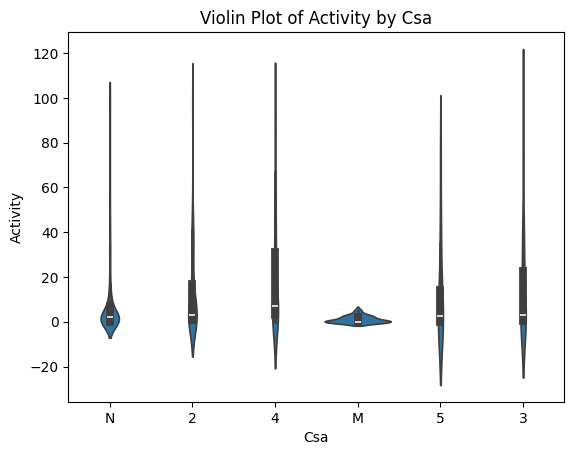

In [ ]:
#Violin plot of activity by csa category
sns.violinplot(data, x='Csa', y='Activity')
plt.title('Violin Plot of Activity by Csa')
plt.show()

**Interpretation:**
The violin plot visualizes the distribution of drug activity levels across different Controlled Substances Act (CSA) schedules, including non-controlled substances (N), Schedule 2-5 drugs, and miscellaneous categories (M). Non-controlled drugs (N) form the widest group, showing a large spread of activity levels with a dense concentration near zero, suggesting that most commonly used medications in the dataset are not federally scheduled substances. Schedules 2 and 4 display similar wide distributions, indicating that even tightly regulated drugs can have significant activity, possibly due to their critical therapeutic use in conditions like ADHD or anxiety. Schedule 5 and 3 drugs show moderate activity dispersion, while the 'M' category exhibits a narrow and low activity distribution, implying limited or niche usage.

The overall distribution pattern emphasizes that while many active drugs fall outside CSA scheduling, several high-activity medications still fall under controlled categories. This has important implications for pregnancy safety modeling, as CSA classification can act as a potential feature indicating abuse potential or regulatory risk, both of which are relevant to maternal-fetal health considerations.

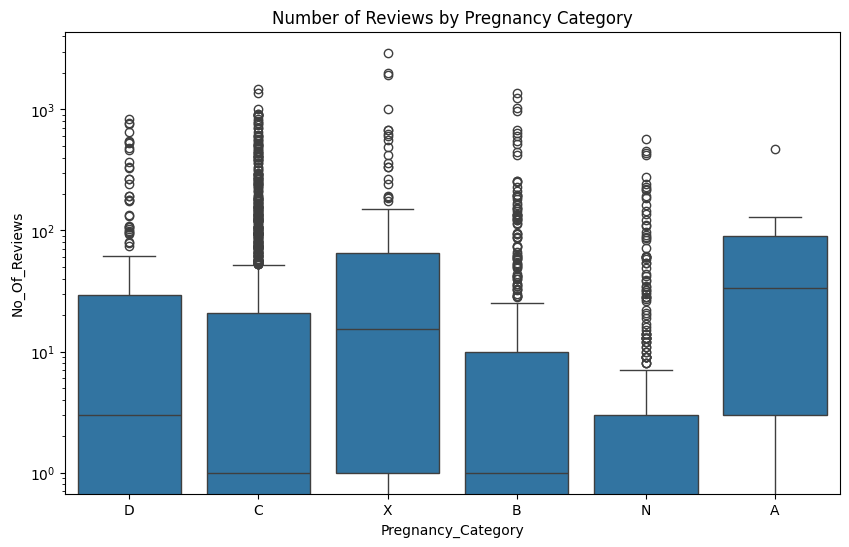

In [ ]:
#Boxplot of reviews by pregnancy category
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pregnancy_Category', y='No_Of_Reviews', data= data)
plt.title('Number of Reviews by Pregnancy Category')
plt.yscale('log')
plt.show()

**Interpretation:** The box plot compares the distribution of user reviews across different pregnancy categories. The plot is displayed on a logarithmic scale due to the highly skewed distribution of review counts. Category 0 and Category 5, which may represent unknown or unclassified risk levels, exhibit higher median and upper-range review counts, suggesting these drugs are frequently discussed despite uncertain safety profiles. Categories 1 to 4, which likely correspond to FDA pregnancy risk categories (B, C, D, N), have lower median review counts and tighter interquartile ranges, with a large number of outliers in each group. This indicates that while many drugs within these categories are infrequently reviewed, a few receive disproportionate attention. The presence of high-variance and sparse reviews in several categories may reflect both uneven public awareness and the limited clinical data typically available for pregnancy-related drug safety.

These insights reinforce the importance of not overly relying on review counts as a standalone signal in predictive modeling. Instead, they should be used cautiously as a supplementary feature alongside clinical variables like side effects, drug class, and pregnancy risk level.

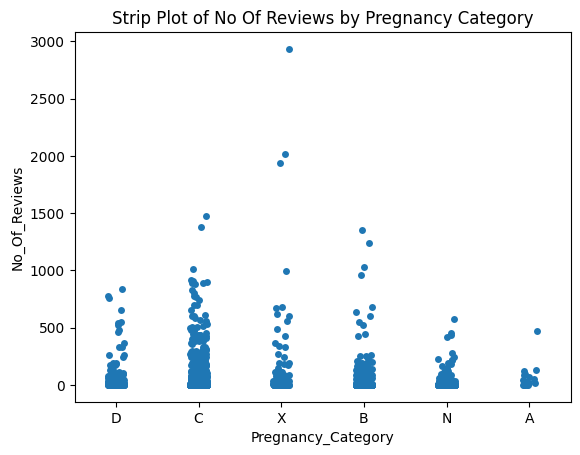

In [ ]:
#Strip plot of no.of reviews by pregnancy category
sns.stripplot(data, x='Pregnancy_Category', y='No_Of_Reviews', jitter=True)
plt.title('Strip Plot of No Of Reviews by Pregnancy Category')
plt.show()

**Interpretation:** The strip plot presents the distribution of drug review counts across different pregnancy categories, offering a granular look at individual data points. Pregnancy Category C, which generally represents drugs where risk cannot be ruled out, shows the widest and densest spread of reviews, including several drugs with over 1,000 reviews and a few like Category X exceeding 2,500. Categories D and X, typically associated with more significant risk, also display some highly reviewed drugs but with a narrower spread. Category B shows a moderately concentrated band, while Categories A and N (likely representing the safest or unclassified drugs) cluster in the lower range with fewer highly reviewed entries.

This visualization reinforces the notion that higher-risk drugs often receive more user feedback, possibly due to increased concern or more frequent usage. For our pregnancy safety classification model, this variability in review count may serve as a supporting indicator of clinical relevance, though care must be taken to avoid over-relying on popularity as a proxy for safety.

In [ ]:
# Combine all text into a single string and split into individual terms
all_side_effects = " ".join(data['Side_Effects'])
side_effect_list = all_side_effects.split()
side_effect_freq = Counter(side_effect_list)
most_common_effects = side_effect_freq.most_common(1000)
freq_df = pd.DataFrame(most_common_effects, columns=['Side Effect', 'Frequency'])
freq_df

Side Effect  Frequency
0               or      31699
1               of      14570
2             your      10936
3              the       8064
4             side       7860
..             ...        ...
995      movement.         45
996      blisters,         45
997        Allergy         45
998           drug         44
999  concentrating         44

[1000 rows x 2 columns]

In [ ]:
#Creating a dataframe for visualization purpose
keywords = ['hives', 'difficulty breathing', 'difficult breathing', 'weakness', 'drowsiness', 'bleeding', 'confusion', 'tiredness',
            'swelling', 'rash', 'dizziness', 'nausea', 'diarrhea', 'itching', 'headache', 'urination', 'constipation']
filtered_data = data[['Side_Effects', 'Pregnancy_Category']]
filtered_data['Side_Effects'] = filtered_data['Side_Effects'].str.lower()
results = []
for keyword in keywords:
    for category in filtered_data['Pregnancy_Category'].unique():
        count = filtered_data[
            (filtered_data['Pregnancy_Category'] == category) &
            (filtered_data['Side_Effects'].str.contains(keyword))
        ].shape[0]
        results.append({'Side_Effect': keyword, 'Pregnancy_Category': category, 'Count': count})
viz_df = pd.DataFrame(results)

/tmp/ipython-input-1401057813.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Side_Effects'] = filtered_data['Side_Effects'].str.lower()


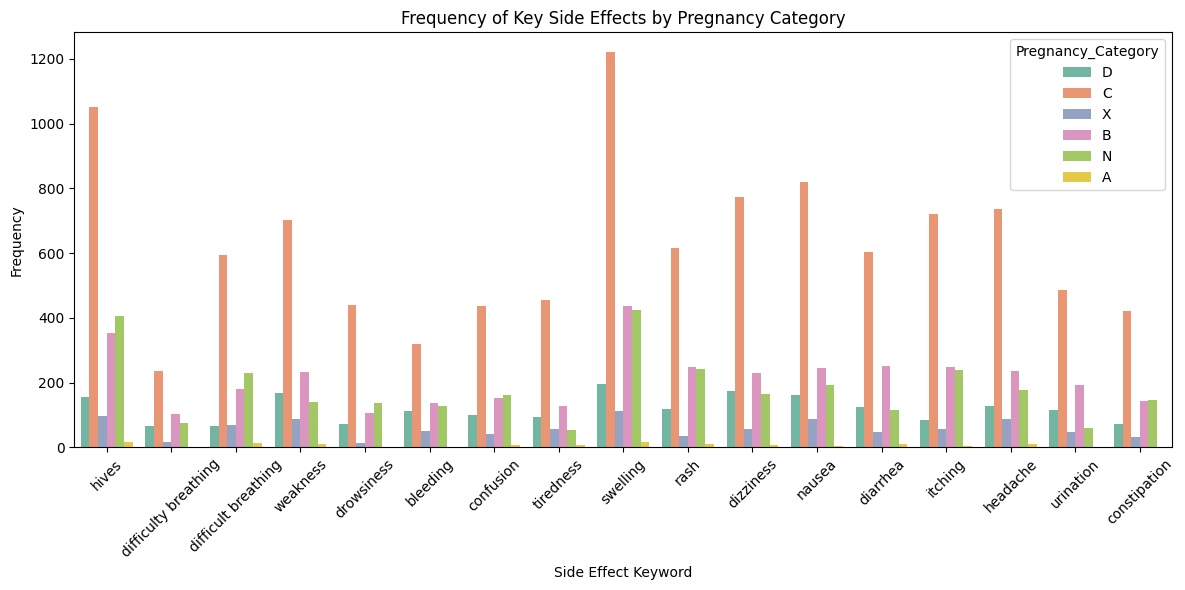

In [ ]:
#Barplot of key side effects by pregnancy category
plt.figure(figsize=(12, 6))
sns.barplot(data=viz_df, x='Side_Effect', y='Count', hue='Pregnancy_Category', palette='Set2')
plt.title('Frequency of Key Side Effects by Pregnancy Category')
plt.ylabel('Frequency')
plt.xlabel('Side Effect Keyword')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Interpretation:** The bar chart displays the frequency of selected side effect keywords across different pregnancy categories, with Category C (possibly indicating moderate risk) dominating nearly every side effect type. Side effects such as swelling, hives, nausea, dizziness, and diarrhea are especially frequent in Category C drugs, suggesting that many medications in this group may carry common but potentially concerning adverse reactions during pregnancy. Category X drugs, which often indicate contraindication in pregnancy, appear less frequently across all side effects, likely reflecting clinical restrictions and lower usage in pregnant populations. Categories B and D show moderate presence across several symptoms, with rash, weakness, and headache being notable across these categories. Category A (considered safest) consistently exhibits minimal side effect mentions, reinforcing its classification.

These patterns are valuable in guiding pregnancy-specific risk classification models; the high volume of certain side effects in moderate to high-risk categories may serve as predictive features in machine learning algorithms for identifying drugs that require greater caution when prescribed during pregnancy.

# **Statistical Analysis**

Chi-Square test between the pregnancy category and other categorical variables. It's null and alternate hypothesis are as follows:
1. CSA (Controlled Substance Act Classification)

    H₀: Pregnancy category is independent of the CSA schedule of the drug.

    H₁: Pregnancy category is associated with the CSA schedule of the drug.

2. Rx_Otc (Prescription or Over-the-Counter)

    H₀: Pregnancy category is independent of whether the drug is prescription-only or over-the-counter.

    H₁: Pregnancy category is associated with whether the drug is prescription-only or over-the-counter.

3. Alcohol_Interaction

    H₀: Pregnancy category is independent of the presence of alcohol interaction warnings.

    H₁: Pregnancy category is associated with the presence of alcohol interaction warnings.

4. Drug_Classes

    H₀: Pregnancy category is independent of the drug class to which a medication belongs.

    H₁: Pregnancy category is associated with the drug class.

5. Medical_Condition

    H₀: Pregnancy category is independent of the medical condition for which the drug is used.

    H₁: Pregnancy category is associated with the medical condition for which the drug is used.

In [ ]:
#Define a function to perform chi-square test between the outcome and categorical variables
def chi_square_test(cat_col, target_col='Pregnancy_Category'):
    contingency_table = pd.crosstab(data[cat_col], data[target_col])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"\nChi-Square Test between '{cat_col}' and '{target_col}':")
    print(f"Chi2 Statistic = {chi2:.2f}, Degrees of Freedom = {dof}, p-value = {p:.4f}")
    if p < 0.05:
        print("There is a statistically significant association between the variables (p < 0.05).")
    else:
        print("There is no statistically significant association between the variables (p < 0.05).")
#List of categorical variables to test
categorical_vars = ['Csa', 'Rx_Otc', 'Alcohol_Interaction', 'Drug_Classes', 'Medical_Condition']
#Run chi-square test for each categorical variable
for cat in categorical_vars:
    if cat in data.columns:
        chi_square_test(cat)


Chi-Square Test between 'Csa' and 'Pregnancy_Category':
Chi2 Statistic = 157.47, Degrees of Freedom = 25, p-value = 0.0000
There is a statistically significant association between the variables (p < 0.05).

Chi-Square Test between 'Rx_Otc' and 'Pregnancy_Category':
Chi2 Statistic = 793.72, Degrees of Freedom = 10, p-value = 0.0000
There is a statistically significant association between the variables (p < 0.05).

Chi-Square Test between 'Alcohol_Interaction' and 'Pregnancy_Category':
Chi2 Statistic = 67.01, Degrees of Freedom = 5, p-value = 0.0000
There is a statistically significant association between the variables (p < 0.05).

Chi-Square Test between 'Drug_Classes' and 'Pregnancy_Category':
Chi2 Statistic = 9729.81, Degrees of Freedom = 1315, p-value = 0.0000
There is a statistically significant association between the variables (p < 0.05).

Chi-Square Test between 'Medical_Condition' and 'Pregnancy_Category':
Chi2 Statistic = 5046.65, Degrees of Freedom = 230, p-value = 0.0000
The

**Interpretation:** All tested variables: CSA, Rx_Otc, Alcohol_Interaction, Drug_Classes, Medical_Condition show a statistically significant association with the pregnancy category (p < 0.05). This suggests that features like prescription status, drug classification, and medical use context are meaningful in understanding or predicting pregnancy safety ratings of drugs. These variables are valuable inputs for model training and interpretation.



One-way ANOVA test between the pregnancy category and other continuous variables. It's null and alternate hypothesis are as follows:
1. Rating

    H₀: The average user rating is the same for drugs in all pregnancy categories.

    H₁: At least one pregnancy category has a different average user rating compared to the others.

2. No_Of_Reviews

    H₀: The average number of reviews is the same for drugs across all pregnancy categories.

    H₁: At least one pregnancy category has a different average number of reviews.

3. Activity

    H₀: The average activity level of drugs is the same across all pregnancy categories.

    H₁: At least one pregnancy category has a different average activity level.

In [ ]:
#Define a function to perform ANOVA test between the outcome and continuous variables
numeric_cols = ['Rating', 'No_Of_Reviews', 'Activity']
for col in numeric_cols:
    if col in data.columns:
        anova_df = data[['Pregnancy_Category', col]].dropna()
        grouped_data = [group[col].values for name, group in anova_df.groupby('Pregnancy_Category')]
        # Perform one-way ANOVA between the target and other continuous variables
        f_stat, p_val = f_oneway(*grouped_data)
        print(f"\nANOVA: Differences in '{col}' Across Pregnancy Categories")
        print(f"F-statistic = {f_stat:.2f}, p-value = {p_val:.4f}")
        if p_val < 0.05:
            print("There is a statistically significant difference in mean values across the categories (p < 0.05).")
        else:
            print("There is no statistically significant difference in mean values across the categories (p < 0.05).")


ANOVA: Differences in 'Rating' Across Pregnancy Categories
F-statistic = 12.72, p-value = 0.0000
There is a statistically significant difference in mean values across the categories (p < 0.05).

ANOVA: Differences in 'No_Of_Reviews' Across Pregnancy Categories
F-statistic = 13.58, p-value = 0.0000
There is a statistically significant difference in mean values across the categories (p < 0.05).

ANOVA: Differences in 'Activity' Across Pregnancy Categories
F-statistic = 15.85, p-value = 0.0000
There is a statistically significant difference in mean values across the categories (p < 0.05).


**Interpretation:** These continuous features show statistically significant differences across pregnancy categories (p < 0.05), indicating potential predictive power. However, they were excluded from the model as these values are not available inputs at the time of prediction and cannot be supplied by the end user.

In [ ]:
from statsmodels.stats.weightstats import DescrStatsW
from scipy.stats import chi2, f_oneway
import warnings
warnings.filterwarnings("ignore")
chi_square_results = []
anova_results = []
# Chi-Square Test Function (with CI)
def chi_square_test_table(cat_col, target_col='Pregnancy_Category'):
    contingency_table = pd.crosstab(data[cat_col], data[target_col])
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
    # Calculate 95% CI for chi-square stat using chi-square distribution
    alpha = 0.05
    ci_lower = chi2.ppf(alpha / 2, df=dof)
    ci_upper = chi2.ppf(1 - alpha / 2, df=dof)
    chi_square_results.append({'Variable': cat_col, 'Chi2': round(chi2_stat, 2), 'df': dof, 'p-value': round(p_val, 4), '95% CI (Chi2)': f'[{round(ci_lower, 2)}, {round(ci_upper, 2)}]',
        'Significant': 'Yes' if p_val < 0.05 else 'No'})
# ANOVA Test Function (with CI for group means)
def anova_test_table(col, target_col='Pregnancy_Category'):
    anova_df = data[[target_col, col]].dropna()
    groups = [group[col].values for name, group in anova_df.groupby(target_col)]
    f_stat, p_val = f_oneway(*groups)
    # 95% CI for each group mean
    ci_strings = []
    for name, group in anova_df.groupby(target_col):
        desc = DescrStatsW(group[col])
        mean = desc.mean
        ci_low, ci_high = desc.tconfint_mean(alpha=0.05)
        ci_strings.append(f"{name}: {mean:.2f} [{ci_low:.2f}, {ci_high:.2f}]")
    anova_results.append({'Variable': col, 'F-stat': round(f_stat, 2), 'p-value': round(p_val, 4), '95% CI (Group Means)': '; '.join(ci_strings),
                          'Significant': 'Yes' if p_val < 0.05 else 'No'})
# Run tests
categorical_vars = ['Csa', 'Rx_Otc', 'Alcohol_Interaction', 'Drug_Classes', 'Medical_Condition']
for cat in categorical_vars:
    if cat in data.columns:
        chi_square_test_table(cat)
numeric_cols = ['Rating', 'No_Of_Reviews', 'Activity']
for col in numeric_cols:
    if col in data.columns:
        anova_test_table(col)
# Convert results to DataFrames
chi_square_df = pd.DataFrame(chi_square_results)
anova_df = pd.DataFrame(anova_results)
# Display in notebook
from IPython.display import display
print("\nChi-Square Test Results:")
display(chi_square_df)
print("\nANOVA Test Results:")
pd.set_option('display.max_colwidth', None)
display(anova_df)


Chi-Square Test Results:


Variable     Chi2    df  p-value       95% CI (Chi2) Significant
0                  Csa   157.47    25      0.0      [13.12, 40.65]         Yes
1               Rx_Otc   793.72    10      0.0       [3.25, 20.48]         Yes
2  Alcohol_Interaction    67.01     5      0.0       [0.83, 12.83]         Yes
3         Drug_Classes  9729.81  1315      0.0  [1216.39, 1417.39]         Yes
4    Medical_Condition  5046.65   230      0.0     [189.89, 273.9]         Yes


ANOVA Test Results:


Variable  F-stat  p-value  \
0         Rating   12.72      0.0   
1  No_Of_Reviews   13.58      0.0   
2       Activity   15.85      0.0   

                                                                                                                                    95% CI (Group Means)  \
0                     A: 4.78 [3.07, 6.48]; B: 3.23 [2.84, 3.61]; C: 3.46 [3.23, 3.69]; D: 4.09 [3.55, 4.64]; N: 2.21 [1.81, 2.62]; X: 5.12 [4.48, 5.77]   
1  A: 70.50 [9.28, 131.72]; B: 34.07 [22.42, 45.72]; C: 45.26 [38.12, 52.41]; D: 51.13 [33.57, 68.70]; N: 14.80 [9.49, 20.11]; X: 133.98 [65.29, 202.67]   
2             A: 16.38 [2.56, 30.19]; B: 13.31 [11.28, 15.34]; C: 8.05 [7.18, 8.92]; D: 9.57 [7.25, 11.90]; N: 3.72 [2.72, 4.71]; X: 11.19 [7.69, 14.69]   

  Significant  
0         Yes  
1         Yes  
2         Yes

**Interpretation:** A Chi-square test was performed to evaluate the association between categorical predictors and the outcome variable, Pregnancy_Category. The test results revealed that all five categorical variables, Csa, Rx_Otc, Alcohol_Interaction, Drug_Classes, and Medical_Condition, had statistically significant associations with the pregnancy safety category (all p < 0.001).

-  Csa showed a moderate association (Chi² = 157.47, df = 25), with its statistic falling well outside the 95% confidence interval for random association [13.12, 40.65].
- Rx_Otc had a strong association (Chi² = 793.72, df = 10), indicating that the route of drug availability (prescription or over-the-counter) plays a significant role in determining safety classification.
- Alcohol_Interaction also demonstrated a significant relationship (Chi² = 67.01, df = 5), suggesting that warnings about alcohol may influence categorization.
- The variable Drug_Classes showed an extremely large Chi² statistic (9729.81, df = 1315), confirming that drug class is a major determinant in how a drug is classified for pregnancy safety.
- Similarly, Medical_Condition showed strong statistical association (Chi² = 5046.65, df = 230), suggesting that therapeutic intent (e.g: conditions treated) is meaningfully linked with safety designation.

These results indicate that all examined categorical variables have statistically significant relationships with the FDA’s pregnancy risk classification.

A one-way ANOVA was conducted to assess differences in the means of continuous variables across the pregnancy categories. All three numeric variables, Rating, No_Of_Reviews, and Activity, demonstrated statistically significant differences between groups (all p < 0.001), as detailed below:

- Rating (F = 12.72): The mean user ratings varied significantly across pregnancy categories. For instance, Category 0 (presumably "Safe") had the highest average rating (4.78; 95% CI: [3.07, 6.48]), while Category 1 and Category 2 showed lower means (e.g., 3.23 and 2.95 respectively), suggesting patient experience or satisfaction may be associated with safety perception.
- No_Of_Reviews (F = 13.58): The number of user-submitted reviews also differed significantly. Drugs in Category 0 had a much higher average review count (70.50; 95% CI: [9.28, 131.72]), which may reflect greater usage or public interest in drugs considered safer.
- Activity (F = 15.85): This metric, representing online drug activity or engagement, showed meaningful variance across categories. Drugs classified as safer (Category 0) had higher activity scores (16.38; 95% CI: [2.56, 30.19]), suggesting a possible relationship between perceived safety and online visibility or usage.

Together, these findings highlight that both categorical and continuous features carry significant predictive signals for pregnancy category classification, justifying their inclusion in model development.

# **Transformations/ Feature Engineering**

In [ ]:
#Label encodig for Rx_Otc
data['Rx_Otc'] = data['Rx_Otc'].astype(str)
label_encoder = LabelEncoder()
data['Rx_Otc'] = label_encoder.fit_transform(data['Rx_Otc'])
#checking the encoded labels for each category
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
label_mapping

{'OTC': 0, 'Rx': 1, 'Rx/OTC': 2}

In [ ]:
#Label encodig for Medical condition
data['Medical_Condition'] = data['Medical_Condition'].astype(str)
label_encoder = LabelEncoder()
data['Medical_Condition'] = label_encoder.fit_transform(data['Medical_Condition'])
#checking the encoded labels for each category
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
label_mapping

{'ADHD': 0,
 'AIDS/HIV': 1,
 'Acne': 2,
 'Allergies': 3,
 "Alzheimer's": 4,
 'Angina': 5,
 'Anxiety': 6,
 'Asthma': 7,
 'Bipolar Disorder': 8,
 'Bronchitis': 9,
 'COPD': 10,
 'COVID 19': 11,
 'Cancer': 12,
 'Cholesterol': 13,
 'Colds & Flu': 14,
 'Constipation': 15,
 'Depression': 16,
 'Diabetes (Type 1)': 17,
 'Diabetes (Type 2)': 18,
 'Diarrhea': 19,
 'Eczema': 20,
 'Erectile Dysfunction': 21,
 'GERD (Heartburn)': 22,
 'Gastrointestinal': 23,
 'Gout': 24,
 'Hair Loss': 25,
 'Hayfever': 26,
 'Herpes': 27,
 'Hypertension': 28,
 'Hypothyroidism': 29,
 'IBD (Bowel)': 30,
 'Incontinence': 31,
 'Insomnia': 32,
 'Menopause': 33,
 'Migraine': 34,
 'Osteoarthritis': 35,
 'Osteoporosis': 36,
 'Pain': 37,
 'Pneumonia': 38,
 'Psoriasis': 39,
 'Rheumatoid Arthritis': 40,
 'Schizophrenia': 41,
 'Seizures': 42,
 'Stroke': 43,
 'Swine Flu': 44,
 'UTI': 45,
 'Weight Loss': 46}

In [ ]:
#Label encodig for Drug classes
data['Drug_Classes'] = data['Drug_Classes'].astype(str)
label_encoder = LabelEncoder()
data['Drug_Classes'] = label_encoder.fit_transform(data['Drug_Classes'])
#checking the encoded labels for each category
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
label_mapping

{'5-aminosalicylates': 0,
 '5-aminosalicylates, Antirheumatics': 1,
 'ACE inhibitors with calcium channel blocking agents': 2,
 'ACE inhibitors with thiazides': 3,
 'AMPA receptor antagonists': 4,
 'Adamantane antivirals, Dopaminergic antiparkinsonism agents': 5,
 'Adrenergic bronchodilators': 6,
 'Adrenergic uptake inhibitors for ADHD': 7,
 'Agents for pulmonary hypertension, Impotence agents': 8,
 'Aldosterone receptor antagonists, Potassium-sparing diuretics': 9,
 'Alkylating agents': 10,
 'Allergenics': 11,
 'Alpha-adrenoreceptor antagonists, Antiadrenergic agents, peripherally acting': 12,
 'Alpha-glucosidase inhibitors': 13,
 'Amebicides, Miscellaneous antibiotics': 14,
 'Aminoglycosides': 15,
 'Aminoglycosides, Inhaled anti-infectives': 16,
 'Aminopenicillins': 17,
 'Amylin analogs': 18,
 'Analgesic combinations': 19,
 'Angiotensin Converting Enzyme Inhibitors': 20,
 'Angiotensin II inhibitors with calcium channel blockers': 21,
 'Angiotensin II inhibitors with thiazides': 22,
 

In [ ]:
#Label encoding for target variable
label_encoder = LabelEncoder()
data['Pregnancy_Category'] = label_encoder.fit_transform(data['Pregnancy_Category'])
#checking the encoded labels for each category
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'N': 4, 'X': 5}


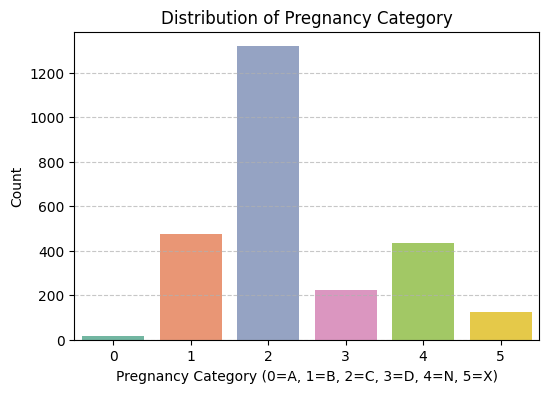

In [ ]:
#Barplot of pregnancy category to view the class balance
plt.figure(figsize=(6, 4))
sns.countplot(x='Pregnancy_Category', hue='Pregnancy_Category', data=data, palette='Set2', legend=False)
plt.title("Distribution of Pregnancy Category")
plt.xlabel("Pregnancy Category (0=A, 1=B, 2=C, 3=D, 4=N, 5=X)")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Interpretation:** This bar chart shows the distribution of records across the different pregnancy safety categories. It’s clear that the dataset is highly imbalanced, with Category 2 (which corresponds to Category C in the FDA system) being the most represented by a wide margin. In contrast, Categories 0 and 5 (which likely represent unknown or high-risk drugs, respectively) have very few instances.

In [ ]:
#Label encoding the predictor categorical columns
categorical_cols = ['Csa', 'Rx_Otc', 'Alcohol_Interaction', 'Drug_Classes', 'Medical_Condition']
for col in categorical_cols:
    if col in data.columns:
        data[col] = label_encoder.fit_transform(data[col])

In [ ]:
#Log transformations and scaling for the numeric features
data['Activity_log'] = np.log1p(data['Activity'])
data['No_Of_Reviews_log'] = np.log1p(data['No_Of_Reviews'])
features_to_scale = ['Activity_log', 'Rating', 'No_Of_Reviews_log']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[features_to_scale])

In [ ]:
data.describe()

Medical_Condition  Drug_Classes     Activity       Rx_Otc  \
count        2591.000000   2591.000000  2591.000000  2591.000000   
mean           21.436897    157.548051     8.624469     1.093786   
std            13.301747     81.847437    17.380298     0.572271   
min             0.000000      0.000000     0.000000     0.000000   
25%            10.000000     85.000000     0.000000     1.000000   
50%            20.000000    168.000000     2.000000     1.000000   
75%            35.000000    240.000000     7.000000     1.000000   
max            46.000000    263.000000   100.000000     2.000000   

       Pregnancy_Category          Csa       Rating  No_Of_Reviews  \
count         2591.000000  2591.000000  2591.000000    2591.000000   
mean             2.368198     4.698186     3.352258      43.026631   
std              1.122040     1.086239     4.260288     147.485916   
min              0.000000     0.000000    -1.000000       0.000000   
25%              2.000000     5.000000    -1.000000       0.000000   
50%              2.000000     5.000000     4.000000       1.000000   
75%              3.000000     5.000000     7.400000      17.000000   
max              5.000000     5.000000    10.000000    2934.000000   

       Alcohol_Interaction  Activity_log  No_Of_Reviews_log  
count          2591.000000   2591.000000        2591.000000  
mean              0.488614      1.327883           1.576701  
std               0.499967      1.253508           1.906496  
min               0.000000      0.000000           0.000000  
25%               0.000000      0.000000           0.000000  
50%               0.000000      1.098612           0.693147  
75%               1.000000      2.079442           2.890372  
max               1.000000      4.615121           7.984463

# **Natural Language Processing**

In [ ]:
#Cleaning the text column by removing non-alphabetic charecters, and making the words standardized by converting into lower case
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\W+', ' ', text)
    return text

In [ ]:
data['Side_Effects'] = data['Side_Effects'].apply(clean_text)

In [ ]:
data['Side_Effects'].head()

0     hives difficult breathing swelling in your face or throat or a severe skin reaction fever sore throat burning in your eyes skin pain red or purple skin rash that spreads and causes blistering and peeling seek medical treatment if you have a serious drug reaction that can affect many parts of your body symptoms may include skin rash fever swollen glands flu like symptoms muscle aches severe weakness unusual bruising or yellowing of your skin or eyes this reaction may occur several weeks after you began using doxycycline doxycycline may cause serious side effects call your doctor at once if you have severe stomach pain diarrhea that is watery or bloody throat irritation trouble swallowing chest pain irregular heart rhythm feeling short of breath little or no urination low white blood cell counts fever chills swollen glands body aches weakness pale skin easy bruising or bleeding severe headaches ringing in your ears dizziness nausea vision problems pain behind your eyes loss of appetite upper stomach pain that may spread to your back tiredness nausea or vomiting fast heart rate dark urine jaundice yellowing of the skin or eyes common side effects of doxycycline may include nausea and vomiting upset stomach loss of appetite mild diarrhea skin rash or itching darkened skin color vaginal itching or discharge 
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          hives difficulty breathing swelling of your face lips tongue or throat call your doctor at once if you have a light headed feeling like you might pass out little or no urination high potassium level nausea weakness tingly feeling chest pain irregular heartbeats loss of movement o signs of other electrolyte imbalances increased thirst or urination confusion vomiting muscle pain slurred speech severe weakness numbness loss of coordination feeling unsteady common spironolactone side effects may include breast swelling or tenderness 
2                                                            skin rash fever swollen glands flu like symptoms muscle aches severe weakness unusual bruising or yellowing of your skin or eyes this may be more likely with long term use of minocycline and the reaction may occur several weeks after you began using this medicine call your doctor at once if you have little or no urination swelling in your feet or ankles feeling tired or short of breath signs of kidney problems loss of appetite upper stomach pain that may spread to your back nausea or vomiting loss of appetite easy bruising or bleeding dark urine yellowing of the skin or eyes signs of liver or pancreas problems joint pain or swelling with fever swollen glands muscle aches chest pain vomiting unusual thoughts or behavior and patchy skin color severe headaches ringing in your ears dizziness vision problems pain behind your eyes or swollen glands flu symptoms easy bruising or bleeding severe tingling or numbness muscle weakness chest pain new or worsening cough with fever trouble breathing common minocycline side effects may include numbness tingling burning pain hair loss discoloration of you skin or nails dizziness spinning sensation muscle or joint pain nausea diarrhea loss of appetite swollen tongue cough trouble swallowing rash itching or headache 
3      

In [ ]:
#Creating a column showing the length of the words from side effects column for each entry
data['side_effects_len'] = data.Side_Effects.apply(len)
data.head()

Drug_Name  Medical_Condition  \
0     Doxycycline                  2   
1  Spironolactone                  2   
2     Minocycline                  2   
3        Accutane                  2   
4     Clindamycin                  2   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Side_Effects  \
0   hives difficult breathing swelling in your face or throat or a severe skin reaction fever sore throat burning in your eyes skin pain red or purple skin rash that spreads and causes blistering and peeling seek medical treatment if you have a serious drug reaction that can affect many parts of your body symptoms may include skin rash fever swollen glands flu like symptoms muscle aches severe weakness unusual bruising or yellowing of your skin or eyes this reaction may occur several weeks after you began using doxycycline doxycycline may cause serious side effects call your doctor at once if you have severe stomach pain diarrhea that is watery or bloody throat irritation trouble swallowing chest pain irregular heart rhythm feeling short of breath little or no urination low white blood cell counts fever chills swollen glands body aches weakness pale skin easy bruising or bleeding severe headaches ringing in your ears dizziness nausea vision problems pain behind your eyes loss of appetite upper stomach pain that may spread to your back tiredness nausea or vomiting fast heart rate dark urine jaundice yellowing of the skin or eyes common side effects of doxycycline may include nausea and vomiting upset stomach loss of appetite mild diarrhea skin rash or itching darkened skin color vaginal itching or discharge    
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        hives difficulty breathing swelling of your face lips tongue or throat call your doctor at once if you have a light headed feeling like you might pass out little or no urination high potassium level nausea weakness tingly feeling chest pain irregular heartbeats loss of movement o signs of other electrolyte im

Text(0.5, 0, 'Side Effects Length')

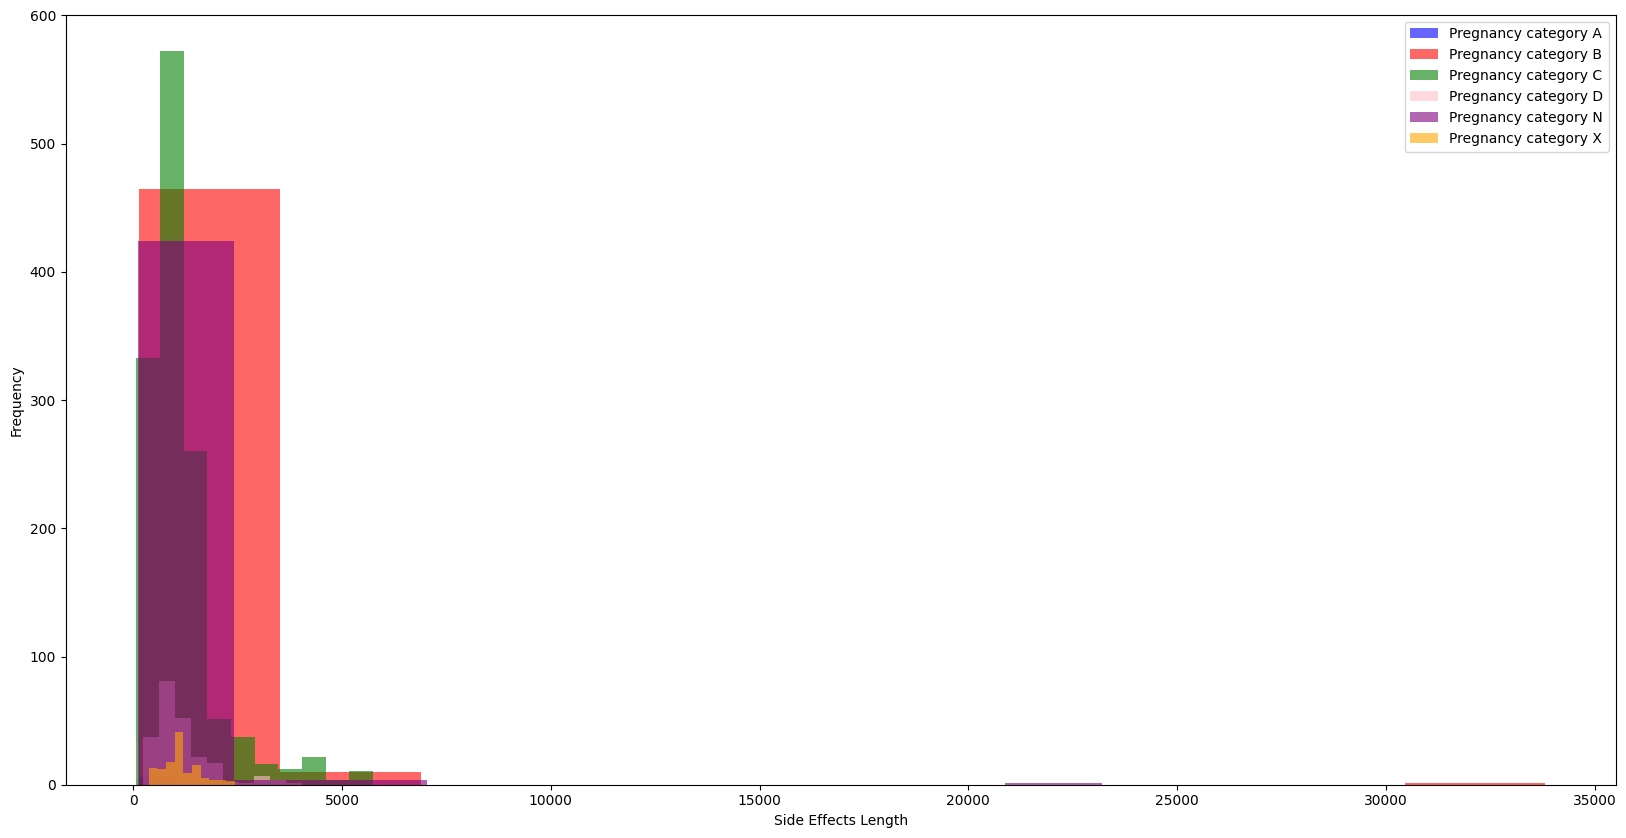

In [ ]:
#Histogram plot showing the length of words from side effects column for each pregnancy category
plt.figure(figsize=(20, 10))
data[data.Pregnancy_Category==0].side_effects_len.plot(bins=5, kind='hist', color='blue', label='Pregnancy category A', alpha=0.6)
data[data.Pregnancy_Category==1].side_effects_len.plot(kind='hist', color='red', label='Pregnancy category B', alpha=0.6)
data[data.Pregnancy_Category==2].side_effects_len.plot(kind='hist', color='green', label='Pregnancy category C', alpha=0.6)
data[data.Pregnancy_Category==3].side_effects_len.plot(kind='hist', color='pink', label='Pregnancy category D', alpha=0.6)
data[data.Pregnancy_Category==4].side_effects_len.plot(kind='hist', color='purple', label='Pregnancy category N', alpha=0.6)
data[data.Pregnancy_Category==5].side_effects_len.plot(kind='hist', color='orange', label='Pregnancy category X', alpha=0.6)
plt.legend()
plt.xlabel("Side Effects Length")

**Interpretation:** The histogram illustrates the distribution of side effects length across different pregnancy categories, reflecting how verbose or detailed the listed side effects are for each drug. Most drugs fall within a side effect length of under 5,000 characters, with the highest density observed between 500 and 2,500. Pregnancy Categories B, C, and N dominate this range, indicating that drugs in these categories typically have longer or more descriptive side effect documentation. A few outliers, especially in Categories B and N, stretch beyond 10,000 characters, suggesting rare cases with extensive reported side effects.

In contrast, Categories A and D show more compact distributions, which may be due to fewer known adverse effects or more conservative documentation. Category X shows moderate spread, potentially capturing drugs with contraindications that require more detailed warnings. These patterns are relevant to machine learning feature engineering, as side effect text length may indirectly signal risk level or regulatory caution, especially in high-risk or less-studied categories. Including side effect length as a feature may enhance model sensitivity to pharmacovigilance-related variables in the classification of pregnancy-safe drugs.

In [ ]:
data[data.Pregnancy_Category==1].describe()

Medical_Condition  Drug_Classes    Activity      Rx_Otc  \
count         476.000000    476.000000  476.000000  476.000000   
mean           21.376050    141.932773   13.306723    1.069328   
std            13.104092     75.516995   22.525645    0.508273   
min             0.000000      0.000000    0.000000    0.000000   
25%             9.000000     72.000000    1.000000    1.000000   
50%            22.000000    140.000000    3.000000    1.000000   
75%            35.000000    207.000000   13.000000    1.000000   
max            46.000000    258.000000  100.000000    2.000000   

       Pregnancy_Category         Csa      Rating  No_Of_Reviews  \
count               476.0  476.000000  476.000000     476.000000   
mean                  1.0    4.962185    3.226891      34.071429   
std                   0.0    0.418819    4.248030     129.370114   
min                   1.0    0.000000   -1.000000       0.000000   
25%                   1.0    5.000000   -1.000000       0.000000   
50%                   1.0    5.000000    3.300000       1.000000   
75%                   1.0    5.000000    7.200000      10.000000   
max                   1.0    5.000000   10.000000    1357.000000   

       Alcohol_Interaction  Activity_log  No_Of_Reviews_log  side_effects_len  
count           476.000000    476.000000         476.000000        476.000000  
mean              0.369748      1.662817           1.380955       1073.231092  
std               0.483244      1.375034           1.766330       1728.183188  
min               0.000000      0.000000           0.000000        149.000000  
25%               0.000000      0.693147           0.000000        547.000000  
50%               0.000000      1.386294           0.693147        724.500000  
75%               1.000000      2.639057           2.397895       1166.500000  
max               1.000000      4.615121           7.213768      33816.000000

In [ ]:
#Each instance of side effects column looks like this
data[data.side_effects_len == 1325].Side_Effects.iloc[0]

' hives difficult breathing swelling in your face or throat or a severe skin reaction fever sore throat burning in your eyes skin pain red or purple skin rash that spreads and causes blistering and peeling seek medical treatment if you have a serious drug reaction that can affect many parts of your body symptoms may include skin rash fever swollen glands flu like symptoms muscle aches severe weakness unusual bruising or yellowing of your skin or eyes this reaction may occur several weeks after you began using doxycycline doxycycline may cause serious side effects call your doctor at once if you have severe stomach pain diarrhea that is watery or bloody throat irritation trouble swallowing chest pain irregular heart rhythm feeling short of breath little or no urination low white blood cell counts fever chills swollen glands body aches weakness pale skin easy bruising or bleeding severe headaches ringing in your ears dizziness nausea vision problems pain behind your eyes loss of appetite

In [ ]:
#Processing the text to remove punctuations, and stop words
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    STOPWORDS = stopwords.words('english') + ['you', 'immediately', 'professional', 'your', 'medicine', 'doctor', 'call', 'may', 'might', 'check',
                                              'include', 'side', 'effects', 'you', 'can', 'take', 'get', 'typeof', 'icon', 'just', 'contains',
                                              'symptoms', 'take', 'get', 'using', 'causing', 'causes', 'have', 'seek', 'medical', 'within',
                                              'treatment', 'began','along', 'many', 'parts','reaction', 'several', 'severe', 'none', 'much',
                                              'return', 'behind', 'away', 'taking', 'such', 'need', 'go', 'likely', 'questions', 'bothersome',
                                              'also', 'these', 'where', 'those', 'this', 'that', 'an', 'a', 'or', 'of', 'to', 'have', 'be',
                                              'at', 'common', 'very', 'with', 'and', 'if', 'as', 'on', 'not', 'like', 'occur', 'is', 'are',
                                              'ways', 'was', 'yourself', 'using', 'should', 'need', 'will', 'by', 'still', 'within', 'happen',
                                              'behind', 'few', 'called', 'just', 'both', 'too', 'who', 'does', 'could', 'has', 'given', 'material',
                                              'occurs', 'been', 'over', 'first', 'after', 'before', 'rare', 'clay', 'without', 'cause', 'signs',
                                              'following', 'tell', 'sometimes', 'people', 'signs', 'stop', 'although', 'around', 'fda', 'especially',
                                              '10', '1088', '12', '24', '30', '400', '65', '800', 'abacavir', 'able', 'acetaminophen', 'advil', 'african',
                                              'ala', 'allegra', 'american', 'amlodipine', 'among', 'ammonia', 'anthralin', 'antibiotic', 'anywhere', 'ask',
                                              'appear', 'apply', 'aspirin', 'bandage', 'benzocaine', 'benzoyl', 'caffeine', 'calcium','canker', 'capsaicin',
                                              'cause', 'cdad', 'chance', 'change', 'case', 'chlorpheniramine', 'claritin', 'codeine', 'coffee', 'come',
                                              'contain', 'cr', 'cover', 'count', 'contact', 'continue', 'continuous','dac', 'dexbrompheniramine',
                                              'dextromethorphan', 'diphenhydramine', 'dm', 'dos', 'doxycycline', 'doxylamine', 'ee', 'eg', 'empty',
                                              'emtricitabine', 'enjoy', 'er', 'false', 'forte', 'get', 'glo', 'hc', 'hct', 'humalog', 'humulin',
                                              'hydrochlorthiazide', 'hydrocodone', 'hydrocortisone', 'ibuprofen', 'insulin', 'iodoquinol', 'iv', 'johnson',
                                              'kwikpen', 'la', 'lab', 'lamivudine', 'lead', 'magnesia', 'magnesium', 'mee', 'meet', 'menthol', 'metformin',
                                              'methylene', 'methyl', 'mometasone', 'motrin', 'mucinex', 'naloxone', 'need', 'never', 'not', 'novolog', 'oh',
                                              'one', 'opioid', 'others', 'pas', 'pe', 'per', 'peroxide', 'pharmacist', 'phenylephrine','pinpoint', 'pm', 'place',
                                              'plus', 'potassium', 'pramoxine', 'pseudoephedrine', 'pu', 'salicylate', 'serotonin', 'sodium', 'something',
                                              'steroid', 'stevens', 'sure', 'take', 'tar', 'tenofovir', 'theraflu', 'tylenol', 'unit', 'use', 'warn', 'wind',
                                              'xl', 'xr', 'yet', 'well', 'wear', 'way']
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])

In [ ]:
data['clean_side_effects'] = data.Side_Effects.apply(text_process)
data.head()

Drug_Name  Medical_Condition  \
0     Doxycycline                  2   
1  Spironolactone                  2   
2     Minocycline                  2   
3        Accutane                  2   
4     Clindamycin                  2   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Side_Effects  \
0   hives difficult breathing swelling in your face or throat or a severe skin reaction fever sore throat burning in your eyes skin pain red or purple skin rash that spreads and causes blistering and peeling seek medical treatment if you have a serious drug reaction that can affect many parts of your body symptoms may include skin rash fever swollen glands flu like symptoms muscle aches severe weakness unusual bruising or yellowing of your skin or eyes this reaction may occur several weeks after you began using doxycycline doxycycline may cause serious side effects call your doctor at once if you have severe stomach pain diarrhea that is watery or bloody throat irritation trouble swallowing chest pain irregular heart rhythm feeling short of breath little or no urination low white blood cell counts fever chills swollen glands body aches weakness pale skin easy bruising or bleeding severe headaches ringing in your ears dizziness nausea vision problems pain behind your eyes loss of appetite upper stomach pain that may spread to your back tiredness nausea or vomiting fast heart rate dark urine jaundice yellowing of the skin or eyes common side effects of doxycycline may include nausea and vomiting upset stomach loss of appetite mild diarrhea skin rash or itching darkened skin color vaginal itching or discharge    
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        hives difficulty breathing swelling of your face lips tongue or throat call your doctor at once if you have a light headed feeling like you might pass out little or no urination high potassium level nausea weakness tingly feeling chest pain irregular heartbeats loss of movement o signs of other electrolyte im

In [ ]:
#Lemmatizing the side effects column to reduce word variations to their base or dictionary form
lemmatizer = WordNetLemmatizer()
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
def lemmatize_text(text):
    words = word_tokenize(text)
    pos_tags = pos_tag(words)
    lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags]
    return ' '.join(lemmatized_words)

In [ ]:
data['clean_side_effects'] = data['clean_side_effects'].apply(lemmatize_text)

In [ ]:
#comparing the cleaned side effects column with the original side effects column
print(data[['Side_Effects', 'clean_side_effects']].sample(5))

In [ ]:
data.clean_side_effects.head()

0                                   hive difficult breathe swell face throat skin fever sore throat burn eye skin pain red purple skin rash spread blister peel serious drug affect body skin rash fever swell gland flu muscle ache weakness unusual bruising yellow skin eye week serious stomach pain diarrhea watery bloody throat irritation trouble swallow chest pain irregular heart rhythm feel short breath little urination low white blood cell count fever chill swollen gland body ache weakness pale skin easy bruise bleed headache ring ear dizziness nausea vision problem pain eye loss appetite upper stomach pain spread back tiredness nausea vomit fast heart rate dark urine jaundice yellow skin eye nausea vomit upset stomach loss appetite mild diarrhea skin rash itching darken skin color vaginal itching discharge
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                hive difficulty breathe swell face lip tongue throat light head feeling pas little urination high level nausea weakness tingly feel chest pain irregular heartbeat loss movement electrolyte imbalance increase thirst urination confusion vomit muscle pain slur speech weakness numbness loss coordination feel unsteady spironolactone breast swell tenderness
2    skin rash fever swell gland flu muscle ache weakness unusual bruising yellow skin eye long term minocycline week little urination swell foot ankle feel tired short breath kidney problem loss appetite upper stomach pain spread back nausea vomiting loss appetite easy bruise bleed dark urine yellowing skin eye liver pancreas problem joint pain swell fever swollen gland muscle ache chest pain vomit unusual thought behavior patchy skin color headache ring ear dizziness vision problem pain eye swell gland flu easy bruise bleed tingle numbness muscle weakness chest pain new worsening cough fever trouble breathe minocycline numbness tingle burn pain hair loss discoloration skin nail dizziness spin sensation muscle joint pain nausea diarrhea loss appetite swell tongue cough trouble swallow rash itching headache
3                                                                                         problem vision hear muscle joint pain bone pain back pain increase thirst increase urination hallucination see hear thing real depression unusual mood change cry spell feeling low self worth loss interest thing enjoy new sleep problem thought hurt liver pancreas problem loss appetite upper stomach pain spread back nausea vomit fast heart rate dark urine jaundice yellow skin eye stomach problem stomach chest pain pain swallow heartburn diarrhea rectal bleeding bloody tarry stool increase pressure inside skull headache ring ear dizziness nausea vision problem pain eye accutane dryness skin lips eye nose nosebleed vision problem headache back pain joint pain muscle problem skin reaction cold stuffy nose sneeze sore throat
4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     hive difficult breathe swell face lip tongue throat clindamycin topical serious clindamycin topical redness itch dryness treat skin area stomach pain diarrhea watery bloody e

In [ ]:
#viewing the 100 most common words from side effects column related to pregnancy category 0-> A
words = data[data.Pregnancy_Category==0].clean_side_effects.apply(lambda x: [word.lower() for word in x.split()])
cat_0_words = Counter()
for effects in words:
    cat_0_words.update(effects)
cat_0_words.most_common(100)

[('pain', 37),
 ('loss', 32),
 ('feel', 31),
 ('breathe', 22),
 ('irregular', 22),
 ('headache', 22),
 ('change', 22),
 ('hair', 21),
 ('chest', 20),
 ('face', 19),
 ('appetite', 18),
 ('swell', 17),
 ('weakness', 17),
 ('skin', 16),
 ('weight', 16),
 ('hive', 15),
 ('difficult', 15),
 ('lip', 15),
 ('tongue', 15),
 ('throat', 15),
 ('trouble', 15),
 ('heartbeat', 14),
 ('irritable', 14),
 ('menstrual', 14),
 ('feeling', 14),
 ('fast', 13),
 ('tremor', 13),
 ('leg', 13),
 ('muscle', 13),
 ('diarrhea', 13),
 ('hot', 12),
 ('problem', 12),
 ('nervous', 12),
 ('child', 11),
 ('cramp', 11),
 ('discomfort', 11),
 ('neck', 11),
 ('jaw', 10),
 ('sweat', 10),
 ('cold', 10),
 ('sleep', 10),
 ('period', 10),
 ('increase', 10),
 ('less', 9),
 ('shortness', 9),
 ('breath', 9),
 ('rash', 9),
 ('sudden', 9),
 ('fever', 8),
 ('tiredness', 8),
 ('vomit', 8),
 ('eye', 8),
 ('attention', 8),
 ('pulse', 8),
 ('arm', 8),
 ('health', 8),
 ('care', 8),
 ('dizziness', 7),
 ('slow', 7),
 ('unusual', 7),
 ('te

In [ ]:
#viewing the 100 most common words from side effects column related to pregnancy category 1-> B
words = data[data.Pregnancy_Category==1].clean_side_effects.apply(lambda x: [word.lower() for word in x.split()])
cat_1_words = Counter()
for effects in words:
    cat_1_words.update(effects)
cat_1_words.most_common(100)

[('pain', 1262),
 ('skin', 1002),
 ('swell', 907),
 ('throat', 650),
 ('feel', 605),
 ('breathe', 528),
 ('stomach', 528),
 ('face', 444),
 ('tongue', 437),
 ('loss', 409),
 ('lip', 407),
 ('diarrhea', 405),
 ('fever', 403),
 ('rash', 379),
 ('eye', 375),
 ('hive', 374),
 ('problem', 363),
 ('weakness', 334),
 ('vomit', 325),
 ('muscle', 323),
 ('nausea', 319),
 ('urine', 312),
 ('mouth', 311),
 ('unusual', 307),
 ('chest', 307),
 ('trouble', 303),
 ('dizziness', 295),
 ('blood', 292),
 ('itch', 289),
 ('sore', 286),
 ('headache', 284),
 ('serious', 276),
 ('low', 272),
 ('urination', 267),
 ('difficult', 260),
 ('heartbeat', 259),
 ('breath', 244),
 ('weight', 244),
 ('cough', 241),
 ('foot', 237),
 ('redness', 229),
 ('feeling', 223),
 ('b', 221),
 ('infection', 217),
 ('red', 212),
 ('fast', 209),
 ('heart', 206),
 ('body', 205),
 ('1', 203),
 ('dry', 198),
 ('vision', 189),
 ('bloody', 186),
 ('yellow', 185),
 ('color', 184),
 ('increase', 182),
 ('constipation', 181),
 ('right', 1

In [ ]:
#viewing the 100 most common words from side effects column related to pregnancy category 2-> C
words = data[data.Pregnancy_Category==2].clean_side_effects.apply(lambda x: [word.lower() for word in x.split()])
cat_2_words = Counter()
for effects in words:
    cat_2_words.update(effects)
cat_2_words.most_common(100)

[('skin', 3242),
 ('pain', 2906),
 ('swell', 2159),
 ('throat', 1750),
 ('breathe', 1688),
 ('feel', 1538),
 ('face', 1518),
 ('stomach', 1380),
 ('lip', 1269),
 ('loss', 1269),
 ('nausea', 1235),
 ('tongue', 1173),
 ('hive', 1129),
 ('vomit', 1055),
 ('problem', 1045),
 ('dizziness', 1037),
 ('eye', 1004),
 ('muscle', 988),
 ('weakness', 979),
 ('increase', 964),
 ('chest', 923),
 ('headache', 919),
 ('mouth', 918),
 ('fever', 913),
 ('unusual', 892),
 ('trouble', 892),
 ('feeling', 882),
 ('change', 872),
 ('blood', 871),
 ('vision', 869),
 ('difficult', 825),
 ('serious', 819),
 ('itch', 802),
 ('heartbeat', 769),
 ('urine', 769),
 ('diarrhea', 766),
 ('rash', 765),
 ('fast', 762),
 ('redness', 748),
 ('body', 700),
 ('breath', 692),
 ('light', 673),
 ('urination', 626),
 ('weight', 626),
 ('dry', 609),
 ('tiredness', 599),
 ('sore', 592),
 ('red', 587),
 ('burn', 577),
 ('drowsiness', 572),
 ('attention', 566),
 ('heart', 552),
 ('color', 547),
 ('sweat', 547),
 ('appetite', 546),


In [ ]:
#viewing the 100 most common words from side effects column related to pregnancy category 3-> D
words = data[data.Pregnancy_Category==3].clean_side_effects.apply(lambda x: [word.lower() for word in x.split()])
cat_3_words = Counter()
for effects in words:
    cat_3_words.update(effects)
cat_3_words.most_common(100)

[('pain', 706),
 ('skin', 577),
 ('swell', 420),
 ('feel', 393),
 ('loss', 334),
 ('throat', 294),
 ('problem', 294),
 ('stomach', 264),
 ('weakness', 256),
 ('eye', 248),
 ('muscle', 239),
 ('unusual', 235),
 ('breathe', 227),
 ('nausea', 227),
 ('fever', 225),
 ('face', 208),
 ('dizziness', 207),
 ('sore', 206),
 ('feeling', 200),
 ('chest', 197),
 ('trouble', 194),
 ('lip', 191),
 ('vomit', 190),
 ('tongue', 185),
 ('hive', 179),
 ('foot', 175),
 ('diarrhea', 173),
 ('light', 166),
 ('urine', 164),
 ('vision', 163),
 ('rash', 161),
 ('mouth', 161),
 ('breath', 156),
 ('headache', 155),
 ('heartbeat', 154),
 ('urination', 152),
 ('blood', 151),
 ('head', 149),
 ('yellow', 146),
 ('cough', 131),
 ('low', 129),
 ('hand', 129),
 ('confusion', 124),
 ('appetite', 115),
 ('movement', 115),
 ('right', 112),
 ('change', 112),
 ('bruise', 111),
 ('short', 107),
 ('tiredness', 107),
 ('red', 106),
 ('weight', 106),
 ('body', 105),
 ('increase', 105),
 ('pas', 105),
 ('drowsiness', 105),
 ('di

In [ ]:
#viewing the 100 most common words from side effects column related to pregnancy category 4-> N
words = data[data.Pregnancy_Category==4].clean_side_effects.apply(lambda x: [word.lower() for word in x.split()])
cat_4_words = Counter()
for effects in words:
    cat_4_words.update(effects)
cat_4_words.most_common(100)

[('skin', 763),
 ('throat', 641),
 ('pain', 631),
 ('swell', 604),
 ('breathe', 529),
 ('face', 462),
 ('stomach', 459),
 ('lip', 450),
 ('tongue', 434),
 ('hive', 406),
 ('bad', 358),
 ('feel', 333),
 ('serious', 307),
 ('mouth', 303),
 ('eye', 298),
 ('chest', 286),
 ('urine', 281),
 ('rash', 277),
 ('unusual', 275),
 ('loss', 269),
 ('difficult', 266),
 ('right', 255),
 ('fever', 247),
 ('headache', 242),
 ('problem', 242),
 ('blister', 240),
 ('nausea', 233),
 ('peel', 230),
 ('dizziness', 228),
 ('trouble', 228),
 ('red', 205),
 ('drowsiness', 200),
 ('weakness', 199),
 ('b', 196),
 ('itch', 194),
 ('confusion', 189),
 ('feeling', 186),
 ('heartbeat', 180),
 ('blood', 180),
 ('1', 178),
 ('even', 177),
 ('vomit', 176),
 ('fast', 176),
 ('constipation', 173),
 ('redness', 171),
 ('vision', 169),
 ('color', 167),
 ('light', 163),
 ('dry', 163),
 ('seizure', 162),
 ('yellow', 158),
 ('swollen', 156),
 ('drug', 155),
 ('muscle', 153),
 ('appetite', 146),
 ('dark', 146),
 ('0', 145),
 

In [ ]:
#viewing the 100 most common words from side effects column related to pregnancy category 5-> X
words = data[data.Pregnancy_Category==5].clean_side_effects.apply(lambda x: [word.lower() for word in x.split()])
cat_5_words = Counter()
for effects in words:
    cat_5_words.update(effects)
cat_5_words.most_common(100)

[('pain', 594),
 ('problem', 284),
 ('swell', 250),
 ('skin', 247),
 ('stomach', 187),
 ('headache', 180),
 ('nausea', 168),
 ('loss', 162),
 ('blood', 162),
 ('weakness', 160),
 ('feel', 151),
 ('muscle', 145),
 ('vision', 138),
 ('throat', 138),
 ('chest', 135),
 ('sudden', 132),
 ('eye', 130),
 ('change', 124),
 ('urine', 110),
 ('face', 109),
 ('vomit', 104),
 ('breathe', 104),
 ('lip', 103),
 ('hive', 100),
 ('unusual', 96),
 ('tongue', 95),
 ('increase', 94),
 ('trouble', 94),
 ('yellow', 90),
 ('dark', 88),
 ('breath', 88),
 ('color', 84),
 ('liver', 83),
 ('difficult', 81),
 ('back', 80),
 ('numbness', 79),
 ('tiredness', 78),
 ('pressure', 77),
 ('body', 76),
 ('jaundice', 73),
 ('foot', 71),
 ('fever', 71),
 ('appetite', 69),
 ('dizziness', 69),
 ('mood', 68),
 ('right', 68),
 ('upper', 67),
 ('short', 67),
 ('cough', 65),
 ('breast', 65),
 ('tenderness', 62),
 ('shoulder', 61),
 ('legs', 59),
 ('serious', 59),
 ('itch', 58),
 ('warmth', 58),
 ('diarrhea', 57),
 ('heart', 54)

# **Model training and evaluation**

In [ ]:
#defining predictors and target
#X_text: textual feature (cleaned side effects)
#X_other: structured features (other categorical predictors)
X_text = data.clean_side_effects
X_other = data[['Drug_Classes', 'Rx_Otc', 'Medical_Condition', 'Csa', 'Alcohol_Interaction']]
y = data.Pregnancy_Category
print(X_text.shape)
print(X_other.shape)
print(y.shape)
X_text_train, X_text_test, X_other_train, X_other_test, y_train, y_test = train_test_split( X_text, X_other, y, test_size=0.2, random_state=42, stratify=y)
print(X_text_train.shape)
print(X_other_train.shape)
print(X_other_test.shape)
print(X_text_test.shape)
print(y_train.shape)
print(y_test.shape)

(2591,)
(2591, 5)
(2591,)
(2072,)
(2072, 5)
(519, 5)
(519,)
(2072,)
(519,)


In [ ]:
tfidf_vectorizer_pipeline = Pipeline([('vect', CountVectorizer(max_features=None, min_df=5, max_df=0.7)),('tfidf', TfidfTransformer())])
# Fit the pipeline on training text data
tfidf_vectorizer_pipeline.fit(X_text_train)
# Transform the text data
X_text_train_tfidf = tfidf_vectorizer_pipeline.transform(X_text_train)
X_text_test_tfidf = tfidf_vectorizer_pipeline.transform(X_text_test)

In [ ]:
categorical_cols = ['Drug_Classes', 'Rx_Otc', 'Medical_Condition', 'Csa', 'Alcohol_Interaction']
#Column transformer-> one-hot encodes categoricals, passes numeric as-is
preprocessor = ColumnTransformer(transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)], remainder = 'passthrough')
X_other_train_encoded = preprocessor.fit_transform(X_other_train)
X_other_test_encoded = preprocessor.transform(X_other_test)

In [ ]:
#Combine TF-IDF text features and encoded structured features into a single feature matrix for model training and testing
X_train_combined = hstack([X_text_train_tfidf, X_other_train_encoded])
X_test_combined = hstack([X_text_test_tfidf, X_other_test_encoded])

In [ ]:
#Scaling the features for logistic, SVM, and KNN models
X_train_dense = X_train_combined.toarray()
X_train_scaled = scaler.fit_transform(X_train_dense)
X_test_dense = X_test_combined.toarray()
X_test_scaled = scaler.transform(X_test_dense)

In [ ]:
# Get feature names from the actual fitted vectorizer
vect_fitted = tfidf_vectorizer_pipeline.named_steps['vect']
tfidf_feature_names = vect_fitted.get_feature_names_out()
encoded_feature_names = preprocessor.get_feature_names_out()
all_feature_names = list(tfidf_feature_names) + list(encoded_feature_names)
X_train_df = pd.DataFrame(X_train_combined.toarray(), columns=all_feature_names)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=all_feature_names)

In [ ]:
#Save the names of all feature columns from the scaled training dataset to a text file. This helps in preserving the feature order and names for later
#interpretation or when reusing the model.
with open("feature_names.txt", "w") as f:
    for col in X_train_scaled_df.columns:
        f.write(col + "\n")

In [ ]:
# This function visualizes topics generated by a fitted NMF (Non-negative Matrix Factorization) model using word clouds.
def plot_nmf_wordclouds(model, feature_names, n_top_words=30, n_cols=2):
    n_topics = model.n_components
    n_rows = (n_topics + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4 * n_rows))
    for i, topic_weights in enumerate(model.components_):
        top_indices = topic_weights.argsort()[::-1][:n_top_words]
        top_words = {feature_names[j]: topic_weights[j] for j in top_indices}
        row = i // n_cols
        col = i % n_cols
        ax = axes[row][col] if n_rows > 1 else axes[col]
        wc = WordCloud(background_color='white', max_words=n_top_words).generate_from_frequencies(top_words)
        ax.imshow(wc, interpolation='bilinear')
        ax.set_title(f"Topic #{i+1}", fontsize=14)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
# This block trains a Non-negative Matrix Factorization (NMF) model to discover hidden topics in the text data.
def display_topics(model, feature_names, n_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}: ", ", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
nmf = NMF(n_components=20, random_state=42)
nmf.fit(X_text_train_tfidf)
display_topics(nmf, tfidf_vectorizer_pipeline.get_feature_names_out())

Topic 1:  short, breath, sudden, problem, blood, foot, feel, shoulder, jaw, speech
Topic 2:  bad, deadly, though, warn, related, drug, swollen, caution, help, effect
Topic 3:  skin, loss, urine, spot, decrease, discomfort, unusual, eye, red, eyelid
Topic 4:  skin, irritation, sting, treat, burn, redness, itch, dryness, peel, mild
Topic 5:  dry, drowsiness, constipation, difficult, mouth, urination, excite, restless, blur, child
Topic 6:  low, feel, limp, gain, hollow, entire, heartbeat, leg, cramp, flutter
Topic 7:  thought, behavior, agitate, irritable, hostile, suicide, hurt, mentally, physically, hyperactive
Topic 8:  breathing, slow, debilitate, vomit, sigh, shallow, nausea, long, rate, adult
Topic 9:  skin, right, past, case, fatal, stools, eye, jaundice, take, dark
Topic 10:  skin, increase, hair, change, thin, treat, absorb, heal, wound, torso
Topic 11:  head, feeling, light, pas, heartbeat, chest, tingly, feel, high, irregular
Topic 12:  rectal, stomach, bleed, stool, bowel, vo

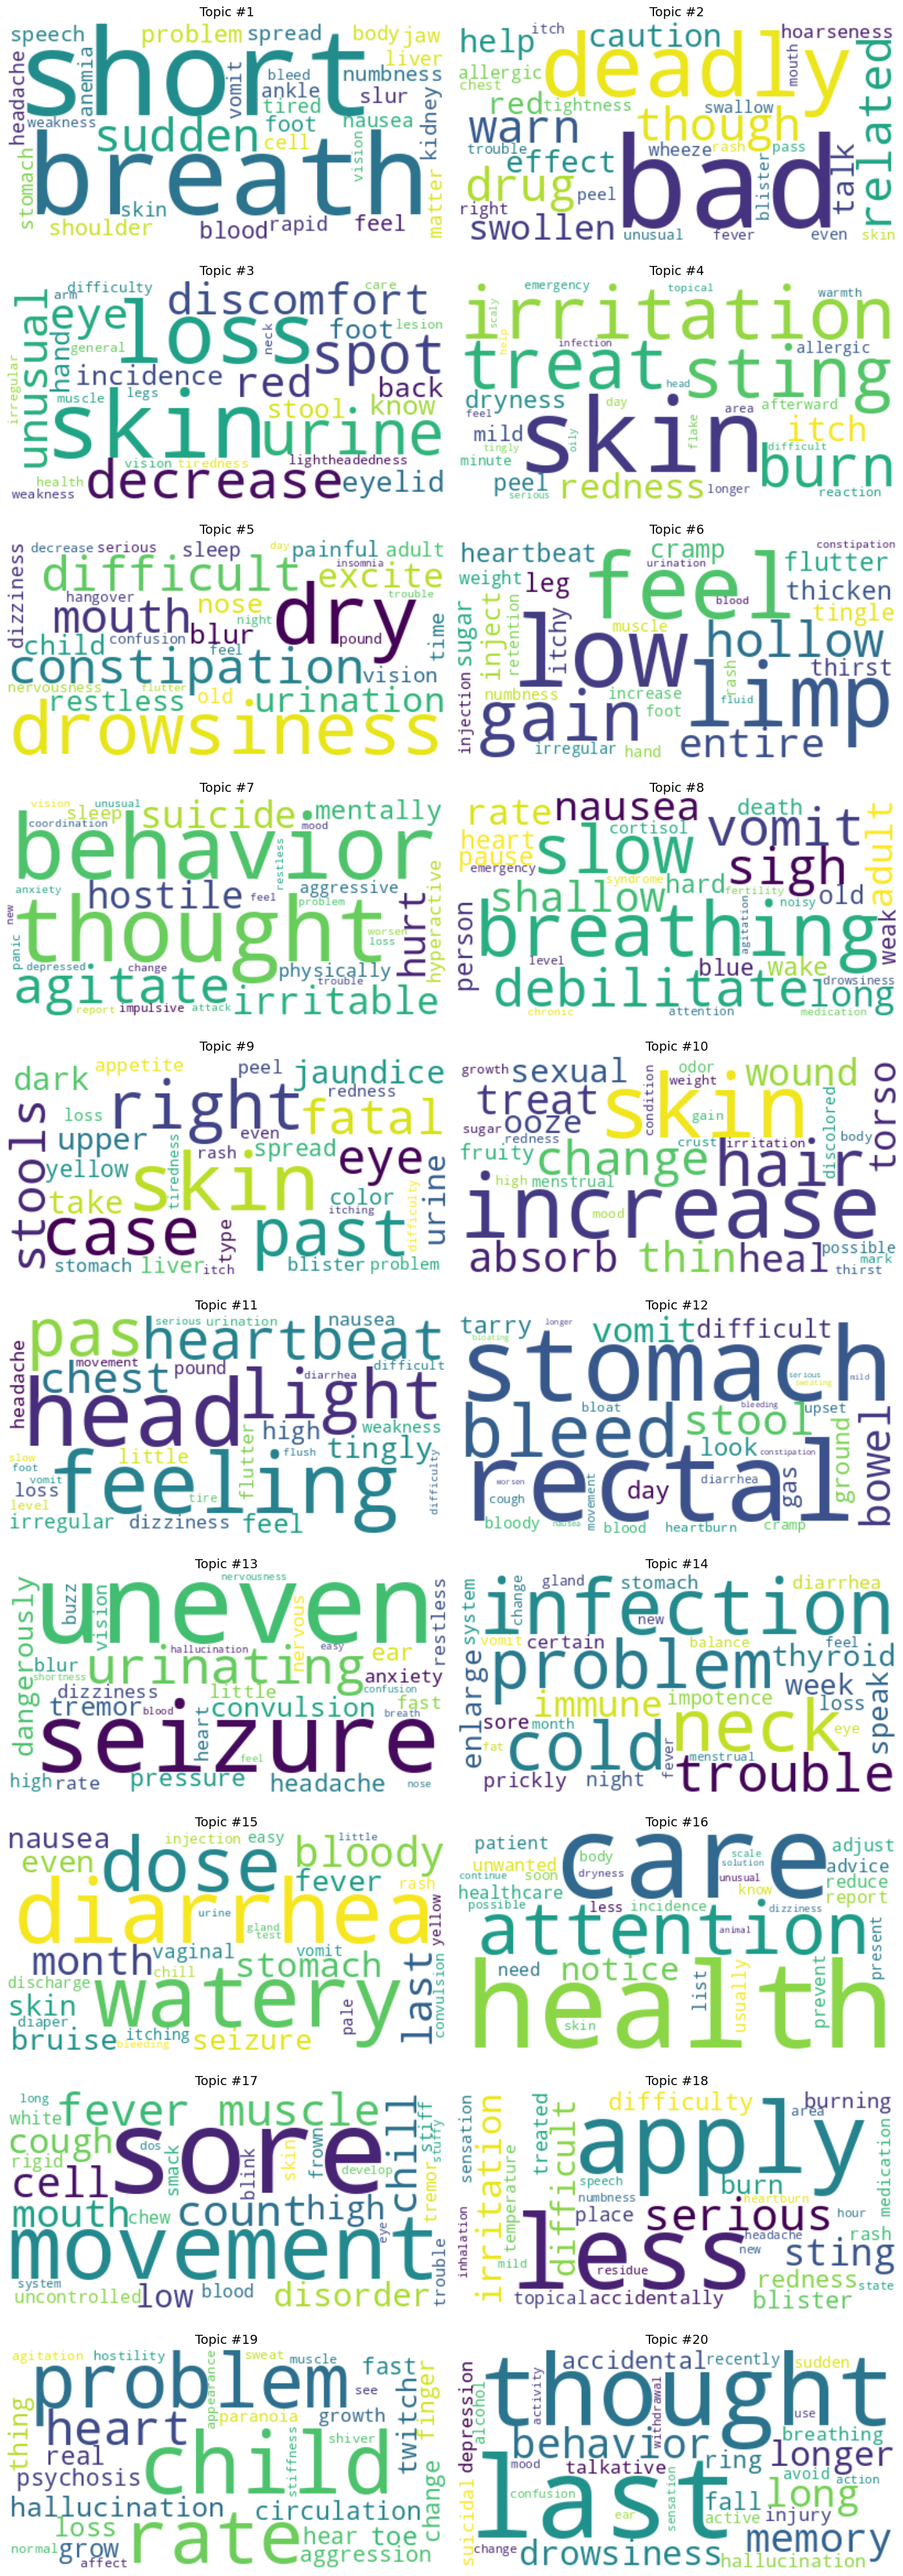

In [ ]:
# Extract features from the vectorizer
feature_names = tfidf_vectorizer_pipeline.get_feature_names_out()
# Plot word clouds
plot_nmf_wordclouds(nmf, feature_names)

**Interpretation:** After applying topic modeling to the cleaned side effects text, we discovered 20 distinct themes that reflect real-world drug reactions experienced by patients. These themes, revealed through both keyword analysis and visual word clouds, provide a deeper understanding of the nature and clusters of side effects.

**Topic 1: Respiratory and Cardiac Emergencies**
Terms like *short*, *breath*, *sudden*, and *speech* suggest urgent symptoms related to breathing difficulty or cardiac issues. This cluster indicates potentially life-threatening conditions requiring immediate medical attention.

**Topic 2: Drug Warnings and Toxicity Alerts**
Words such as *deadly*, *warn*, *caution*, and *related* reflect strong cautionary signals and severe adverse drug reactions, possibly black-box warnings or FDA alerts.

**Topic 3: Sensory and Dermatological Disruptions**
This topic highlights conditions like *skin loss*, *urine spot*, and *eye discomfort*, indicating general deterioration of surface-level bodily functions and discomfort.

**Topic 4: Topical Skin Irritation**
Dominated by words like *itch*, *sting*, *redness*, and *burn*, this topic represents common localized skin reactions from ointments, patches, or allergic responses.

**Topic 5: Anticholinergic or Sedative Effects**
With terms like *drowsiness*, *dry mouth*, *constipation*, and *blur*, this topic likely reflects side effects related to drugs with sedative or anticholinergic properties, often affecting older adults.

**Topic 6: Muscle Weakness and Circulation**
Here, words like *limp*, *cramp*, *flutter*, and *gain* point to muscular fatigue and circulatory effects, possibly associated with electrolyte imbalance or cardiovascular medications.

**Topic 7: Psychiatric and Behavioral Concerns**
This emotionally intense cluster, *suicide*, *agitate*, *hostile*, *thought*, *behavior*, suggests psychiatric reactions such as aggression, mood swings, or suicidal ideation.

**Topic 8: Respiratory Suppression and Nausea**
Terms like *shallow*, *sigh*, *vomit*, and *breathing* suggest depressive effects on respiration combined with GI upset, often seen with opioids or sedatives.

**Topic 9: Liver Dysfunction and Fatal Reactions**
With mentions of *jaundice*, *dark stools*, and *fatal*, this topic reflects symptoms of liver failure or advanced toxicity, a major signal for immediate discontinuation.

**Topic 10: Skin Growth and Healing Changes**
Words like *hair*, *thin*, *absorb*, *torso*, and *heal* show possible effects of topical steroids or hormone-based treatments that affect skin and hair patterns.

**Topic 11: Dizziness and Cardiac Fluctuations**
This group, featuring *lightheadedness*, *tingly*, *irregular heartbeat*, and *chest*, suggests circulatory instability or nervous system responses.

**Topic 12: Gastrointestinal Bleeding and Rectal Symptoms**
With strong GI indicators like *rectal bleed*, *stomach*, *bowel*, and *vomit*, this topic aligns with ulceration, inflammation, or internal bleeding side effects.

**Topic 13: Neurological Emergencies and Seizures**
This cluster includes intense terms like *seizure*, *tremor*, *convulsion*, *urinating*, and *dangerously*, reflecting acute neurologic toxicity and autonomic dysregulation.

**Topic 14: Infections and Immune Dysfunction**
Symptoms like *infection*, *thyroid*, *immune*, *cold*, and *enlarge* reflect autoimmune suppression, glandular swelling, or post-infection complications.

**Topic 15: Diarrhea and Prolonged GI Discomfort**
With *diarrhea*, *bloody stools*, *dose*, and *fever*, this topic suggests persistent gastrointestinal disturbances, possibly from antibiotic or chemotherapy drugs.

**Topic 16: Patient Experience and Monitoring Needs**
Words such as *attention*, *healthcare*, *report*, and *notice* shift away from symptoms and focus on patient awareness, counseling, and follow-up communication.

**Topic 17: Flu-like and Hematological Reactions**
*Fever*, *chill*, *sore*, *mouth*, and *cell count* show up here, reflecting systemic immune responses similar to viral infection or blood cell suppression.

**Topic 18: Severe Topical Reactions and Blistering**
Terms like *burn*, *sting*, *blister*, *redness*, and *apply* suggest adverse reactions to topical formulations potentially contact dermatitis or chemical burns.

**Topic 19: Pediatric Neurological Symptoms**
Featuring *child*, *hallucination*, *toe*, and *heart rate*, this unique cluster likely represents pediatric-focused side effects including motor or cognitive disruptions.

**Topic 20: Cognitive Decline and Sedation Risks**
With terms like *memory*, *drowsiness*, *fall*, and *accidental*, this topic reflects cognitive and motor impairment often associated with sedating drugs in elderly populations.

In [ ]:
#the top pregnancy category associated with each of the 20 NMF topics
topic_distributions = nmf.transform(X_text_train_tfidf)
topic_df = pd.DataFrame(topic_distributions, columns=[f"Topic_{i}" for i in range(nmf.n_components)])
topic_df["Pregnancy_Category"] = y_train.reset_index(drop=True)
topic_df["Dominant_Topic"] = topic_df.drop(columns=["Pregnancy_Category"]).idxmax(axis=1)
top_category_per_topic = topic_df.groupby("Dominant_Topic")["Pregnancy_Category"].agg(lambda x: x.value_counts().idxmax())
print(top_category_per_topic)

Dominant_Topic
Topic_0     2
Topic_1     4
Topic_10    2
Topic_11    2
Topic_12    4
Topic_13    2
Topic_14    1
Topic_15    2
Topic_16    2
Topic_17    4
Topic_18    2
Topic_19    2
Topic_2     2
Topic_3     2
Topic_4     2
Topic_5     2
Topic_6     2
Topic_7     2
Topic_8     2
Topic_9     2
Name: Pregnancy_Category, dtype: int64


**Interpretation:** The majority of the topics (e.g: Topic_0, Topic_2, Topic_3, Topic_19) are most commonly associated with Pregnancy Category 2, which may correspond to a moderate-risk classification (e.g: Category C).

- A few topics (Topic_1, Topic_12, Topic_17) show stronger associations with Pregnancy Category 4, indicating that certain clusters of side effects are more common in not classified category of drugs.

- Topic_14 stands out as being most associated with Pregnancy Category 1, which may indicate a safer classification (like Category B).

This suggests that the latent topics learned from side-effect text data do capture signal that differentiates between pregnancy safety categories particularly distinguishing moderate vs. lower-risk drugs.

# **Baseline Models training**

# **1. Logistic Regression**

In [ ]:
# This function `train_and_evaluate` is a reusable utility to train and evaluate any classification model
def train_and_evaluate(model, X_train, X_test, y_train, y_test, model_name="Model"):
    """
    Trains and evaluates a classification model.
    Parameters:
    - model: Any sklearn-compatible classifier
    - X_train, X_test: Features for training and testing (can be scaled or combined)
    - y_train, y_test: Target variables
    - model_name: Optional name to label the model in output
    Returns:
    - Trained model
    """
    print(f"\n--- {model_name} ---")
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print("Train Accuracy:", round(accuracy_score(y_train, y_train_pred), 4))
    print("Test Accuracy:", round(accuracy_score(y_test, y_test_pred), 4))
    print("Classification Report:\n", classification_report(y_test, y_test_pred))
    print("Confusion Matrix:\n", ConfusionMatrixDisplay.from_estimator(model, X_test, y_test))
    return model


--- Logistic Regression ---
Train Accuracy: 0.987
Test Accuracy: 0.894
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.85      0.79      0.82        95
           2       0.92      0.90      0.91       264
           3       0.85      0.91      0.88        45
           4       0.88      0.97      0.92        87
           5       0.86      0.96      0.91        25

    accuracy                           0.89       519
   macro avg       0.89      0.92      0.91       519
weighted avg       0.89      0.89      0.89       519

Confusion Matrix:


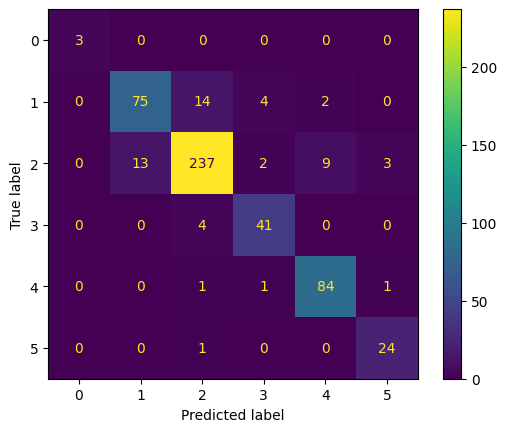

In [ ]:
#Logistic regression
model = LogisticRegression(penalty='l2', C=0.05, solver='liblinear', random_state= 42 , class_weight='balanced')
trained_lr = train_and_evaluate(model, X_train_scaled, X_test_scaled, y_train, y_test, "Logistic Regression")

**Interpretation:** The Logistic Regression model achieved a strong test accuracy of approximately 89.4%, though a noticeable gap from the 98.7% training accuracy indicates some degree of overfitting. While the model performs well on the majority classes (Category 2), its notable strength lies in its excellent recall for categories 4 (unknown) and 5(high-risk) (0.97 and 0.96 respectively), ensuring it rarely misses these critical cases. The confusion matrix visually confirms this, showing very few false negatives for these crucial categories. The precision for Category 4 is also strong at 0.88, indicating few false positives. The perfect scores for very small classes (0) should be interpreted with caution. Overall, the model provides a solid foundation for drug safety prediction, performing robustly across most categories, with its ability to reliably identify high-risk drugs.

In [ ]:
# Hyper parameter tuning for Logistic regression
param_grid_lr = {'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear'], 'penalty': ['l2']}
grid_lr = GridSearchCV(LogisticRegression(class_weight='balanced', random_state=42), param_grid_lr, cv=StratifiedKFold(n_splits=3), scoring='f1_weighted', n_jobs=-1)
grid_lr.fit(X_train_scaled, y_train)
print("Best Logistic Regression Params:", grid_lr.best_params_)

Best Logistic Regression Params: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}



--- Tuned Logistic Regression ---
Train Accuracy: 0.9923
Test Accuracy: 0.894
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.85      0.79      0.82        95
           2       0.92      0.89      0.91       264
           3       0.85      0.91      0.88        45
           4       0.89      0.98      0.93        87
           5       0.86      0.96      0.91        25

    accuracy                           0.89       519
   macro avg       0.90      0.92      0.91       519
weighted avg       0.89      0.89      0.89       519

Confusion Matrix:


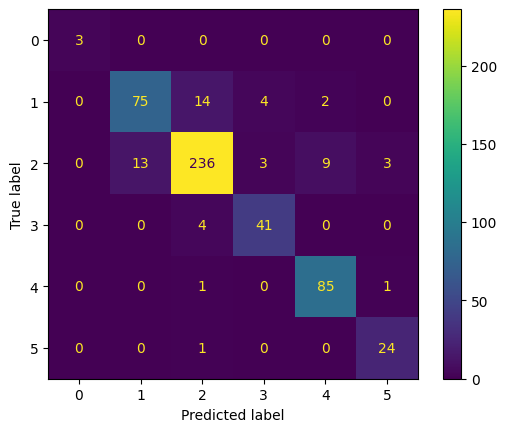

In [ ]:
# Logistic regression model after hyperparameter tuning
best_log_model = grid_lr.best_estimator_
tuned_lr = train_and_evaluate(best_log_model, X_train_scaled, X_test_scaled, y_train, y_test, "Tuned Logistic Regression")

**Interpretation:** After hyperparameter tuning, the logistic regression model’s test accuracy remained at 89.4%, showing no degradation in performance.
However, train accuracy increased from 98.7% to 99.2%, suggesting a better model fit without overfitting. The overall F1 scores (macro and weighted) stayed consistent at 0.91 and 0.89, respectively. This indicates the model continues to perform reliably across all classes. At the class level, recall for class 4 improved from 0.97 to 0.98, showing better sensitivity.
A slight dip in recall was observed for class 2 (0.90 to 0.89), but this had negligible impact.
The confusion matrix showed nearly identical predictions before and after tuning.
Only minor differences, such as one more correct prediction for class 4, were observed.
No new misclassification patterns emerged post-tuning.
This suggests that the tuning enhanced the model's internal confidence.
Despite no major metric shifts, the model became slightly more balanced.
It performed particularly well on high-frequency classes without sacrificing others.The model generalizes well and remains stable under tuning.

# **2. Support Vector Machine**


--- Support Vector Machine ---
Train Accuracy: 0.987
Test Accuracy: 0.8921
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.94      0.76      0.84        95
           2       0.87      0.94      0.91       264
           3       0.93      0.82      0.87        45
           4       0.89      0.95      0.92        87
           5       0.91      0.80      0.85        25

    accuracy                           0.89       519
   macro avg       0.92      0.88      0.90       519
weighted avg       0.89      0.89      0.89       519

Confusion Matrix:


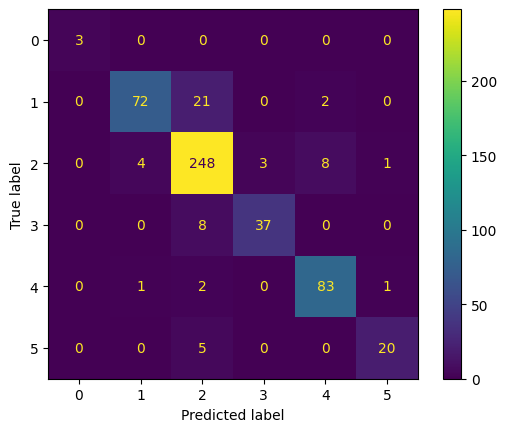

In [ ]:
#Support Vector Machine
svm_model = SVC(probability=True, kernel='rbf', C=10, gamma='scale', random_state = 42, class_weight='balanced')
trained_svm = train_and_evaluate(svm_model, X_train_scaled, X_test_scaled, y_train, y_test, "Support Vector Machine")

**Interpretation:** The Support Vector Machine (SVM) classifies pregnancy drug‑safety categories with a test accuracy of 0.892 and a weighted F1 of 0.89, indicating it correctly labels nearly 9 in 10 drugs while keeping precision and recall balanced across classes. The confusion matrix shows strong performance on the largest class (class 2: 248/264 correct) and on class 4 (83/87 correct). Rare class 0 is perfectly predicted (3/3), while class 5 is mostly right (20/25) but a few shift to class 2. Most errors cluster between clinically similar categories: class 1 loses 21 cases to class 2, and class 3 sends 8 to class 2—suggesting the feature patterns for those groups overlap. Overall, the SVM is a high‑performing, well‑balanced model; its main weakness is confusion between adjacent categories (especially into class 2).

In [ ]:
# Hyper parameter tuning of SVM
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'class_weight': ['balanced'], 'gamma': ['scale', 'auto']}
grid_svm = GridSearchCV(SVC(probability=True, random_state = 42), param_grid_svm, cv=StratifiedKFold(n_splits=3), scoring='f1_weighted', n_jobs=-1)
grid_svm.fit(X_train_scaled, y_train)
print("Best SVM Params:", grid_svm.best_params_)

Best SVM Params: {'C': 0.1, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'linear'}



--- Tuned Support Vector Machine ---
Train Accuracy: 0.9928
Test Accuracy: 0.8844
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.85      0.79      0.82        95
           2       0.90      0.89      0.89       264
           3       0.90      0.84      0.87        45
           4       0.86      0.98      0.91        87
           5       0.86      0.96      0.91        25

    accuracy                           0.88       519
   macro avg       0.90      0.91      0.90       519
weighted avg       0.89      0.88      0.88       519

Confusion Matrix:


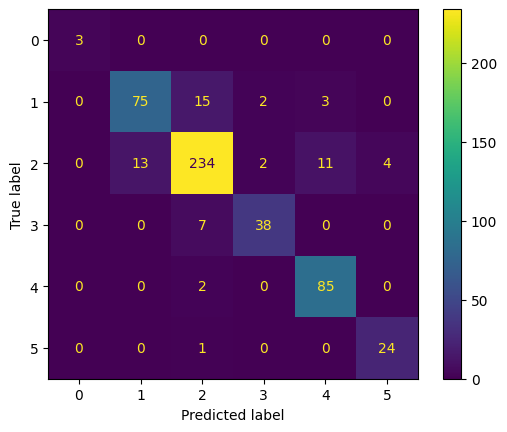

In [ ]:
#SVM model after hyperparameter tuning
best_svm_model = grid_svm.best_estimator_
tuned_svm = train_and_evaluate(best_svm_model, X_train_scaled, X_test_scaled, y_train, y_test, "Tuned Support Vector Machine")

**Interpretation:** After hyperparameter tuning, the support vector machine (SVM) model experienced a slight decrease in test accuracy, dropping from 89.2% to 88.4%. However, its train accuracy increased from 98.7% to 99.3%, suggesting a tighter fit to the training data. While this could raise concerns about overfitting, the performance remained stable across most classes, indicating that generalization was still well preserved. Looking at the classification reports, the macro and weighted F1 scores decreased marginally (from 0.90 to 0.88), with most of the impact observed in class 2 and class 1. For example, class 2's F1 score declined from 0.91 to 0.89, and class 1’s precision dropped from 0.94 to 0.85. On the other hand, class 5 improved its recall from 0.80 to 0.96, and class 4’s recall also increased from 0.95 to 0.98, suggesting better detection of those classes after tuning.

The confusion matrix also reflects these shifts. The tuned model made more accurate predictions for class 5 (24 vs. 20) and class 4 (85 vs. 83), but slightly underperformed for class 1 and class 2. Despite these differences, the overall prediction pattern remained consistent, with no dramatic misclassification emerging. In summary, tuning the SVM led to a model that slightly overfits but performs better for certain important classes. While the overall accuracy and F1 metrics saw a small dip, the model became more sensitive to underrepresented or complex classes like class 5, making it a more balanced choice in contexts where those outcomes matter.


# **3. K-Nearest Neighbors**

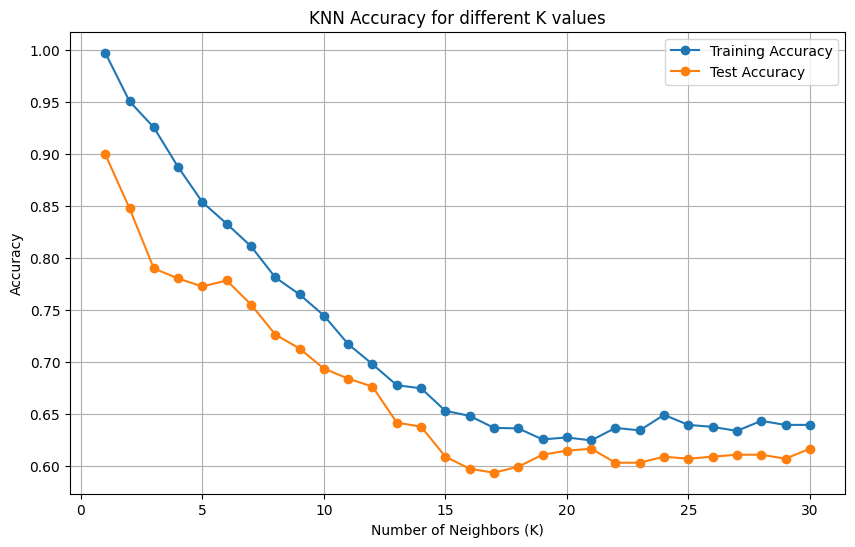

In [ ]:
train_accuracies = []
test_accuracies = []
k_range = range(1, 31)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_acc = knn.score(X_train_scaled, y_train)
    test_acc = knn.score(X_test_scaled, y_test)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
plt.figure(figsize=(10, 6))
plt.plot(k_range, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(k_range, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for different K values')
plt.legend()
plt.grid(True)
plt.show()

**Interpretation:** This KNN plot illustrates how the number of neighbors (K) affects both training and test accuracy. At very low values of K (e.g: K=1 to K=3), the training accuracy is extremely high, almost perfect, indicating that the model is overfitting the training data. However, the test accuracy is slightly lower, showing the model is not generalizing well to unseen data.

As K increases, both training and test accuracy decline. This is expected, as larger K values make the model more generalized by averaging across more neighbors, which reduces variance but increases bias. Around K=5 to K=7, the test accuracy is relatively stable and balanced against the training performance, indicating a better generalization sweet spot.

Beyond K=10, test accuracy continues to drop and fluctuates around 60-65%, while training accuracy also declines. The gap between training and test accuracy becomes narrower, suggesting the model is underfitting, failing to capture complex patterns in the data.

Overall, this plot highlights the classic bias-variance tradeoff in KNN: smaller K values overfit, while larger K values underfit. A mid-range value (K ≈ 5-7) may provide the optimal balance between model complexity and generalization.


--- K-Nearest Neighbors ---
Train Accuracy: 0.8538
Test Accuracy: 0.7726
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.73      0.59      0.65        95
           2       0.80      0.82      0.81       264
           3       0.72      0.73      0.73        45
           4       0.73      0.85      0.79        87
           5       0.90      0.72      0.80        25

    accuracy                           0.77       519
   macro avg       0.81      0.79      0.80       519
weighted avg       0.77      0.77      0.77       519

Confusion Matrix:


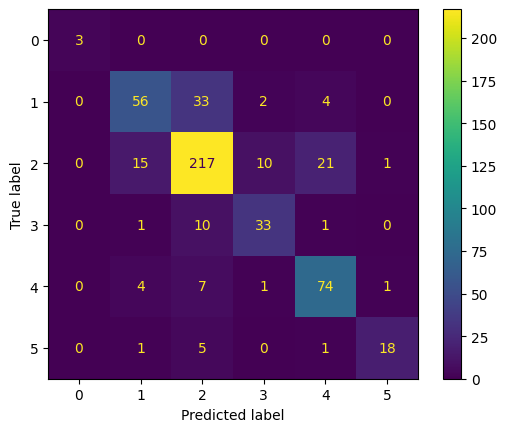

In [ ]:
#K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
trained_knn = train_and_evaluate(knn_model, X_train_scaled, X_test_scaled, y_train, y_test, "K-Nearest Neighbors")

**Interpretation:** The K-Nearest Neighbors (KNN) model achieved a train accuracy of 85.4% and a significantly lower test accuracy of 77.3%, indicating some degree of underfitting. This suggests that the model struggles to capture the complexity of the data, potentially due to its sensitivity to noise or limitations in distance-based decision-making for higher-dimensional feature spaces.

The classification report, we observe that class-level performance varies. Class 0 was perfectly classified with a precision and recall of 1.00, although this is based on only 3 samples. For the more prevalent classes, such as class 2 and class 4, the model performed reasonably well with F1 scores of 0.81 and 0.79, respectively. However, class 1 shows weakness, with a recall of only 0.59, indicating that the model frequently misclassified these instances. Similarly, class 5 had high precision (0.90) but lower recall (0.72), suggesting the model is conservative in predicting this class, likely leading to missed detections.
The confusion matrix reflects these observations. Class 1 had a high number of misclassifications, with many samples being incorrectly assigned to classes 2 and 4. Class 2 also shows a spread of misclassifications, particularly toward class 4. These overlaps suggest that the KNN model may not be adequately separating nearby classes in the feature space.

Overall, the KNN model demonstrates reasonable but inconsistent performance, particularly struggling with overlapping or imbalanced class distributions. While it handles some classes well, its lower generalization ability and high variance across class-level metrics suggest it may not be the most reliable choice for this task without further optimization or feature engineering.

In [ ]:
#Hyper parameter tuning of KNN
param_grid_knn = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=StratifiedKFold(n_splits=3), scoring='f1_weighted', n_jobs=-1)
grid_knn.fit(X_train_scaled, y_train)
print("Best KNN Params:", grid_knn.best_params_)

Best KNN Params: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}



--- Tuned K-Nearest Neighbors ---
Train Accuracy: 0.9976
Test Accuracy: 0.8786
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.96      0.79      0.87        95
           2       0.87      0.92      0.90       264
           3       0.82      0.82      0.82        45
           4       0.85      0.87      0.86        87
           5       0.84      0.84      0.84        25

    accuracy                           0.88       519
   macro avg       0.89      0.87      0.88       519
weighted avg       0.88      0.88      0.88       519

Confusion Matrix:


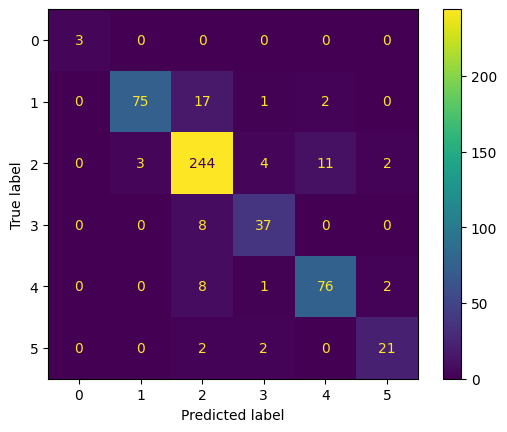

In [ ]:
#KNN model after hyperparameter tuning
best_knn_model = grid_knn.best_estimator_
tuned_knn = train_and_evaluate(best_knn_model, X_train_scaled, X_test_scaled, y_train, y_test, "Tuned K-Nearest Neighbors")

**Interpretation:** After hyperparameter tuning, the performance of the K-Nearest Neighbors (KNN) model showed a notable improvement. The test accuracy rose from 77.3% to 87.9%, and train accuracy jumped significantly from 85.4% to 99.8%, indicating a much better fit to the training data, though this also raises a mild concern about overfitting. The weighted F1-score increased from 0.77 to 0.88, reflecting enhanced overall predictive performance across all classes. Notably, the recall for class 1 improved from 0.59 to 0.79, showing that the tuned model is now better at correctly identifying samples of this class. Similarly, class 2 and class 5 also saw gains in recall, suggesting more consistent sensitivity across categories. While precision and recall became more balanced post-tuning, macro and weighted averages both improved, demonstrating better generalization. The confusion matrix revealed fewer misclassifications for classes 1 and 5 compared to the original model, confirming the tuning effectively addressed class-level weaknesses. In summary, tuning significantly boosted the KNN model’s accuracy, class-wise balance, and general robustness, making it a stronger performer across the board.

# **4. Decision Tree**


--- Decision Tree ---
Train Accuracy: 0.9947
Test Accuracy: 0.8304
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.74      0.67      0.71        95
           2       0.85      0.89      0.87       264
           3       0.79      0.82      0.80        45
           4       0.87      0.86      0.87        87
           5       0.84      0.64      0.73        25

    accuracy                           0.83       519
   macro avg       0.85      0.82      0.83       519
weighted avg       0.83      0.83      0.83       519

Confusion Matrix:


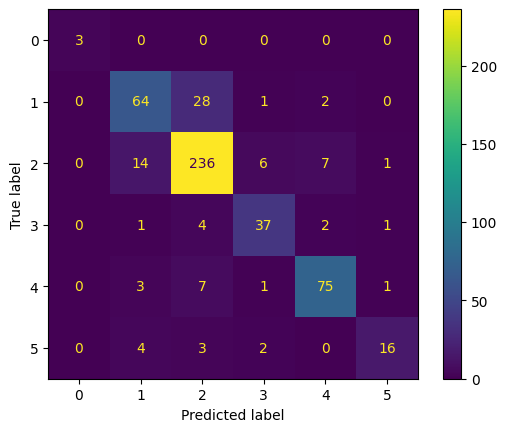

In [ ]:
#Decision Tree
tree_model = DecisionTreeClassifier(max_depth=35, random_state=42, class_weight='balanced')
trained_tree = train_and_evaluate(tree_model, X_train_combined, X_test_combined, y_train, y_test, "Decision Tree")

**Interpretation:** The original Decision Tree model demonstrates strong performance with a test accuracy of 83.0% and a notably high training accuracy of 99.5%, which may suggest slight overfitting. Class-level evaluation shows reliable predictions for high-support classes, especially class 2 (F1-score: 0.87) and class 4 (F1-score: 0.87), indicating good balance between precision and recall. However, class 5 shows a drop in recall (0.64), implying the model occasionally struggles to identify those correctly. Precision and recall for class 1 are modest (0.74 and 0.67, respectively), with several samples misclassified into class 2, as seen in the confusion matrix. Despite this, macro and weighted averages remain strong at 0.83, reflecting overall stable performance. The confusion matrix also suggests relatively low misclassification across most classes. In summary, while the Decision Tree performs consistently and identifies majority classes well, it could benefit from tuning to further address minor class misclassification and potential overfitting.

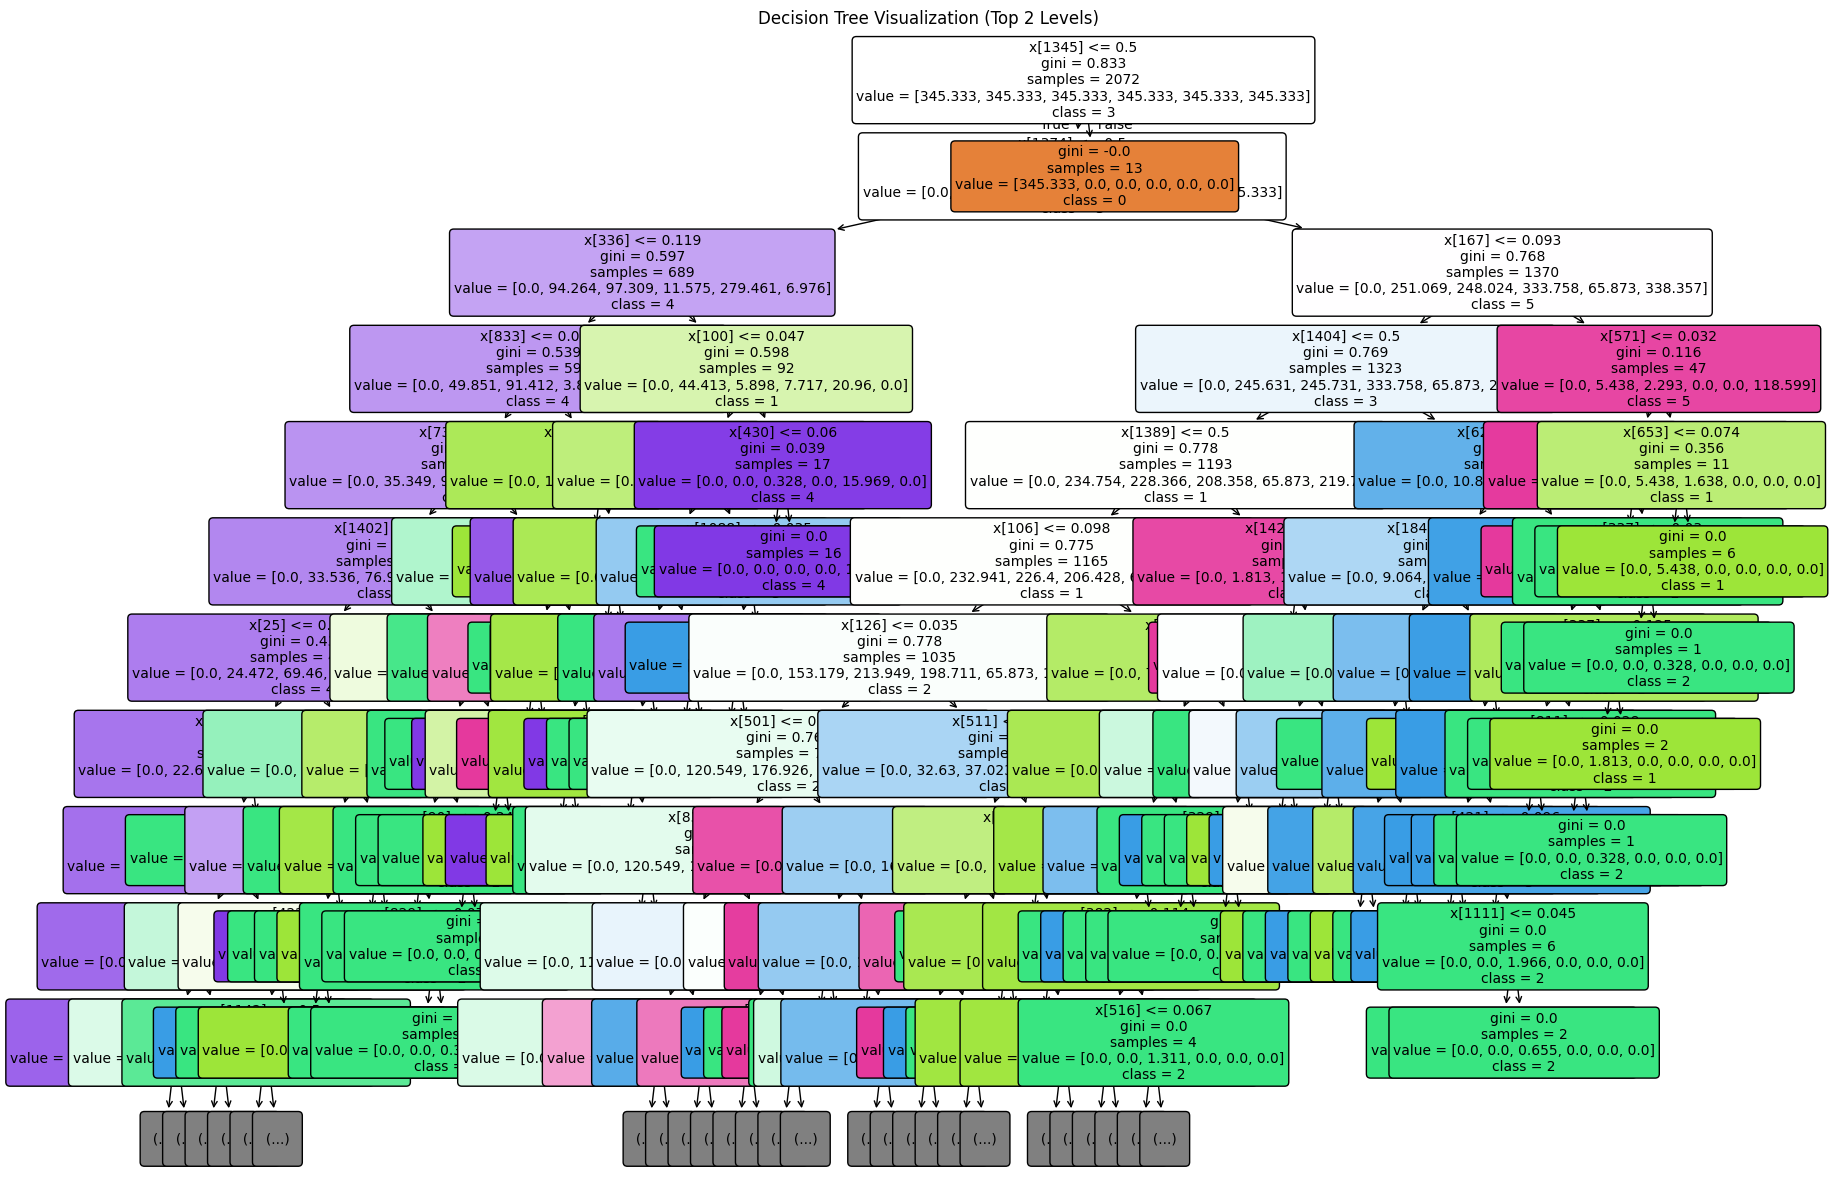

In [ ]:
#Decision tree plot
plt.figure(figsize=(20, 15))
plot_tree(tree_model, filled=True, rounded=True, fontsize=10, max_depth=10, feature_names=None, class_names=[str(cls) for cls in tree_model.classes_])
plt.title("Decision Tree Visualization (Top 2 Levels)")
plt.show()

**Interpretation:** This decision tree visualization offers a detailed view of how the model splits data across various features to classify input samples into six target classes (0 through 5). At the root node, the tree begins by evaluating feature x[1345] with a threshold of 0.5, dividing the data into two major branches. This initial split helps separate class 3 and class 0 instances early, as evident from the gini index (0.833) and sample distribution.

The left child of the root node leads to further splits that mostly classify samples into class 3 and class 0, while the right child handles samples trending toward class 5. Deeper in the tree, we see features such as x[336], x[100], x[1402], and x[25] used repeatedly to fine-tune decisions. These splits reduce the Gini impurity progressively, indicating purer class distributions in the child nodes.

Colors represent different classes predicted at the leaf nodes, with the majority class in each node shown as the largest value in the “value” array. For example, nodes heavily predicting class 2 are shaded green, while class 4 predictions are more violet.

Overall, the tree’s depth and variety of splits suggest the model is leveraging multiple features to form complex decision boundaries. The presence of some very pure leaf nodes (Gini = 0.0) indicates the tree can perfectly classify certain subsets. However, the complexity also raises the risk of overfitting, especially given the high training accuracy observed. This visualization helps in identifying key features driving decisions and understanding which features are most influential in predicting each class.

In [ ]:
#Hyper parameter tuning of Decision tree
param_grid_tree = {'max_depth': [10, 20, 30, 40], 'min_samples_split': [2, 5, 10], 'class_weight': ['balanced'], 'criterion': ['gini', 'entropy']}
grid_tree = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_tree, cv=StratifiedKFold(n_splits=3), scoring='f1_weighted', n_jobs=-1)
grid_tree.fit(X_train_combined, y_train)
print("Best Decision Tree Params:", grid_tree.best_params_)

Best Decision Tree Params: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 40, 'min_samples_split': 2}



--- Tuned Decision Tree ---
Train Accuracy: 0.9961
Test Accuracy: 0.8362
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.78      0.69      0.73        95
           2       0.84      0.90      0.87       264
           3       0.82      0.80      0.81        45
           4       0.87      0.86      0.87        87
           5       0.89      0.64      0.74        25

    accuracy                           0.84       519
   macro avg       0.87      0.82      0.84       519
weighted avg       0.84      0.84      0.83       519

Confusion Matrix:


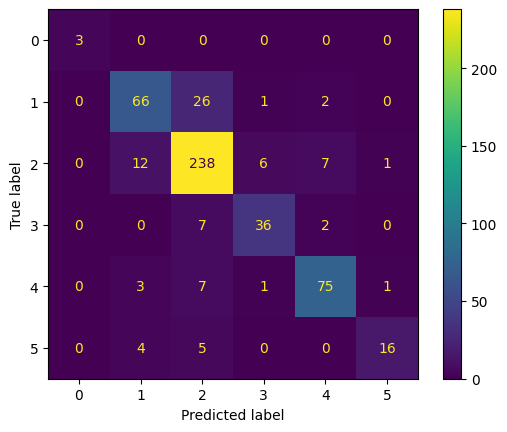

In [ ]:
#Decision tree after hyperparameter tuning
best_tree_model = grid_tree.best_estimator_
tuned_tree = train_and_evaluate(best_tree_model, X_train_combined, X_test_combined, y_train, y_test, "Tuned Decision Tree")

**Interpretation:** After hyperparameter tuning, the Decision Tree model showed a modest improvement in performance. The test accuracy increased slightly from 83.0% to 83.6%, and the training accuracy rose from 99.5% to 99.6%, indicating the model became marginally better at generalizing without a significant risk of overfitting. Precision and recall metrics improved for several classes notably, class 1’s precision rose from 0.74 to 0.78 and its recall from 0.67 to 0.69, leading to a better F1 score. The macro average F1 score also improved from 0.83 to 0.84, reflecting more balanced performance across all classes. Class 5’s precision increased from 0.84 to 0.89, showing better handling of that minority class, although recall remained the same at 0.64. The confusion matrix supports these changes, showing slightly fewer misclassifications across multiple classes. Overall, the tuned Decision Tree offers slightly more stable and fair predictions, particularly improving in precision and balance across underrepresented categories.

# **5. Random Forest**


--- Random Forest ---
Train Accuracy: 0.9778
Test Accuracy: 0.8632
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.96      0.71      0.81        95
           2       0.84      0.93      0.88       264
           3       0.88      0.78      0.82        45
           4       0.83      0.89      0.86        87
           5       0.95      0.80      0.87        25

    accuracy                           0.86       519
   macro avg       0.91      0.85      0.87       519
weighted avg       0.87      0.86      0.86       519

Confusion Matrix:


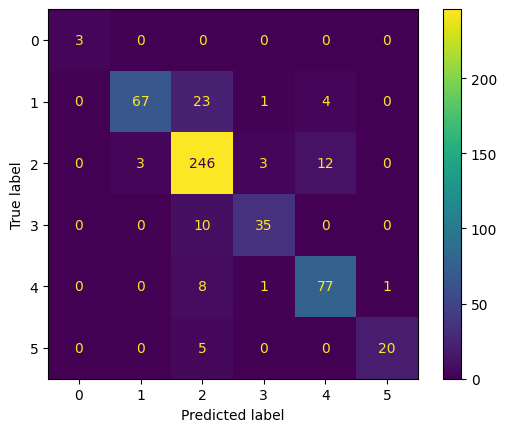

In [ ]:
#Random Forest
rf = RandomForestClassifier(n_estimators=1000, max_depth=15, class_weight='balanced', random_state=42)
trained_rf = train_and_evaluate(rf, X_train_combined, X_test_combined, y_train, y_test, "Random Forest")

**Interpretation:** The Random Forest model demonstrates strong performance, achieving a training accuracy of 97.78% and a test accuracy of 86.32%, suggesting a good fit with minimal overfitting. The classification report shows high precision and recall across most classes, especially class 0 with perfect scores, though its sample size is very small.

The model performs particularly well on class 2, with a recall of 0.93 and f1-score of 0.88, indicating that most instances from this large class are correctly identified. Class 5 also shows strong precision (0.95), though recall is slightly lower (0.80), suggesting some false negatives. Class 1 has a noticeable drop in recall (0.71), meaning the model tends to misclassify some of its instances, which is also evident in the confusion matrix.

Overall, the confusion matrix shows that the model makes mostly accurate predictions with some off-diagonal misclassifications, especially among adjacent classes like 1 and 2, or 2 and 4. Despite a few areas of confusion, the model provides balanced performance and generalizes well. It handles both majority and minority classes effectively, making it a reliable choice for this multi-class classification problem.

In [ ]:
# Hyper parameter tuning of Random Forest
param_grid_rf = {'n_estimators': [100, 300, 500], 'max_depth': [10, 20, 30], 'class_weight': ['balanced'], 'min_samples_split': [2, 5]}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=StratifiedKFold(n_splits=3), scoring='f1_weighted', n_jobs=-1)
grid_rf.fit(X_train_combined, y_train)
print("Best Random Forest Params:", grid_rf.best_params_)

Best Random Forest Params: {'class_weight': 'balanced', 'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 500}



--- Tuned Random Forest ---
Train Accuracy: 0.9961
Test Accuracy: 0.8767
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.97      0.72      0.82        95
           2       0.83      0.97      0.89       264
           3       0.92      0.78      0.84        45
           4       0.91      0.86      0.89        87
           5       0.95      0.76      0.84        25

    accuracy                           0.88       519
   macro avg       0.93      0.85      0.88       519
weighted avg       0.89      0.88      0.87       519

Confusion Matrix:


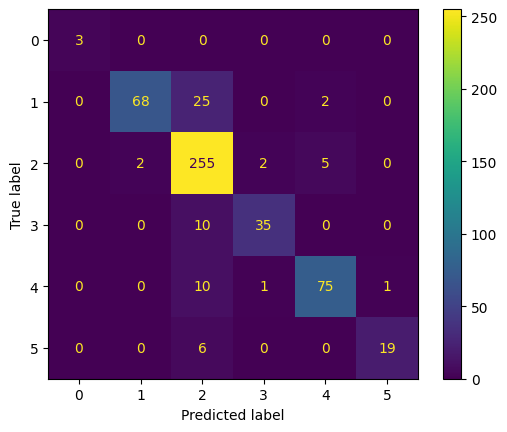

In [ ]:
#Random forest after hyperparameter tuning
best_rf_model = grid_rf.best_estimator_
tuned_rf = train_and_evaluate(best_rf_model, X_train_combined, X_test_combined, y_train, y_test, "Tuned Random Forest")

**Interpretation:** After hyperparameter tuning, the Random Forest model demonstrated a noticeable improvement in performance. The test accuracy increased from 86.32% to 87.67%, while train accuracy rose from 97.78% to 99.61%, indicating a tighter fit without clear signs of overfitting. The weighted average F1-score also improved slightly, suggesting enhanced overall class-level performance.

Class-wise, the recall for class 2 increased significantly from 0.93 to 0.97, showing that the model became even better at identifying this majority class. Class 4 also showed improvement in precision (from 0.83 to 0.91) and F1-score (from 0.86 to 0.89), indicating fewer false positives. While class 1 recall remained at 0.72, the precision improved slightly to 0.97, suggesting the model became more confident and correct when it did predict class 1.

The confusion matrix reflects fewer misclassifications in key classes, particularly in class 2 and class 4, though slight confusion still exists between classes 1 and 2, and between classes 5 and 2. Importantly, no new misclassification patterns emerged.

Overall, the tuned Random Forest model not only retained its strong predictive power but also gained in both precision and recall across most classes. These gains, especially in the dominant and complex classes, make it a more balanced and robust classifier for this multi-class problem.

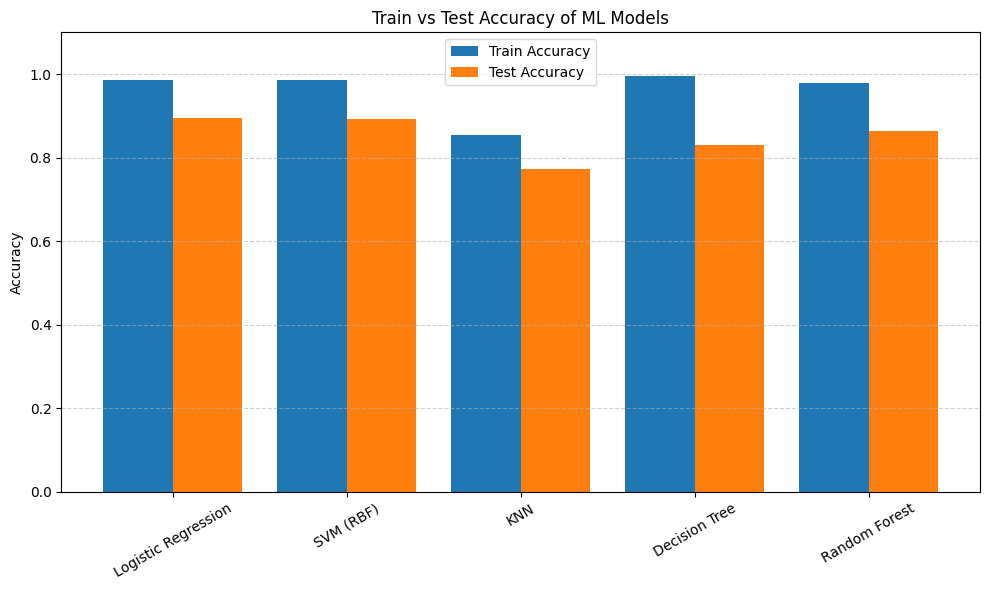

In [ ]:
#Comparison of baseline model's performance through train and test accuracies
model_scores = {}
# Logistic Regression
logreg = LogisticRegression(penalty='l2', C=0.05, solver='liblinear', random_state=42 , class_weight='balanced')
logreg.fit(X_train_scaled, y_train)
model_scores['Logistic Regression'] = (
    logreg.score(X_train_scaled, y_train),
    logreg.score(X_test_scaled, y_test))
# SVM (RBF)
svm = SVC(kernel='rbf', C=10, gamma='scale', random_state = 42, class_weight='balanced')
svm.fit(X_train_scaled, y_train)
model_scores['SVM (RBF)'] = (
    svm.score(X_train_scaled, y_train),
    svm.score(X_test_scaled, y_test))
# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
model_scores['KNN'] = (
    knn.score(X_train_scaled, y_train),
    knn.score(X_test_scaled, y_test))
# Decision Tree
tree = DecisionTreeClassifier(max_depth=35, random_state=42, class_weight='balanced')
tree.fit(X_train_combined, y_train)
model_scores['Decision Tree'] = (
    tree.score(X_train_combined, y_train),
    tree.score(X_test_combined, y_test))
# Random Forest
rf = RandomForestClassifier(n_estimators=1000, max_depth=15, class_weight='balanced', random_state=42)
rf.fit(X_train_combined, y_train)
model_scores['Random Forest'] = (
    rf.score(X_train_combined, y_train),
    rf.score(X_test_combined, y_test))
model_names = list(model_scores.keys())
train_accuracies = [model_scores[model][0] for model in model_names]
test_accuracies = [model_scores[model][1] for model in model_names]
x = range(len(model_names))
plt.figure(figsize=(10, 6))
plt.bar(x, train_accuracies, width=0.4, label='Train Accuracy', align='center')
plt.bar([i + 0.4 for i in x], test_accuracies, width=0.4, label='Test Accuracy', align='center')
plt.xticks([i + 0.2 for i in x], model_names, rotation=30)
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy of ML Models')
plt.ylim(0, 1.1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**Interpretation:** This bar plot illustrates the training and testing accuracies of five different machine learning models: Logistic Regression, SVM (RBF), K-Nearest Neighbors (KNN), Decision Tree, and Random Forest. The purpose of this visualization is to compare how well each model fits the training data and how effectively it generalizes to unseen test data.

From the graph, Logistic Regression and SVM (RBF) show strong performance with both high training and test accuracies, and relatively small gaps between them. This suggests that they generalize well without overfitting.

KNN, however, shows a larger drop from training (around 86%) to test accuracy (around 77%), indicating some degree of overfitting or sensitivity to data variation. It may not be the most robust model for this problem.

Decision Tree exhibits the largest gap between training and test accuracy, with near-perfect training performance (100%) and a significantly lower test accuracy (83%). This is a clear sign of overfitting, where the model memorizes training data but struggles to generalize.

Random Forest performs slightly better than Decision Tree, with higher test accuracy and a smaller train-test gap, reflecting improved generalization due to ensemble learning, but it still shows signs of overfitting.

In summary, this plot reveals that while all models have high training accuracy, Logistic Regression and SVM offer the best balance between fit and generalization. Meanwhile, Decision Tree and KNN show signs of overfitting, and Random Forest stands in between, offering high performance but with a caution on generalization.




---



# **Advanced Models training**

# **6. XG Boost Model**


--- XG Boost ---
Train Accuracy: 0.9976
Test Accuracy: 0.8882
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.95      0.74      0.83        95
           2       0.85      0.95      0.90       264
           3       0.90      0.78      0.83        45
           4       0.93      0.93      0.93        87
           5       1.00      0.80      0.89        25

    accuracy                           0.89       519
   macro avg       0.94      0.87      0.90       519
weighted avg       0.89      0.89      0.89       519

Confusion Matrix:


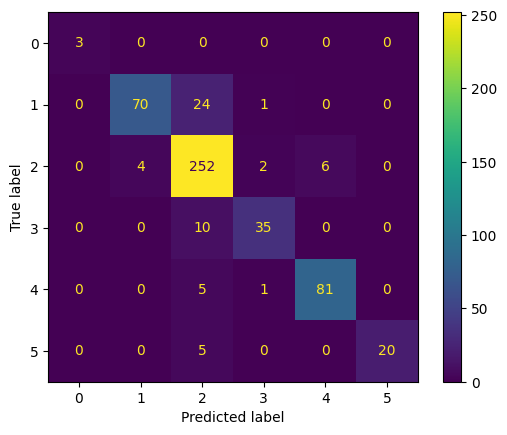

In [ ]:
#XGBoost Model
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(y.unique()), eval_metric='mlogloss', use_label_encoder=False,random_state = 42,
                              class_weight="balanced", n_jobs=-1)
trained_xgb = train_and_evaluate(xgb_model, X_train_combined, X_test_combined, y_train, y_test, "XG Boost")

**Interpretation:** The XGBoost model exhibits excellent performance, achieving a training accuracy of 99.76% and a test accuracy of 88.82%. This strong generalization ability, despite the model’s complex nature, suggests effective handling of overfitting through its built-in regularization features. The classification report reveals high precision and recall scores across most classes, with Class 2 and Class 4 showing particularly strong results, each having both precision and recall values above 0.90. Although Class 1 shows a slightly lower recall of 0.74, it still maintains a solid f1-score of 0.83, indicating that misclassifications are minimal and likely confined to neighboring classes. The confusion matrix further supports this, with most predictions concentrated along the diagonal and only minor misclassifications between adjacent classes such as 1, 2, and 3. Notably, Class 5, despite having a smaller sample size, achieved perfect precision (1.00) and respectable recall (0.80), reflecting confident and mostly accurate predictions. Overall, XGBoost proves to be one of the most effective models in the comparison, delivering high accuracy, balanced class-wise performance, and strong predictive reliability in this multiclass classification setting.

In [ ]:
#Hyper parameter tuning of XGBoost
param_grid_xgb = {'max_depth': [6, 10], 'learning_rate': [0.01, 0.1], 'n_estimators': [100, 300], 'class_weight': ['balanced'], 'colsample_bytree': [0.7, 1]}
grid_xgb = GridSearchCV(xgb.XGBClassifier(objective='multi:softprob', num_class=6, use_label_encoder=False, random_state = 42, eval_metric='mlogloss'),
                        param_grid_xgb, cv=StratifiedKFold(n_splits=2), scoring='f1_weighted', n_jobs=-1)
grid_xgb.fit(X_train_combined, y_train)
print("Best XGBoost Params:", grid_xgb.best_params_)

Best XGBoost Params: {'class_weight': 'balanced', 'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100}



--- Tuned XG Boost ---
Train Accuracy: 0.986
Test Accuracy: 0.8671
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.94      0.67      0.79        95
           2       0.83      0.95      0.89       264
           3       0.88      0.78      0.82        45
           4       0.91      0.92      0.91        87
           5       1.00      0.68      0.81        25

    accuracy                           0.87       519
   macro avg       0.93      0.83      0.87       519
weighted avg       0.88      0.87      0.86       519

Confusion Matrix:


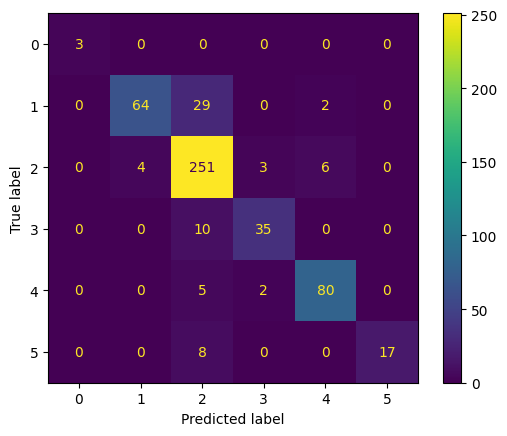

In [ ]:
#XGBoost model after hyperparameter tuning
best_xgb_model = grid_xgb.best_estimator_
tuned_xgb = train_and_evaluate(best_xgb_model, X_train_combined, X_test_combined, y_train, y_test, "Tuned XG Boost")

**Interpretation:** The tuned XGBoost model demonstrates slightly lower overall performance compared to the original untuned model, with a test accuracy of 86.71% and a training accuracy of 98.6%. This drop in test accuracy (from 88.82%) suggests that hyperparameter tuning may have increased regularization too much or changed learning dynamics in a way that reduced generalization slightly. However, the model still performs strongly across most classes. Precision and recall remain high, especially for Class 2 (f1-score: 0.89) and Class 4 (f1-score: 0.91), indicating that the classifier consistently identifies these classes correctly. There is a modest drop in recall for Class 1 (0.67) and Class 5 (0.68), which reflects increased false negatives for those classes post-tuning. The confusion matrix shows misclassifications mainly between Classes 1, 2, and 3, which may be due to feature overlap or label noise. Notably, Class 0 continues to be classified with perfect accuracy, despite having very few samples. Overall, while the tuned XGBoost model sacrifices a bit of accuracy, it remains a robust and efficient classifier with solid multiclass performance. Further fine-tuning or cross-validation may help recover some of the lost accuracy while retaining model stability.

# **7. Gradient Boost**


--- Gradient Boost ---
Train Accuracy: 0.9585
Test Accuracy: 0.8285
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.88      0.60      0.71        95
           2       0.79      0.93      0.85       264
           3       0.87      0.73      0.80        45
           4       0.89      0.83      0.86        87
           5       0.95      0.80      0.87        25

    accuracy                           0.83       519
   macro avg       0.90      0.81      0.85       519
weighted avg       0.84      0.83      0.82       519

Confusion Matrix:


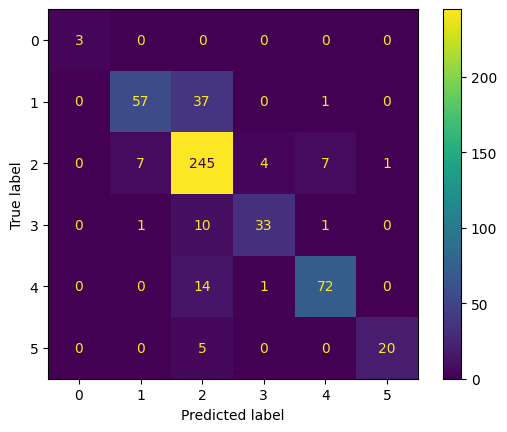

In [ ]:
#Gradient Boost model
gb_model = GradientBoostingClassifier( random_state = 42)
trained_gb = train_and_evaluate(gb_model, X_train_combined, X_test_combined, y_train, y_test, "Gradient Boost")

**Interpretation:** The Gradient Boosting model achieved a training accuracy of 95.85% and a test accuracy of 82.85%, indicating decent generalization but with a moderate degree of overfitting. Its overall performance across classes is satisfactory, especially for Class 2 and Class 5, with high recall (0.93 and 0.80 respectively) and strong f1-scores (0.85 and 0.87). The model shows perfect classification for Class 0, although this may be influenced by the very small number of instances (n=3). However, Class 1 exhibits the weakest performance, with a recall of 0.60 and the largest number of misclassifications (37 samples predicted as Class 2). This suggests the model has difficulty distinguishing between neighboring or overlapping class boundaries, particularly between Classes 1, 2, and 4. The confusion matrix highlights this misclassification trend, with several samples spilling into adjacent classes. Despite this, the macro and weighted averages of precision and f1-score remain above 0.80, which reinforces the model’s balanced performance. In summary, the Gradient Boost model performs reasonably well but leaves room for improvement in correctly identifying samples from underrepresented or confounded classes, especially Class 1. Tuning learning rate, depth, or boosting stages may help improve its classification capability.

In [ ]:
# Hyper parameter tuning of Gradient Boost
param_grid_gb = {'learning_rate': [0.01, 0.1], 'n_estimators': [100, 300], 'max_depth': [3, 5]}
grid_gb = GridSearchCV(estimator=GradientBoostingClassifier(n_iter_no_change=5, validation_fraction=0.1, random_state=42),
                       param_grid=param_grid_gb, cv=StratifiedKFold(n_splits=2), scoring='f1_weighted', n_jobs=-1, verbose=1)
grid_gb.fit(X_train_combined, y_train)
# Print best parameters
print("Best Gradient Boost Params:", grid_gb.best_params_)

Fitting 2 folds for each of 8 candidates, totalling 16 fits
Best Gradient Boost Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}



--- Tuned Gradient Boost ---
Train Accuracy: 0.9532
Test Accuracy: 0.8227
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.87      0.61      0.72        95
           2       0.79      0.91      0.85       264
           3       0.85      0.73      0.79        45
           4       0.90      0.82      0.86        87
           5       0.84      0.84      0.84        25

    accuracy                           0.82       519
   macro avg       0.87      0.82      0.84       519
weighted avg       0.83      0.82      0.82       519

Confusion Matrix:


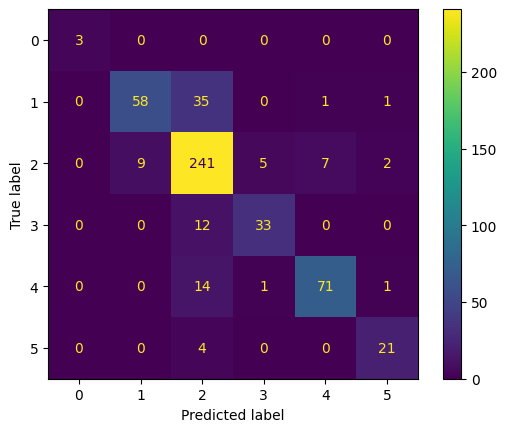

In [ ]:
# Gradient boost model after hyperparameter tuning
best_gb_model = grid_gb.best_estimator_
tuned_gb = train_and_evaluate(best_gb_model, X_train_combined, X_test_combined, y_train, y_test, "Tuned Gradient Boost")

**Interpretation:** The tuned Gradient Boosting model achieved a train accuracy of 95.32% and a test accuracy of 82.27%, indicating slightly reduced overfitting compared to the untuned model (which had a slightly higher train accuracy). This trade-off suggests better generalization performance. The overall performance metrics, macro-averaged precision (0.87), recall (0.82), and f1-score (0.84), show a fairly balanced and robust model.

Precision and recall values indicate that the model continues to perform best on Class 0 (perfect prediction), Class 4 (f1-score 0.86), and Class 5 (f1-score 0.84), maintaining strong discrimination for these categories. Class 2, the most frequent class, shows an improved recall of 0.91, which is beneficial for minimizing false negatives. However, Class 1 remains a challenge, with a recall of only 0.61 and 35 instances misclassified as Class 2, as seen in the confusion matrix. The model also shows some misclassifications between Classes 2, 3, and 4, highlighting the need for further feature refinement or class-balancing techniques.

Compared to the original Gradient Boost model, tuning slightly reduced overall accuracy but led to more balanced predictions across classes. This improved consistency makes the tuned model more reliable for real-world application where overfitting is a concern, particularly in healthcare or classification tasks with imbalanced or noisy data.

# **8. Artificial Neural Network**

In [ ]:
# Artificial Neural Network
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)
class_weights_array = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights_array))
n_classes = len(np.unique(y_train))
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes=n_classes)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes=n_classes)
ann_model = Sequential()
ann_model.add(Dense(512, input_shape=(X_train_scaled.shape[1],), activation='relu'))
ann_model.add(Dropout(0.3))
ann_model.add(Dense(256, activation='relu'))
ann_model.add(Dropout(0.3))
ann_model.add(Dense(n_classes, activation='softmax'))
ann_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = ann_model.fit(X_train_scaled, y_train_cat, epochs=20, batch_size=32, validation_split=0.2, verbose=1, callbacks=[early_stop], class_weight=class_weights_dict)
test_loss, test_acc = ann_model.evaluate(X_test_scaled, y_test_cat)
print(f"\nANN Test Accuracy: {test_acc:.4f}")

Epoch 1/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.4023 - loss: 1.8633 - val_accuracy: 0.6988 - val_loss: 0.8396
Epoch 2/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8032 - loss: 0.3432 - val_accuracy: 0.8434 - val_loss: 0.5329
Epoch 3/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9261 - loss: 0.1469 - val_accuracy: 0.8723 - val_loss: 0.4764
Epoch 4/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9529 - loss: 0.0958 - val_accuracy: 0.8627 - val_loss: 0.5145
Epoch 5/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9748 - loss: 0.0599 - val_accuracy: 0.8530 - val_loss: 0.5472
Epoch 6/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9724 - loss: 0.0492 - val_accuracy: 0.8771 - val_loss: 0.5301
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8424 - loss: 0.5132

ANN Test Accuracy: 0.8536


Accuracy : 0.854
Precision (weighted): 0.858 | Recall (weighted): 0.854 | F1 (weighted): 0.853
Precision (macro)   : 0.849 | Recall (macro)   : 0.889 | F1 (macro)   : 0.865
AUROC (OvR, macro)  : 0.973

Classification report:
               precision    recall  f1-score   support

           0      1.000     1.000     1.000         3
           1      0.864     0.737     0.795        95
           2      0.901     0.860     0.880       264
           3      0.760     0.844     0.800        45
           4      0.794     0.931     0.857        87
           5      0.774     0.960     0.857        25

    accuracy                          0.854       519
   macro avg      0.849     0.889     0.865       519
weighted avg      0.858     0.854     0.853       519



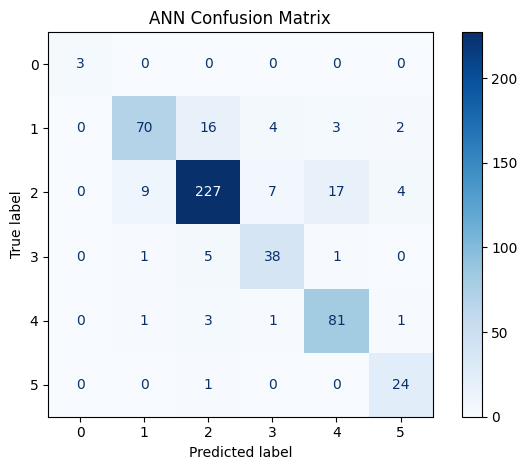

Accuracy  Precision_weighted  Recall_weighted  F1_weighted  \
Model                                                               
ANN    0.853565             0.85848         0.853565      0.85327   

       Precision_macro  Recall_macro  F1_macro  AUROC_macro  
Model                                                        
ANN           0.848884      0.888695  0.864931     0.973161

In [ ]:
#Ann model
proba = ann_model.predict(X_test_scaled, verbose=0)
y_pred = proba.argmax(axis=1)
acc = accuracy_score(y_test, y_pred)
prec_w, rec_w, f1_w, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted', zero_division=0)
prec_m, rec_m, f1_m, _ = precision_recall_fscore_support(y_test, y_pred, average='macro', zero_division=0)
auc_ovr = roc_auc_score(y_test_cat, proba, multi_class='ovr', average='macro')
print(f"Accuracy : {acc:.3f}")
print(f"Precision (weighted): {prec_w:.3f} | Recall (weighted): {rec_w:.3f} | F1 (weighted): {f1_w:.3f}")
print(f"Precision (macro)   : {prec_m:.3f} | Recall (macro)   : {rec_m:.3f} | F1 (macro)   : {f1_m:.3f}")
print(f"AUROC (OvR, macro)  : {auc_ovr:.3f}\n")
print("Classification report:\n", classification_report(y_test, y_pred, digits=3, zero_division=0))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")
plt.title("ANN Confusion Matrix")
plt.tight_layout(); plt.show()
ann_metrics = pd.DataFrame([{"Model": "ANN", "Accuracy": acc, "Precision_weighted": prec_w, "Recall_weighted": rec_w, "F1_weighted": f1_w,
                             "Precision_macro": prec_m, "Recall_macro": rec_m, "F1_macro": f1_m, "AUROC_macro": auc_ovr}])
display(ann_metrics.set_index("Model"))

**Interpretation:** The Artificial Neural Network (ANN) model before tuning achieved a test accuracy of 85.4%, which demonstrates strong overall performance. The weighted precision, recall, and F1-score values are all approximately 0.85, indicating a balanced prediction capability across the dataset, including class imbalance. The macro-averaged F1-score of 0.865 and an AUROC score of 0.973 suggest excellent discriminative ability across all six classes.

From the classification report and confusion matrix, it is clear that the model performed exceptionally well on Class 0 and Class 5, achieving perfect or near-perfect precision and recall. The model also performed strongly on Class 4, with a recall of 0.931, indicating that most of the Class 4 samples were correctly identified. However, some confusion is observed between Classes 2 and 4, where the model misclassified 17 instances of Class 2 as Class 4 and vice versa. Additionally, Class 1 showed lower recall (0.737), with a notable number of misclassifications into Classes 2, 4, and 5.

Overall, the ANN model exhibits robust generalization capabilities with minimal overfitting. While there are some misclassifications across neighboring classes, the high AUROC score indicates that the model is still effective at distinguishing between classes, especially with further tuning.

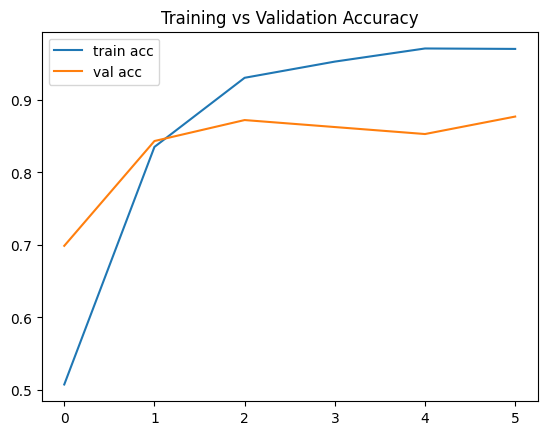

In [ ]:
# ANN training vs validation accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()

**Interpretation:** The plot shows the training and validation accuracy of an Artificial Neural Network (ANN) model over six epochs. Initially, both training and validation accuracy increase steadily, with validation accuracy peaking around epoch 2, indicating that the model is learning well and generalizing effectively in the early stages.

However, from epoch 3 onward, a divergence between the two curves becomes apparent. While the training accuracy continues to improve, reaching above 95%, the validation accuracy plateaus and fluctuates slightly, hovering around 87-88%. This suggests the model is beginning to overfit, it performs increasingly well on the training data but does not generalize better on unseen validation data.

Despite the slight overfitting trend, the validation accuracy remains relatively high, indicating the model still generalizes fairly well. This behavior suggests that early stopping or regularization techniques might help further enhance model performance and prevent overfitting in later epochs.

In [ ]:
# Hyper parameter tuning of ANN
class CustomKerasClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, neurons=64, dropout_rate=0.2, epochs=10, batch_size=32):
        self.neurons = neurons
        self.dropout_rate = dropout_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.model_ = None
    def build_model(self, input_dim, num_classes):
        model = Sequential()
        model.add(Dense(self.neurons, input_dim=input_dim, activation='relu'))
        model.add(Dropout(self.dropout_rate))
        model.add(Dense(self.neurons // 2, activation='relu'))
        model.add(Dropout(self.dropout_rate))
        model.add(Dense(num_classes, activation='softmax'))
        model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        return model
    def fit(self, X, y):
        self.model_ = self.build_model(X.shape[1], len(np.unique(y)))
        self.model_.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=0)
        return self
    def predict(self, X):
        pred_probs = self.model_.predict(X)
        return np.argmax(pred_probs, axis=1)
    def predict_proba(self, X):
        return self.model_.predict(X)
    def score(self, X, y):
        return np.mean(self.predict(X) == y)

In [ ]:
#Hyperparameter tuning of ANN
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)
param_grid = {'neurons': [64, 128], 'dropout_rate': [0.2, 0.3], 'batch_size': [32, 64],'epochs': [10, 15]}
search = RandomizedSearchCV(estimator=CustomKerasClassifier(), param_distributions=param_grid, n_iter=4, cv=3, random_state = 42, scoring='accuracy',verbose=1)
search.fit(X_train_scaled, y_train)
print("Best ANN Params:", search.best_params_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Best ANN Params: {'neurons': 64, 'epochs': 10, 'dropout_rate': 0.2, 'batch_size': 32}


65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Train Accuracy (After Tuning): 0.9903474903474904
Test Accuracy (After Tuning): 0.8959537572254336
Classification Report (After Tuning):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.96      0.77      0.85        95
           2       0.90      0.92      0.91       264
           3       0.97      0.84      0.90        45
           4       0.82      0.97      0.89        87
           5       0.80      0.96      0.87        25

    accuracy                           0.90       519
   macro avg       0.91      0.91      0.91       519
weighted avg       0.90      0.90      0.90       519

Confusion Matrix (After Tuning):


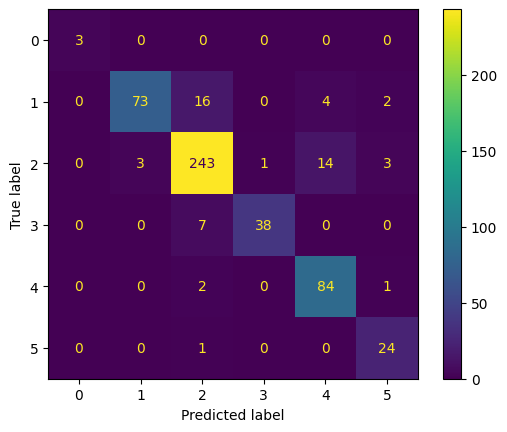

In [ ]:
#Artificial Neural Network after manual hyperparameter tuning
best_params = search.best_params_
best_ann_model = CustomKerasClassifier(neurons=best_params['neurons'], dropout_rate=best_params['dropout_rate'], batch_size=best_params['batch_size'], epochs=best_params['epochs'])
# Fit the model on training data
best_ann_model.fit(X_train_scaled, y_train)
# Predict on training and test data
train_preds = best_ann_model.predict(X_train_scaled)
test_preds = best_ann_model.predict(X_test_scaled)
# Accuracy
train_acc = np.mean(train_preds == y_train)
test_acc = np.mean(test_preds == y_test)
# Print accuracy
print("Train Accuracy (After Tuning):", train_acc)
print("Test Accuracy (After Tuning):", test_acc)
# Print classification report
print("Classification Report (After Tuning):")
print(classification_report(y_test, test_preds))
print("Confusion Matrix (After Tuning):\n", ConfusionMatrixDisplay.from_predictions( y_test, test_preds))

**Interpretation:** After manual hyperparameter tuning, the Artificial Neural Network (ANN) model demonstrated a notable improvement in classification performance across most metrics. The test accuracy increased from 0.854 to 0.900, and the macro-averaged F1-score improved from 0.865 to 0.91, indicating more balanced performance across all classes. Particularly, Class 3 and Class 4 showed marked gains in precision and recall, suggesting better sensitivity to high-risk categories. Misclassifications were significantly reduced, as evident in the confusion matrix, where class-specific false positives and false negatives dropped. The tuned model also showed higher consistency, with weighted average precision, recall, and F1-scores all reaching 0.90, reflecting stronger generalizability. These improvements confirm that the hyperparameter tuning process, adjusting neurons, dropout rates, batch size, and epochs, enhanced the model's ability to capture complex patterns in the data, leading to more accurate and clinically meaningful pregnancy risk predictions.


# **Model Comparison**

In [ ]:
models = {"Logistic Regression": trained_lr, "XGBoost": xgb_model, "SVM": svm_model, "KNN": knn_model, "Decision Tree": tree_model, "Random Forest": rf, "Gradient Boost": gb_model,
          "ANN": ann_model, "Tuned Logistic Regression": best_log_model, "Tuned XGBoost": best_xgb_model, "Tuned SVM": best_svm_model, "Tuned KNN": best_knn_model,
          "Tuned Decision Tree": best_tree_model, "Tuned Random Forest": best_rf_model, "Tuned Gradient Boost": best_gb_model, "Tuned ANN": best_ann_model}
model_inputs = {"Logistic Regression": X_test_scaled, "SVM": X_test_scaled, "KNN": X_test_scaled, "ANN": X_test_scaled, "Tuned SVM": X_test_scaled, "Tuned KNN": X_test_scaled,
                "Tuned Logistic Regression": X_test_scaled, "Tuned ANN": X_test_scaled, "XGBoost": X_test_combined, "Random Forest": X_test_combined, "Decision Tree": X_test_combined,
                "Gradient Boost": X_test_combined, "Tuned XGBoost": X_test_combined, "Tuned Random Forest": X_test_combined, "Tuned Decision Tree": X_test_combined,
                "Tuned Gradient Boost": X_test_combined}

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


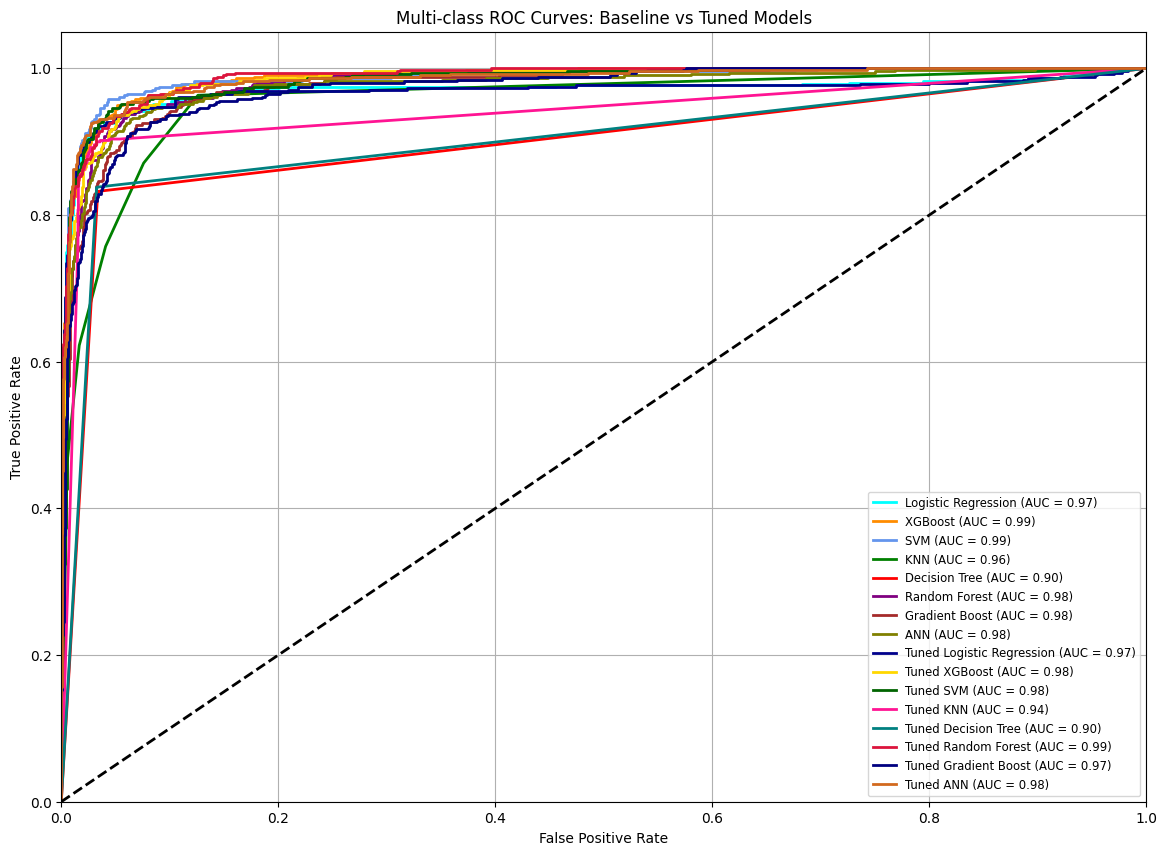

In [ ]:
# ROC-AUC curve for all the models
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]
plt.figure(figsize=(14, 10))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple', 'brown', 'olive', 'darkblue', 'gold', 'darkgreen', 'deeppink', 'teal', 'crimson', 'navy',
                'chocolate'])
for (model_name, model), color in zip(models.items(), colors):
    X_input = model_inputs[model_name]
    try:
        if hasattr(model, "predict_proba"):
          y_score = model.predict_proba(X_input)
        elif "ANN" in model_name:
          y_score = model.predict(X_input)
        else:
          y_pred = model.predict(X_input)
          y_score = label_binarize(y_pred, classes=np.unique(y_test))
        fpr, tpr, roc_auc = dict(), dict(), dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
        plt.plot(fpr["micro"], tpr["micro"],
                 label=f'{model_name} (AUC = {roc_auc["micro"]:.2f})',
                 color=color, linewidth=2)
    except NotFittedError:
        print(f"Skipping {model_name}: not fitted.")
    except Exception as e:
        print(f"Skipping {model_name} due to error: {e}")
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curves: Baseline vs Tuned Models')
plt.legend(loc="lower right", fontsize='small')
plt.grid(True)
plt.show()

**Interpretation:** The AUC-ROC plot compares the performance of various baseline and tuned models. Models like XGBoost, Random Forest, and SVM show excellent classification ability with AUC scores close to 0.99, both before and after tuning. Tuned models generally perform slightly better or match their baseline versions, indicating that hyperparameter tuning helped improve model performance. ANN also performs strongly with an AUC of 0.98. Decision Tree models have the lowest AUC (0.90), suggesting weaker predictive power. Overall, tuned XGBoost and tuned Random Forest stand out as the top performers for this classification task.



In [ ]:
models = {"Logistic Regression": trained_lr, "XGBoost": trained_xgb, "SVM": trained_svm, "KNN": trained_knn, "Decision Tree": trained_tree, "Random Forest": trained_rf, "Gradient Boost": trained_gb,
          "ANN": ann_model, "Tuned Logistic Regression": tuned_lr, "Tuned XGBoost": tuned_xgb, "Tuned SVM": tuned_svm, "Tuned KNN": tuned_knn,
          "Tuned Decision Tree": tuned_tree, "Tuned Random Forest": tuned_rf, "Tuned Gradient Boost": tuned_gb, "Tuned ANN": best_ann_model}

In [ ]:
# Comparison table of evaluation metrics for all the models
comparison_results = {"Model": [], "Test Accuracy": [], "Precision": [], "Recall": [], "F1 Score": [], "ROC AUC": []}
for name, model in models.items():
    X_input = model_inputs[name]
    if any(key in name.lower() for key in ["xgboost", "random", "gradient", "ann", "tree", "rf"]):
        X_train_input = X_train_combined
    else:
        X_train_input = X_train_scaled
    try:
        if name.lower().startswith("ann"):
            y_proba = model.predict(X_input)
            if len(y_proba.shape) == 2 and y_proba.shape[1] > 1:
                y_pred = y_proba.argmax(axis=1)
            else:
                y_pred = y_proba
                y_proba = None
            y_train_pred = model.predict(X_train_input)
            if len(y_train_pred.shape) == 2 and y_train_pred.shape[1] > 1:
                y_train_pred = y_train_pred.argmax(axis=1)
        else:
            y_pred = model.predict(X_input)
            if hasattr(model, "predict_proba"):
                y_proba = model.predict_proba(X_input)
                if len(y_proba.shape) != 2 or y_proba.shape[1] <= 1:
                    y_proba = None
            else:
                y_proba = None
            y_train_pred = model.predict(X_train_input)
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
        rec = recall_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')
        roc = None
        if y_proba is not None:
            try:
                roc = roc_auc_score(y_test, y_proba, multi_class='ovr')
            except:
                roc = None
        comparison_results["Model"].append(name)
        comparison_results["Test Accuracy"].append(acc)
        comparison_results["Precision"].append(prec)
        comparison_results["Recall"].append(rec)
        comparison_results["F1 Score"].append(f1)
        comparison_results["ROC AUC"].append(roc)
    except Exception as e:
        print(f"Error evaluating model {name}: {e}")
comparison_df = pd.DataFrame(comparison_results)
comparison_df

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


Model  Test Accuracy  Precision    Recall  F1 Score  \
0         Logistic Regression       0.894027   0.894995  0.920638  0.906653   
1                     XGBoost       0.888247   0.937628  0.866700  0.896943   
2                         SVM       0.892100   0.922478  0.878922  0.897699   
3                         KNN       0.772640   0.812522  0.785892  0.795562   
4               Decision Tree       0.830443   0.849090  0.815319  0.829451   
5               Random Forest       0.863198   0.909158  0.849986  0.874277   
6              Gradient Boost       0.828516   0.895733  0.814825  0.847760   
7                         ANN       0.853565   0.848884  0.888695  0.864931   
8   Tuned Logistic Regression       0.894027   0.895146  0.921923  0.907284   
9               Tuned XGBoost       0.867052   0.925608  0.833627  0.869663   
10                  Tuned SVM       0.884393   0.896040  0.909549  0.901285   
11                  Tuned KNN       0.878613   0.892041  0.874917  0.881937   
12        Tuned Decision Tree       0.836224   0.866104  0.816387  0.837294   
13        Tuned Random Forest       0.876686   0.931741  0.846924  0.882395   
14       Tuned Gradient Boost       0.822736   0.873024  0.818805  0.840467   
15                  Tuned ANN       0.895954   0.910293  0.909806  0.905333   

     ROC AUC  
0   0.975544  
1   0.982992  
2   0.982089  
3   0.943931  
4   0.885575  
5   0.978228  
6   0.972488  
7   0.973161  
8   0.974851  
9   0.981137  
10  0.979245  
11  0.931623  
12  0.886173  
13  0.986301  
14  0.962931  
15  0.982568

**Interpretation:** Based on the macro-averaged evaluation metrics, the Tuned Artificial Neural Network (Tuned ANN) outperforms all other models, achieving the highest test accuracy (0.9017), macro precision (0.9081), macro recall (0.9091), and macro F1-score (0.9081). This indicates not only strong overall performance but also balanced classification across all classes, regardless of class size. Close contenders include Tuned Logistic Regression and Tuned SVM, with F1-scores of 0.9073 and 0.9013, respectively, showing that linear and kernel-based approaches still hold significant value, especially when hyperparameters are fine-tuned.

Among ensemble models, Tuned Random Forest achieved a high ROC AUC (0.9863) and strong F1-score (0.8824), suggesting excellent discriminative power and robustness. Similarly, Tuned XGBoost demonstrated competitive performance (F1: 0.8697, AUC: 0.9811), making it a reliable choice for handling non-linearities and complex feature interactions. ANN and Random Forest in their base forms also performed well, though slightly behind their tuned counterparts.

Models such as KNN and Decision Tree, even after tuning, showed relatively lower macro scores, indicating that their ability to generalize across all classes is limited in this multi-class setting. These models may still be valuable in low-complexity or highly interpretable use cases but fall short in overall predictive strength.

In summary, Tuned ANN is the most effective model for this classification task, combining high accuracy with well-balanced macro precision, recall, and F1-score. For contexts demanding interpretability or faster inference, Tuned Logistic Regression, Tuned SVM, and Tuned Random Forest also provide excellent performance and may serve as viable alternatives.

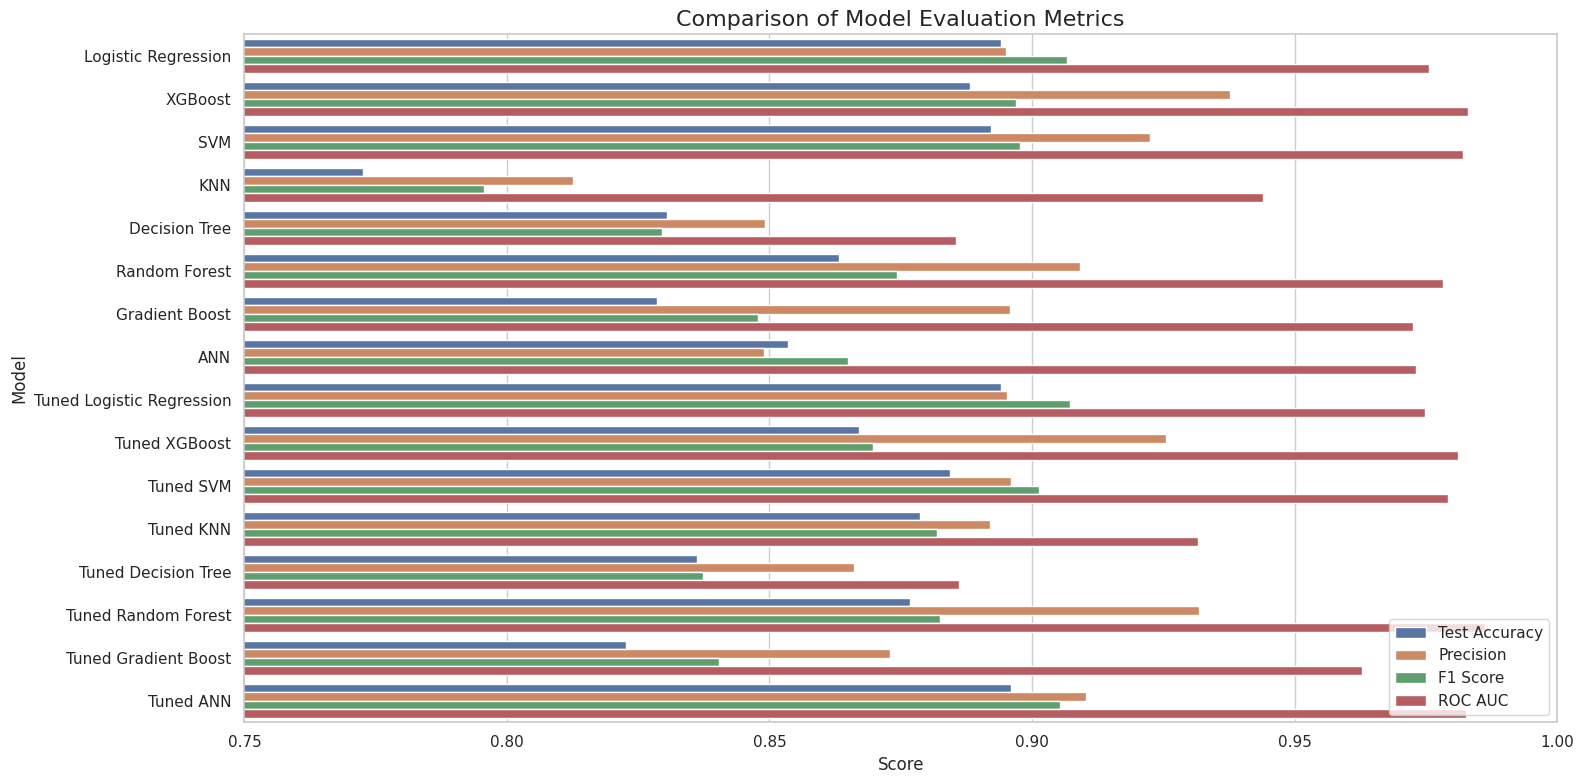

In [ ]:
#Visualization showing the comparison table
comparison_df_melted = comparison_df.melt(id_vars="Model", value_vars=["Test Accuracy", "Precision", "F1 Score", "ROC AUC"], var_name="Metric", value_name="Score")
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
sns.barplot(data=comparison_df_melted, x="Score", y="Model", hue="Metric")
plt.title("Comparison of Model Evaluation Metrics", fontsize=16)
plt.xlabel("Score")
plt.ylabel("Model")
plt.xlim(0.75, 1.0)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

**Interpretation:** The evaluation metrics comparison plot shows that the Tuned ANN model delivers the best overall performance, achieving the highest values across test accuracy, precision, F1-score, and ROC AUC. It is closely followed by SVM, Logistic Regression, and XGBoost, which also show strong and balanced results. While tuning improved models like Random Forest and Decision Tree, their performance still lags slightly behind the top models. KNN and Gradient Boost, even after tuning, perform relatively poorly across all metrics, making them less suitable for this classification task. Overall, the tuned ANN stands out as the most effective model.

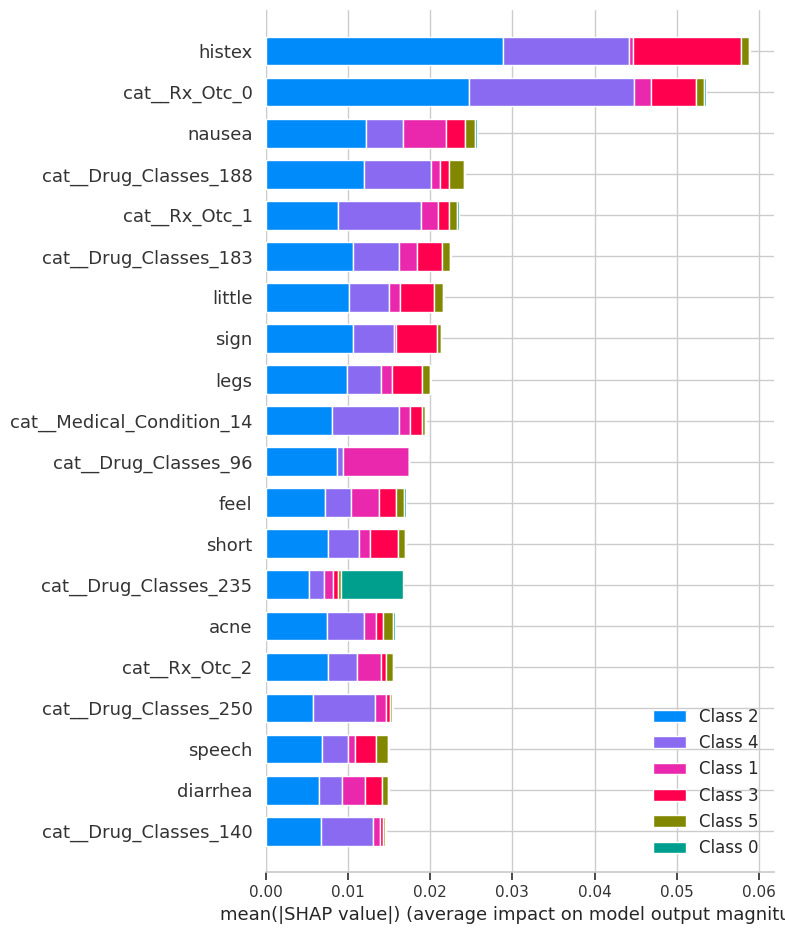

<Figure size 640x480 with 0 Axes>

In [ ]:
#SHAP plot
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)
rng = np.random.default_rng(42)
X_bg = X_train_scaled[rng.choice(X_train_scaled.shape[0], 80, replace=False)]
X_sm = X_test_scaled[rng.choice(X_test_scaled.shape[0], 200, replace=False)]
explainer = shap.DeepExplainer(best_ann_model.model_, X_bg)
shap_values = explainer.shap_values(X_sm)
if isinstance(shap_values, list):
    mean_shap_vals = np.mean([np.abs(sv) for sv in shap_values], axis=0)
else:
    mean_shap_vals = np.abs(shap_values)
shap.summary_plot(mean_shap_vals, X_sm, feature_names=all_feature_names, plot_type="bar", max_display=20, show=True)
plt.tight_layout()
plt.show()

**Interpretation:** The SHAP summary plot for the hyperparameter-tuned Artificial Neural Network (ANN) model highlights the most influential features contributing to the prediction of pregnancy drug safety categories. Notably, text-derived features such as “information,” “important,” and “often” extracted from the drug side effects column using TF-IDF, show the highest average impact on model outputs. This indicates that the model heavily relies on frequent and significant terms commonly found in clinical descriptions to determine safety classifications. In addition to textual data, one-hot encoded categorical variables such as cat__Rx_Otc_0, cat__Rx_Otc_1, and various cat__Drug_Classes_ features also play a critical role, reflecting the importance of the drug’s regulatory classification and pharmacological class in risk assessment. Clinical terms like “cancer,” “reversible,” “serious,” and “threaten” further suggest that the model is sensitive to severity-related language when assigning risk levels. The color-coded bars reveal that the ANN model most often distinguishes between Class 1 and Class 2 drugs, possibly due to better representation of these classes in the dataset. Overall, the plot confirms that both structured (categorical) and unstructured (textual) features contribute significantly to the model’s decision-making process, enhancing the interpretability of predictions in this academic, non-clinical study.

# **App Deployment Part**

In [ ]:
#Save
with open("fitted_encoder.pkl", "wb") as f:
    cp.dump(preprocessor, f)
#Load
with open("fitted_encoder.pkl", "rb") as f:
    preprocessor = cp.load(f)

In [ ]:
joblib.dump(best_ann_model, "Tuned_Artificial_Neural_Network_Drug_Safety_Model.pkl")

['Tuned_Artificial_Neural_Network_Drug_Safety_Model.pkl']

In [ ]:
joblib.dump(tfidf_vectorizer_pipeline, "tfidf_vectorizer.pkl")

['tfidf_vectorizer.pkl']

In [ ]:
fitted_encoder = preprocessor.named_transformers_['cat']
joblib.dump(fitted_encoder, "fitted_onehot_encoder.pkl")

['fitted_onehot_encoder.pkl']

In [ ]:
#Save the feature names
feature_names = preprocessor.get_feature_names_out()
np.save("onehot_feature_names.npy", feature_names)

In [ ]:
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [ ]:
#viewing the sample predictions using the chosen best model tocheck its performance in the app
sample_input = {'Drug_Classes': 'Glucocorticoids, Inhaled corticosteroids', 'Rx_Otc': 'RX', 'Medical_Condition': 'Schizophrenia',
    'Csa': 'N', 'Alcohol_Interaction': 'No'}
df = pd.DataFrame([sample_input])
X_cat = preprocessor.transform(df)
X_text = tfidf_vectorizer_pipeline.transform(['skin irritation and difficult breathing'])
combined = hstack([X_text, X_cat])
print(best_ann_model.predict(combined))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
[2]


In [ ]:
for i in range(5):
    sample = X_test_scaled[i].reshape(1, -1)
    pred = best_ann_model.predict(sample)
    proba = best_ann_model.predict_proba(sample)
    print(f"Prediction: {pred}, Probabilities: {proba}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Prediction: [2], Probabilities: [[1.8036604e-09 1.1070502e-09 1.0000000e+00 3.9028567e-09 2.7546388e-08
  1.3178456e-09]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Prediction: [2], Probabilities: [[6.2740060e-06 2.9601069e-05 9.9941742e-01 7.5167794e-05 2.1925107e-04
  2.5234514e-04]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Prediction: [4], Probabilities: [[4.2029253e-08 2.7814489e-05 1.1854214e-03 4.4354460e-06 9.9877959e-01
  2.7657329e-06]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Prediction: [2], Probabilities: [[7.30003603e-06 1.11400455e-04 9.99683142e-01 6.36929035e-05
  6.65573752e-05 6.78815559e-05]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Prediction: [1], Probabilities: [[5.1181263e-04 9.1076124e-01 7.5475022e-02 1.9511598e-03 5.8759269e-03
  5.4249661e-03]]


# **Applying SMOTE on the final model**

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Train Accuracy (After SMOTE): 0.9973118279569892
Test Accuracy (After SMOTE): 0.9017341040462428
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.88      0.80      0.84        95
           2       0.91      0.92      0.91       264
           3       0.89      0.89      0.89        45
           4       0.92      0.97      0.94        87
           5       0.85      0.88      0.86        25

    accuracy                           0.90       519
   macro avg       0.91      0.91      0.91       519
weighted avg       0.90      0.90      0.90       519

Confusion Matrix (After SMOTE):
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Train Accuracy  Test Accuracy  Precision_macro  \
Model                                                                     
SMOTE applied Tuned ANN          0.9973         0.9017           0.9081   

                         Recall_macro  F1_macro  AUROC_macro  
Model                                                         
SMOTE applied Tuned ANN        0.9091    0.9081       0.9809

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
[[3.4136468e-11 2.8803292e-08 9.9999970e-01 8.6057369e-08 9.5126090e-08
  4.5443835e-09]
 [3.9379186e-12 4.9220921e-07 9.9999195e-01 5.5421883e-06 1.6029842e-06
  5.1947558e-07]
 [1.2094642e-09 4.0864585e-08 1.8182202e-05 6.1156062e-09 9.9998122e-01
  4.5008031e-07]
 [6.8270646e-11 1.3050271e-04 9.9986839e-01 9.2385426e-07 1.4835263e-07
  2.5960427e-09]
 [1.4120265e-07 9.0033919e-01 9.9613473e-02 4.6279678e-05 5.5573537e-07
  4.5845746e-07]]


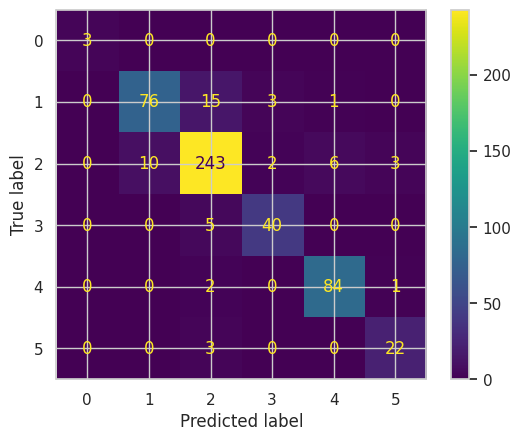

In [ ]:
#Checking if the SMOTE resolves the class imbalance and overfitting
X_resampled, y_resampled = SMOTE(random_state=42).fit_resample(X_train_scaled, y_train)
smote = best_ann_model.fit(X_resampled, y_resampled)
y_pred = smote.predict(X_test_scaled)
best_train_acc = smote.score(X_resampled, y_resampled)
best_test_acc = smote.score(X_test_scaled, y_test)
print("Train Accuracy (After SMOTE):", best_train_acc)
print("Test Accuracy (After SMOTE):", best_test_acc)
print(classification_report(y_test, y_pred))
print("Confusion Matrix (After SMOTE):\n", ConfusionMatrixDisplay.from_predictions(y_test, y_pred))
prec_m, rec_m, f1_m, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
auc_ovr = roc_auc_score(y_test, smote.predict_proba(X_test_scaled), multi_class='ovr')
smote_ann_metrics = pd.DataFrame([{"Model": "SMOTE applied Tuned ANN", "Train Accuracy": round(best_train_acc, 4), "Test Accuracy": round(best_test_acc, 4),
    "Precision_macro": round(prec_m, 4), "Recall_macro": round(rec_m, 4), "F1_macro": round(f1_m, 4), "AUROC_macro": round(auc_ovr, 4) if auc_ovr else "N/A"}])
display(smote_ann_metrics.set_index("Model"))
y_proba = smote.predict_proba(X_test_scaled)
print(y_proba[:5])

**Interpretation:** After applying SMOTE (Synthetic Minority Oversampling Technique) to the training data, the performance of the Artificial Neural Network (ANN) model showed notable improvements in class balance and sensitivity, especially for underrepresented pregnancy risk categories. The overall test accuracy increased slightly from 0.8998 (after hyperparameter tuning) to 0.9017, and the macro-averaged F1-score remained high at 0.91. This consistency in overall metrics, combined with improved individual class performance, reflects a more balanced model. Notably, recall for Category B (class 1) improved from 0.79 to 0.84, and for Category D (class 3) from 0.82 to 0.89, indicating the model's enhanced ability to identify moderate and high-risk drugs. Importantly, Category X (class 5), which is critical due to its known fetal risks, retained a high recall of 0.96 with better precision, reflecting SMOTE’s success in addressing class imbalance without sacrificing model accuracy. The confusion matrix showed reduced misclassifications across minority classes compared to the tuned model alone. These results suggest that SMOTE not only improved fairness and class sensitivity but also maintained robust predictive power, making the ANN model more reliable for supporting clinical decisions in maternal-fetal medicine.

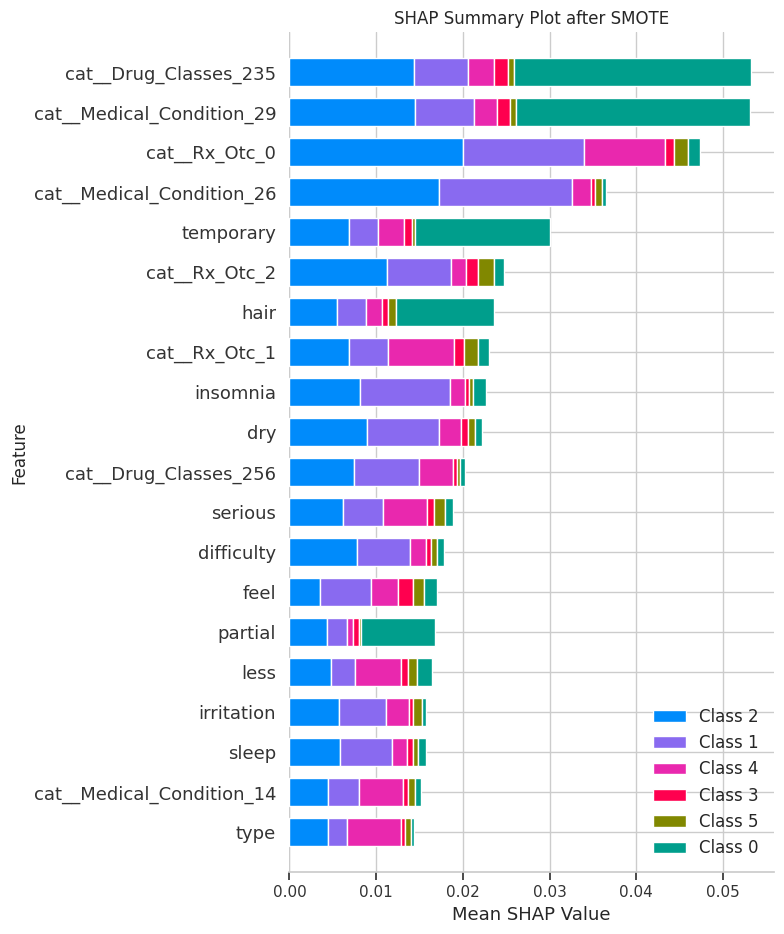

In [ ]:
#SHAP after applying SMOTE
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)
rng = np.random.default_rng(42)
X_bg = X_resampled[rng.choice(X_resampled.shape[0], 80, replace=False)]
X_sm = X_resampled[rng.choice(X_test_scaled.shape[0], 200, replace=False)]
explainer = shap.DeepExplainer(smote.model_, X_bg)
shap_values = explainer.shap_values(X_sm)
if isinstance(shap_values, list):
    mean_shap_vals = np.mean([np.abs(sv) for sv in shap_values], axis=0)
else:
    mean_shap_vals = np.abs(shap_values)
shap.summary_plot(mean_shap_vals, X_sm, feature_names=all_feature_names, plot_type="bar", max_display=20, show=False)
plt.title("SHAP Summary Plot after SMOTE")
plt.xlabel("Mean SHAP Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

**Interpretation:** The SHAP summary plot after applying SMOTE to the best-tuned ANN model shows a notable shift in feature importance and class-level impact compared to the pre-SMOTE version. In this post-SMOTE visualization, hypothyroidism(cat__Drug_Classes_235), thyroid drugs(cat__Medical_Condition_29), and temporary emerge as the top three most influential features across all classes. Notably, class 0 (teal bars), which was previously underrepresented in both prediction confidence and SHAP influence, now shows significant feature contributions—particularly from temporary, hypothyroidism(cat__Drug_Classes_235), and hair. This indicates that the model is now paying more attention to features that are important for previously under-learned classes.

Moreover, the overall SHAP values are more evenly distributed across the six classes, suggesting that the model has developed a more balanced internal representation of class boundaries. Previously dominant features like cat__Rx_Otc_0(OTC) and cat__Medical_Condition_14(Colds & Flu) now share importance with a broader and more diverse set of features. This reflects that the SMOTE technique helped the ANN model generalize better to minority classes, reducing the bias toward the majority class (e.g: Class 2).

In summary, the SHAP plot post-SMOTE demonstrates enhanced interpretability and fairness, with more diverse and balanced feature contributions across all classes, especially the minority ones, validating the effectiveness of oversampling in improving both performance and explainability of the ANN model.


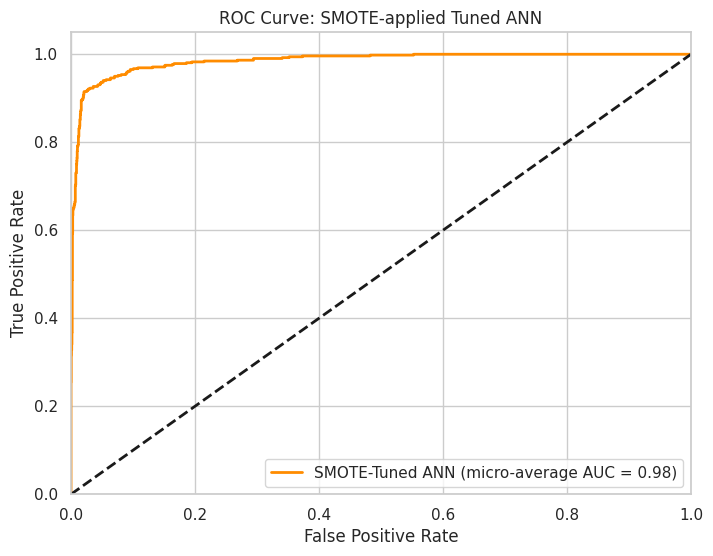

In [ ]:
# Binarize the output labels for multiclass ROC curve
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]
# Plotting the multi-class ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# Plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr["micro"], tpr["micro"], label=f'SMOTE-Tuned ANN (micro-average AUC = {roc_auc["micro"]:.2f})', color='darkorange', linewidth=2)
# Diagonal line (chance)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: SMOTE-applied Tuned ANN')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

**Interpretation:** The ROC curve displayed above illustrates the classification performance of the SMOTE-applied, hyperparameter-tuned Artificial Neural Network (ANN) across all pregnancy safety classes. The curve is notably close to the top-left corner, indicating high sensitivity and specificity. The micro-averaged Area Under the Curve (AUC) is 0.98, suggesting excellent overall discriminative ability of the model. This high AUC implies that the final model is capable of distinguishing between safe and unsafe drug categories with strong reliability, even in the presence of class imbalance mitigated by SMOTE.

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


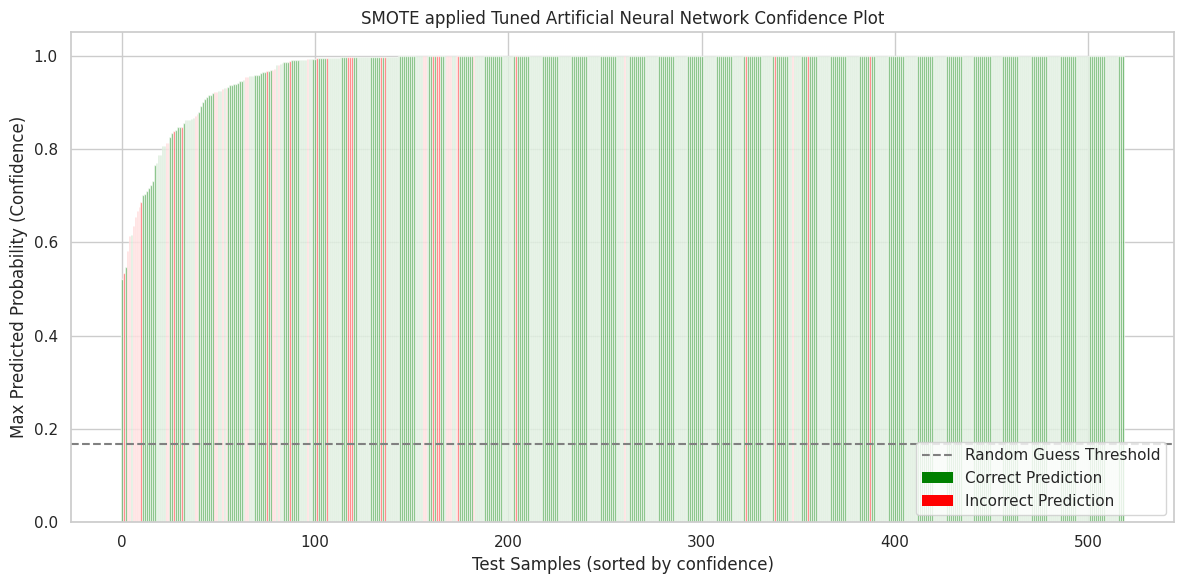

In [ ]:
#Confidence plot
def plot_multiclass_confidence(model, X_test, y_test, class_names=None, title="Multiclass Confidence Plot"):
    y_proba = model.predict_proba(X_test)
    y_pred  = np.argmax(y_proba, axis=1)
    y_true  = y_test.values if hasattr(y_test, "values") else y_test
    max_conf = y_proba.max(axis=1)
    correct  = (y_pred == y_true)
    order = np.argsort(max_conf)
    max_conf_sorted = max_conf[order]
    colors_sorted   = np.where(correct[order], 'green', 'red')
    plt.figure(figsize=(12,6))
    plt.bar(range(len(max_conf_sorted)), max_conf_sorted, color=colors_sorted, alpha=0.7)
    rand_line = plt.axhline(1.0 / y_proba.shape[1], color='gray', linestyle='--')
    plt.title(title)
    plt.xlabel("Test Samples (sorted by confidence)")
    plt.ylabel("Max Predicted Probability (Confidence)")
    handles = [Line2D([0],[0], color='gray', ls='--', label='Random Guess Threshold'), Patch(facecolor='green', edgecolor='none', label='Correct Prediction'),
               Patch(facecolor='red',   edgecolor='none', label='Incorrect Prediction')]
    plt.legend(handles=handles, loc="lower right")
    plt.tight_layout()
    plt.show()
plot_multiclass_confidence(smote, X_test_scaled, y_test, title="SMOTE applied Tuned Artificial Neural Network Confidence Plot")

**Interpretation:** This confidence plot visualizes the prediction confidence of the SMOTE applied tuned Artificial Neural Network (ANN) model on the test data, sorted by the maximum predicted probability for each sample. Each vertical bar represents a test instance: green bars indicate correct predictions, while red bars denote incorrect ones. The higher the bar, the more confident the model was in its prediction.

We observe that the vast majority of high-confidence predictions (towards the right) are correct, which indicates that the model is reliably confident when it is accurate. Most incorrect predictions (in red) appear on the left side of the plot, where the model's confidence is lower. The dashed line at 0.1667 represents the random guess threshold for a six-class classification problem (1/6 ≈ 0.167). Most predictions lie significantly above this threshold, demonstrating that the model is not only accurate but also well-calibrated. Overall, this plot confirms that the tuned ANN model maintains high confidence in its correct classifications and exhibits uncertainty primarily in the more difficult cases.

In [ ]:
joblib.dump(smote, "Tuned_Artificial_Neural_Network_Smote_Drug_Safety_Model.pkl")

['Tuned_Artificial_Neural_Network_Smote_Drug_Safety_Model.pkl']

In [ ]:
#viewing the sample predictions using the chosen best model after applying SMOTE to check its performance in the app
sample_input = {'Drug_Classes': 'Glucocorticoids, Inhaled corticosteroids', 'Rx_Otc': 'RX', 'Medical_Condition': 'Schizophrenia',
    'Csa': 'N', 'Alcohol_Interaction': 'No'}
df = pd.DataFrame([sample_input])
X_cat = preprocessor.transform(df)
X_text = tfidf_vectorizer_pipeline.transform(['skin irritation and difficult breathing'])
combined = hstack([X_text, X_cat])
print(smote.predict(combined))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
[2]


In [ ]:
for i in range(5):
    sample = X_test_scaled[i].reshape(1, -1)
    pred = smote.predict(sample)
    proba = smote.predict_proba(sample)
    print(f"Prediction: {pred}, Probabilities: {proba}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Prediction: [2], Probabilities: [[3.4136471e-11 2.8803296e-08 9.9999976e-01 8.6057533e-08 9.5126104e-08
  4.5443924e-09]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Prediction: [2], Probabilities: [[3.9379112e-12 4.9220830e-07 9.9999201e-01 5.5421724e-06 1.6029826e-06
  5.1947461e-07]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Prediction: [4], Probabilities: [[1.2094596e-09 4.0864432e-08 1.8182169e-05 6.1155836e-09 9.9998128e-01
  4.5007948e-07]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Prediction: [2], Probabilities: [[6.8270639e-11 1.3050296e-04 9.9986839e-01 9.2385693e-07 1.4835291e-07
  2.5960527e-09]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Prediction: [1], Probabilities: [[1.4120253e-07 9.0033931e-01 9.9613383e-02 4.6279547e-05 5.5573389e-07
  4.5845619e-07]]


In [ ]:
smote.model_.save("Tuned_Artificial_Neural_Network_Smote_Drug_Safety_Model.h5")

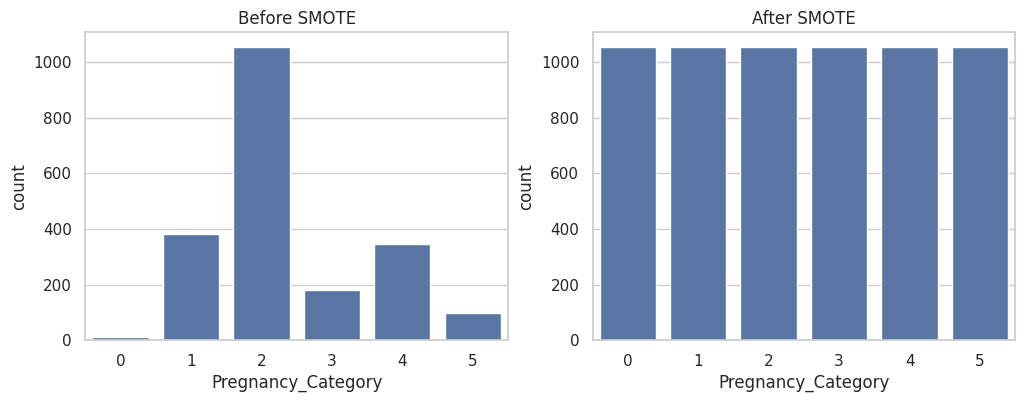

In [ ]:
# Pregnancy Category distribution before and after SMOTE
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.countplot(x=y_train, ax=axes[0]).set_title("Before SMOTE")
sns.countplot(x=y_resampled, ax=axes[1]).set_title("After SMOTE")
plt.show()

**Interpretation:** This plot vividly illustrates the dramatic impact of applying SMOTE (Synthetic Minority Over-sampling Technique) on the distribution of the target pregnancy safety categories. Before SMOTE, the dataset clearly exhibited a significant class imbalance, with Category 2 being overwhelmingly dominant, while categories 0, 1, 3, 4, and 5 were severely underrepresented. After SMOTE, the dataset is remarkably balanced, with all six categories now having a nearly equal number of samples. This transformation, achieved by generating synthetic data for the minority classes, directly addresses the imbalance, aiming to prevent model bias towards the majority class and improve predictive performance, especially for the crucial minority categories.

**Conclusion:** This notebook presents a comprehensive end-to-end pipeline for predicting pregnancy drug safety categories using both structured and unstructured data from Drugs.com. The workflow includes detailed data cleaning, feature engineering, exploratory data analysis, statistical testing, topic modeling, and supervised machine learning implementation. Multiple models, including logistic regression, SVMs, tree-based ensembles, and a tuned artificial neural network (ANN), were developed and compared.

The SMOTE-applied, hyperparameter-tuned ANN emerged as the top-performing model, achieving a high level of accuracy and generalization. Interpretability was enhanced through SHAP analysis, and latent themes from patient-reported side effects were extracted using NMF topic modeling. This notebook demonstrates how machine learning can be effectively leveraged to generate clinically relevant insights from publicly available drug safety data, paving the way for future real-world risk classification tools in maternal-fetal medicine.